In [ ]:
FILTERS="-uniqueOnly 1 -remove_bads 1 -minMapQ 20 -minQ 25 \
-sb_pval 1e-5 -skipTriallelic 1 -minInd 80 -minIndDepth 3 -snp_pval 1e-3 -minMaf 0.01"
# output commands for most outputs
TODOvcf="-doMajorMinor 1 -doMaf 1 -doCounts 1 -doIBS 1 -doCov 1 -makeMatrix 1 -doGeno 9 \
-doPost 1 -doGlf 2 -dosnpstat 1"
# output commands for PCA friendly output
TODOpca="-doMajorMinor 1 -doMaf 1 -doCounts 1 -doGeno 32 -doPost 1 -dosnpstat 1"

TODOrelate="-doMajorMinor 1 -doMaf 1 -doCounts 1 -doPost 1 -doGlf 3 -dosnpstat 1"

angsd -b SSHCbams_filt_nreps -GL 1 $FILTERS $TODOvcf -P 1 -out ../ANGSD_run/HCSS_Afilt32m70_01

angsd -b SSHCbams_filt_nreps -GL 1 $FILTERS $TODOpca -P 1 -out ../ANGSD_run/HCSS_Afilt32m70_01pca 

angsd -b SSHCbams_filt_nreps -GL 1 $FILTERS $TODOrelate -P 1 -out ../ANGSD_run/HCSS_Afilt32m70_01relate


In [3]:
SUFFIX = 'HCSS_Afilt32m70_01'

In [18]:
pwd

/scratch/t.cri.ksilliman/CommonG/2019_Mapping/ANGSD_run/HCSS


## Make population file

In [21]:
# make ind2pop file
infile = "SSHCbams_filt_nreps"
outfile = "SSHCfiltNreps.ind2pop"
IN= open(infile,"r")
OUT = open(outfile,"w")

for line in IN:
    stuff = line.split(".")
    name = stuff[0]
    pop = name[0:2]
    OUT.write(name+"\t"+pop+"\n")
IN.close()
OUT.close()

## Make VCF file

In [1]:
# make ind2pop file
infile = "SSHCbams_filt_nreps"
outfile = "SSHCfiltNreps.ind"
IN= open(infile,"r")
OUT = open(outfile,"w")

OUT.write("ID\n0\n")
for line in IN:
    stuff = line.split(".")
    name = stuff[0]
    OUT.write(name+"\n")
IN.close()
OUT.close()

In [4]:
%expand
module load gcc/6.2.0
module load qctool/2.0

cp {SUFFIX}.geno.gz {SUFFIX}cp.geno.gz
gunzip {SUFFIX}cp.geno.gz
sed -i 's/\t/ /g' {SUFFIX}cp.geno
sed -i 's/.$//' {SUFFIX}cp.geno
sed -i 's/^/--- /' {SUFFIX}cp.geno
mv {SUFFIX}cp.geno {SUFFIX}.gen
qctool_v2.0-rc5 -g {SUFFIX}.gen -threshhold 0.501 -og {SUFFIX}_pp5.vcf -s SSHCfiltNreps.ind
qctool_v2.0-rc5 -g {SUFFIX}.gen -threshhold 0.75 -og {SUFFIX}_pp75.vcf -s SSHCfiltNreps.ind
qctool_v2.0-rc5 -g {SUFFIX}.gen -threshhold 0.9 -og {SUFFIX}_pp90.vcf -s SSHCfiltNreps.ind


Welcome to qctool
(version: 2.0-rc5, revision )

(C) 2009-2017 University of Oxford

Opening genotype files                                      : [******************************] (1/1,0.0s,99.7/s))

Input SAMPLE file(s):           "SSHCfiltNreps.ind"
Output SAMPLE file:             "(n/a)".
Sample exclusion output file:   "(n/a)".

Input GEN file(s):
           ThreshholdingSNPDataSource(chain:HCSS_Afilt32m70_01.gen)Output GEN file(s):             "HCSS_Afilt32m70_01_pp5.vcf"
Output SNP position file(s):    (n/a)
Sample filter:                  .
# of samples in input files:    114.
# of samples after filtering:   114 (0 filtered out).


VCFFormatSNPDataSink::write_header(): FORMAT entries are:
##FORMAT=<ID=GP,Type=Float,Number=G,Description="Genotype call probabilities">
##FORMAT=<ID=GT,Type=String,Number=1,Description="Genotype call probabilities, threshholded at 0.50">

Processing SNPs                                             :  (5269/?,1.5s,3611.4/s)
Total: 5269SNPs.

Number o

In [5]:
%expand
# fix contig naming in vcf
IN = open("{SUFFIX}_pp5.vcf","r")
OUT = open("{SUFFIX}_pp5_con.vcf","w")

for line in IN:
    if "#" not in line:
        stuff = line.split()
        contig = stuff[2].split(",")[0]
        ID = contig+":"+stuff[1]
        stuff[0] = contig
        stuff[2] = ID
        OUT.write('\t'.join(stuff)+"\n")
    else:
        OUT.write(line)

IN.close()
OUT.close()

# fix contig naming in vcf
IN = open("{SUFFIX}_pp75.vcf","r")
OUT = open("{SUFFIX}_pp75_con.vcf","w")

for line in IN:
    if "#" not in line:
        stuff = line.split()
        contig = stuff[2].split(",")[0]
        ID = contig+":"+stuff[1]
        stuff[0] = contig
        stuff[2] = ID
        OUT.write('\t'.join(stuff)+"\n")
    else:
        OUT.write(line)

IN.close()
OUT.close()

# fix contig naming in vcf
IN = open("{SUFFIX}_pp90.vcf","r")
OUT = open("{SUFFIX}_pp90_con.vcf","w")

for line in IN:
    if "#" not in line:
        stuff = line.split()
        contig = stuff[2].split(",")[0]
        ID = contig+":"+stuff[1]
        stuff[0] = contig
        stuff[2] = ID
        OUT.write('\t'.join(stuff)+"\n")
    else:
        OUT.write(line)

IN.close()
OUT.close()

In [6]:
%expand
rm {SUFFIX}_pp5.vcf
mv {SUFFIX}_pp5_con.vcf {SUFFIX}_pp5.vcf
rm {SUFFIX}_pp75.vcf
mv {SUFFIX}_pp75_con.vcf {SUFFIX}_pp75.vcf
rm {SUFFIX}_pp90.vcf
mv {SUFFIX}_pp90_con.vcf {SUFFIX}_pp90.vcf

In [7]:
%expand
module load gcc/6.2.0
module load vcftools/0.1.15

vcftools --vcf {SUFFIX}_pp5.vcf --recode --recode-INFO-all \
--min-alleles 2 --max-alleles 2 \
--max-missing 0.75 \
--out {SUFFIX}_pp5_m75

vcftools --vcf {SUFFIX}_pp75.vcf --recode --recode-INFO-all \
--min-alleles 2 --max-alleles 2 \
--max-missing 0.75 \
--out {SUFFIX}_pp75_m75

vcftools --vcf {SUFFIX}_pp90.vcf --recode --recode-INFO-all \
--min-alleles 2 --max-alleles 2 \
--max-missing 0.75 \
--out {SUFFIX}_pp90_m75


VCFtools - 0.1.15
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf HCSS_Afilt32m70_01_pp5.vcf
	--recode-INFO-all
	--max-alleles 2
	--min-alleles 2
	--max-missing 0.75
	--out HCSS_Afilt32m70_01_pp5_m75
	--recode

After filtering, kept 114 out of 114 Individuals
Outputting VCF file...
After filtering, kept 5264 out of a possible 5269 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.15
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf HCSS_Afilt32m70_01_pp75.vcf
	--recode-INFO-all
	--max-alleles 2
	--min-alleles 2
	--max-missing 0.75
	--out HCSS_Afilt32m70_01_pp75_m75
	--recode

After filtering, kept 114 out of 114 Individuals
Outputting VCF file...
After filtering, kept 5186 out of a possible 5269 Sites
Run Time = 0.00 seconds

VCFtools - 0.1.15
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf HCSS_Afilt32m70_01_pp90.vcf
	--recode-INFO-all
	--max-alleles 2
	--min-alleles 2
	--max-missing 0.75
	--out HCSS_Afi

## Relatedness

In [30]:
%expand
module load gcc/6.2.0
module load htslib/1.7.36

# relatedness (must run ANGSD with option '-doGlf 3' to make this work)
# (column "rab" in the result is relatedness coefficient, Fa and Fb are individual inbreeding coefficients):
zcat {SUFFIX}relate.mafs.gz | cut -f5 |sed 1d >freq
NIND=`cat SSHCbams_filt_nreps | wc -l`
ngsRelate -f freq -g {SUFFIX}relate.glf.gz -n $NIND -z SSHCbams_filt_nreps -O {SUFFIX}.relatedness


	-> Number of file names read:114
	-> Seed is: 1220579229
	-> Frequency file: 'freq' contain 5269 number of sites
	-> nind:114 overall_number_of_sites:5269
	-> Done reading data from file: 0.12 0.00
	-> Starting analysis now
	-> length of joblist:6441
	[ALL done] cpu-time used =  156.24 sec (filereading took: 0.12 sec)
	[ALL done] walltime used =  39.00 sec (filereading took: 0.00 sec)


### Relatedness for MACAU

In [31]:
%expand
mbd = ["HC1-2B-L5","HC1-4","HC2-15A-L5","HC2-17B","HC3-1","HC3-5-L5B","HC3-7","HC3-10","HC3-11",
        "SS2-9-L5","SS2-14-L5","SS2-18-L5","SS3-3","SS3-14","SS3-15","SS3-16","SS3-20","SS5-18"]

IN = open("{SUFFIX}.relatedness","r")
OUT = open("{SUFFIX}_mbd.relatedness","w")

OUT.write(next(IN))
for line in IN:
    stuff = line.split()
    id1 = stuff[2].split(".")[0]
    id2 = stuff[3].split(".")[0]
    if id1 in mbd and id2 in mbd:
        OUT.write(line)

IN.close()
OUT.close()

In [17]:
%expand
grep "HC3-10" {SUFFIX}_mbd.relatedness | cut -f 3,4,5,15,16,17
wc -l {SUFFIX}_mbd.relatedness

HC1-2B-L5.trim.bt2.bam	HC3-10.trim.bt2.bam	3563	0.096852	0.117574	0.000000
HC1-4.trim.bt2.bam	HC3-10.trim.bt2.bam	3554	0.000051	0.026465	0.000000
HC2-15A-L5.trim.bt2.bam	HC3-10.trim.bt2.bam	3694	0.215806	0.000000	0.000000
HC2-17B.trim.bt2.bam	HC3-10.trim.bt2.bam	3565	0.003049	0.139688	0.000000
HC3-1.trim.bt2.bam	HC3-10.trim.bt2.bam	3553	0.000008	0.077142	0.000000
HC3-10.trim.bt2.bam	HC3-11.trim.bt2.bam	3523	0.000844	0.000003	0.171704
HC3-10.trim.bt2.bam	HC3-5-L5B.trim.bt2.bam	3505	0.098489	0.000000	0.094646
HC3-10.trim.bt2.bam	HC3-7.trim.bt2.bam	3534	0.000041	0.000000	0.103892
HC3-10.trim.bt2.bam	SS2-14-L5.trim.bt2.bam	3519	0.000003	0.000000	0.104593
HC3-10.trim.bt2.bam	SS2-18-L5.trim.bt2.bam	3678	0.000015	0.000000	0.000000
HC3-10.trim.bt2.bam	SS2-9-L5.trim.bt2.bam	3560	0.000003	0.000000	0.095320
HC3-10.trim.bt2.bam	SS3-14.trim.bt2.bam	3568	0.000000	0.000000	0.028190
HC3-10.trim.bt2.bam	SS3-15.trim.bt2.bam	3596	0.059391	0.000000	0.076993
HC3-10.trim.bt2.bam	SS3-16.trim.bt2.bam	3527	0.0

In [32]:
%expand
library(spaa)
df = read.table("{SUFFIX}_mbd.relatedness",header = T)
dfrab <- df[,c("ida","idb","rab")]
distrab <- as.matrix(list2dist(dfrab))

mbdnames = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_10","hc3_11","hc3_5","hc3_7",
        "ss2_14","ss2_18","ss2_9","ss3_14","ss3_15","ss3_16","ss3_20","ss3_3","ss5_18")

mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")

colnames(distrab) <- mbdnames
rownames(distrab) <- mbdnames
distrab <- distrab[mbdorder,mbdorder]
distrab
write.table(distrab,file="HCSSmbdsamples_rab.txt", col.names = F, row.names = F, sep = "\t")

hc1_2    hc1_4    hc2_15   hc2_17   hc3_1    hc3_5    hc3_7    hc3_10  
hc1_2  0.000000 0.001012 0.024934 0.010583 0.005485 0.469927 0.000008 0.096849
hc1_4  0.001012 0.000000 0.132775 0.281727 0.178630 0.023207 0.303820 0.000022
hc2_15 0.024934 0.132775 0.000000 0.091522 0.105287 0.010846 0.202777 0.215808
hc2_17 0.010583 0.281727 0.091522 0.000000 0.178815 0.028365 0.269209 0.002958
hc3_1  0.005485 0.178630 0.105287 0.178815 0.000000 0.000013 0.505421 0.000000
hc3_5  0.469927 0.023207 0.010846 0.028365 0.000013 0.000000 0.000008 0.098506
hc3_7  0.000008 0.303820 0.202777 0.269209 0.505421 0.000008 0.000000 0.000003
hc3_10 0.096849 0.000022 0.215808 0.002958 0.000000 0.098506 0.000003 0.000000
hc3_11 0.018067 0.045449 0.000063 0.014182 0.052670 0.017887 0.019617 0.001493
ss2_9  0.000000 0.000005 0.000043 0.000000 0.000008 0.000000 0.000004 0.000000
ss2_14 0.000000 0.000001 0.000001 0.000001 0.000000 0.000000 0.000000 0.000001
ss2_18 0.000004 0.000003 0.019309 0.000007 0.000002 0.000001 0.000001 0.000017
ss3_3  0.000000 0.000001 0.000019 0.000000 0.000000 0.000000 0.000001 0.001741
ss3_14 0.000000 0.000000 0.000011 0.000002 0.000001 0.000001 0.000002 0.000000
ss3_15 0.000000 0.000000 0.000001 0.000000 0.000000 0.000001 0.000000 0.059200
ss3_16 0.000000 0.000000 0.000050 0.000001 0.000001 0.000001 0.000000 0.000003
ss3_20 0.000001 0.004360 0.032588 0.000000 0.000001 0.000000 0.000000 0.000185
ss5_18 0.000000 0.000002 0.000001 0.000000 0.000000 0.000000 0.000000 0.000014
       hc3_11   ss2_9    ss2_14   ss2_18   ss3_3    ss3_14   ss3_15   ss3_16  
hc1_2  0.018067 0.000000 0.000000 0.000004 0.000000 0.000000 0.000000 0.000000
hc1_4  0.045449 0.000005 0.000001 0.000003 0.000001 0.000000 0.000000 0.000000
hc2_15 0.000063 0.000043 0.000001 0.019309 0.000019 0.000011 0.000001 0.000050
hc2_17 0.014182 0.000000 0.000001 0.000007 0.000000 0.000002 0.000000 0.000001
hc3_1  0.052670 0.000008 0.000000 0.000002 0.000000 0.000001 0.000000 0.000001
hc3_5  0.017887 0.000000 0.000000 0.000001 0.000000 0.000001 0.000001 0.000001
hc3_7  0.019617 0.000004 0.000000 0.000001 0.000001 0.000002 0.000000 0.000000
hc3_10 0.001493 0.000000 0.000001 0.000017 0.001741 0.000000 0.059200 0.000003
hc3_11 0.000000 0.000000 0.000000 0.000028 0.000001 0.000003 0.000000 0.000001
ss2_9  0.000000 0.000000 0.342654 0.251279 0.286739 0.231220 0.000001 0.235655
ss2_14 0.000000 0.342654 0.000000 0.172984 0.350698 0.188302 0.007347 0.279120
ss2_18 0.000028 0.251279 0.172984 0.000000 0.417414 0.257624 0.000003 0.101485
ss3_3  0.000001 0.286739 0.350698 0.417414 0.000000 0.205477 0.000000 0.372074
ss3_14 0.000003 0.231220 0.188302 0.257624 0.205477 0.000000 0.000000 0.250123
ss3_15 0.000000 0.000001 0.007347 0.000003 0.000000 0.000000 0.000000 0.000002
ss3_16 0.000001 0.235655 0.279120 0.101485 0.372074 0.250123 0.000002 0.000000
ss3_20 0.000000 0.012028 0.011302 0.056814 0.024204 0.006945 0.000391 0.000016
ss5_18 0.000000 0.188717 0.182875 0.443370 0.470370 0.354565 0.000002 0.240751
       ss3_20   ss5_18  
hc1_2  0.000001 0.000000
hc1_4  0.004360 0.000002
hc2_15 0.032588 0.000001
hc2_17 0.000000 0.000000
hc3_1  0.000001 0.000000
hc3_5  0.000000 0.000000
hc3_7  0.000000 0.000000
hc3_10 0.000185 0.000014
hc3_11 0.000000 0.000000
ss2_9  0.012028 0.188717
ss2_14 0.011302 0.182875
ss2_18 0.056814 0.443370
ss3_3  0.024204 0.470370
ss3_14 0.006945 0.354565
ss3_15 0.000391 0.000002
ss3_16 0.000016 0.240751
ss3_20 0.000000 0.019998
ss5_18 0.019998 0.000000

## NgsAdmix 

In [22]:
%expand [ ]
module load gcc/6.2.0
module load ngsadmix/32

mkdir Admix

for K in `seq 1 5` ;
do NGSadmix -likes [SUFFIX].beagle.gz -K $K -P 10 -o Admix/[SUFFIX]_${K};
done

	-> Dumping file: Admix/HCSS_Afilt32m70_01_1.log
	-> Dumping file: Admix/HCSS_Afilt32m70_01_1.filter
Input: lname=HCSS_Afilt32m70_01.beagle.gz nPop=1, fname=(null) qname=(null) outfiles=Admix/HCSS_Afilt32m70_01_1
Setup: seed=1564766752 nThreads=10 method=1
Convergence: maxIter=2000 tol=0.000010 tolLike50=0.100000 dymBound=0
Filters: misTol=0.050000 minMaf=0.050000 minLrt=0.000000 minInd=0
Input file has dim: nsites=5269 nind=114
Input file has dim (AFTER filtering): nsites=3724 nind=114
iter[start] like is=743633.475751
EM accelerated Thread has reached convergence with tol 0.000010
best like=-325600.118105 after 4 iterations
	-> Dumping file: Admix/HCSS_Afilt32m70_01_1.qopt
	-> Dumping file: Admix/HCSS_Afilt32m70_01_1.fopt.gz
	[ALL done] cpu-time used =  0.53 sec
	[ALL done] walltime used =  0.00 sec
	-> Dumping file: Admix/HCSS_Afilt32m70_01_2.log
	-> Dumping file: Admix/HCSS_Afilt32m70_01_2.filter
Input: lname=HCSS_Afilt32m70_01.beagle.gz nPop=2, fname=(null) qname=(null) outfiles=A

V1          V2        ind       pop
HC1-11    0.170499489 0.8295005 HC1-11    HC 
HC1-12    0.000000001 1.0000000 HC1-12    HC 
HC1-13    0.000000001 1.0000000 HC1-13    HC 
HC1-14-L5 0.079800088 0.9201999 HC1-14-L5 HC 
HC1-15    0.149893569 0.8501064 HC1-15    HC

Loading required package: colorspace
Loading required package: RColorBrewer
Warning message in brewer.pal(npops, "Set1"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

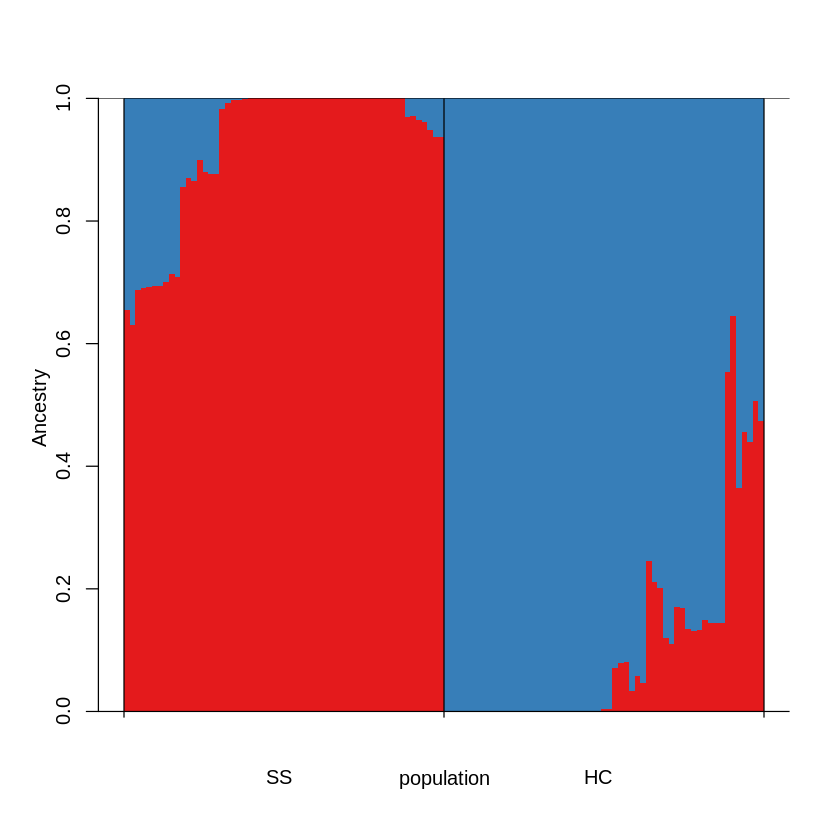

In [26]:
%expand
# primitive look at admixture data:
# tbl=read.table("rads.2.Q")
# barplot(t(as.matrix(tbl)), col=rainbow(5),xlab="Individual #", ylab="Ancestry", border=NA)

#-----------------
# prettier:

# assembling the input table
dir="./Admix/" # path to input files
inName="{SUFFIX}_2.qopt" # name of the input file to plot, output of ngsAdmix or ADMIXTURE run
npops=2
pops="SSHCfiltNreps.ind2pop" # 2-column tab-delimited table of individual assignments to populations; must be in the same order as samples in the bam list or vcf file.
tbl=read.table(paste(dir,inName,sep=""),header=F)
i2p=read.table(paste(dir,pops,sep=""),header=F)
names(i2p)=c("ind","pop")
tbl=cbind(tbl,i2p)
row.names(tbl)=tbl$ind

head(tbl,5) # this is how the resulting dataset must look

source("../../../2bRAD_denovo/plot_admixture_v4_function.R")

# putting populaitons in desired order (edit pop names as needed or skip to plot them alphabetically)
tbl$pop=factor(tbl$pop,levels=c("SS","HC"))

ords=plotAdmixture(data=tbl,npops=npops,angle=0,vshift=0,hshift=0)


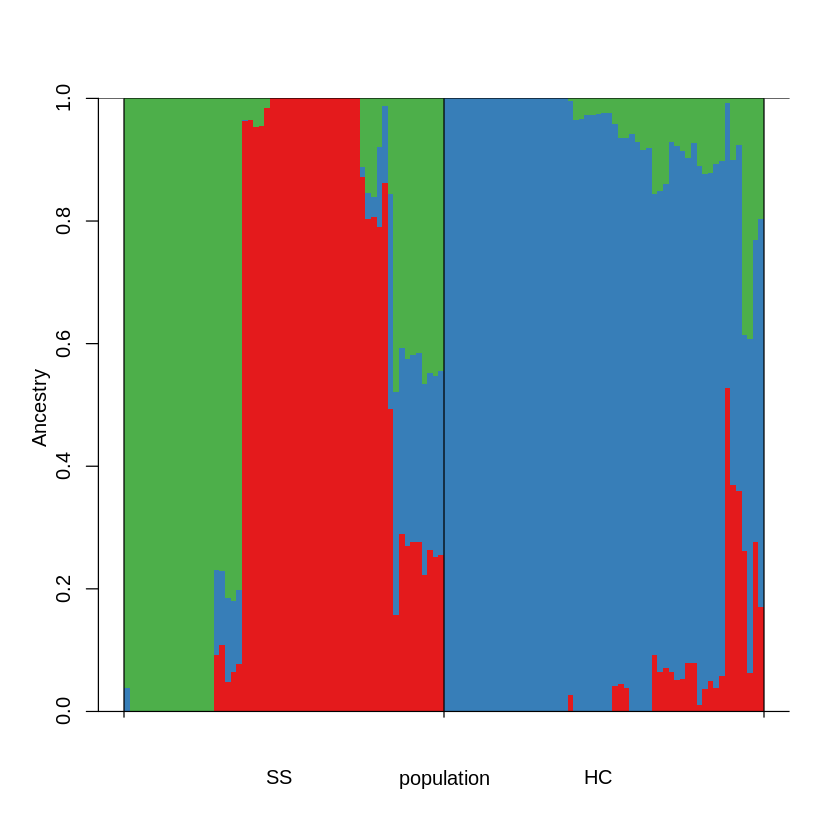

In [27]:
%expand
# primitive look at admixture data:
# tbl=read.table("rads.2.Q")
# barplot(t(as.matrix(tbl)), col=rainbow(5),xlab="Individual #", ylab="Ancestry", border=NA)

#-----------------
# prettier:

# assembling the input table
dir="./Admix/" # path to input files
inName="{SUFFIX}_3.qopt" # name of the input file to plot, output of ngsAdmix or ADMIXTURE run
npops=3
pops="SSHCfiltNreps.ind2pop" # 2-column tab-delimited table of individual assignments to populations; must be in the same order as samples in the bam list or vcf file.
tbl=read.table(paste(dir,inName,sep=""),header=F)
i2p=read.table(paste(dir,pops,sep=""),header=F)
names(i2p)=c("ind","pop")
tbl=cbind(tbl,i2p)
row.names(tbl)=tbl$ind

source("../../../2bRAD_denovo/plot_admixture_v4_function.R")

# putting populaitons in desired order (edit pop names as needed or skip to plot them alphabetically)
tbl$pop=factor(tbl$pop,levels=c("SS","HC"))

ords=plotAdmixture(data=tbl,npops=npops,angle=0,vshift=0,hshift=0)

## Genetic Distances

In [33]:
%expand
module load gcc/6.2.0
module load ngstools

mkdir Results
NIND=`cat SSHCbams_filt_nreps | wc -l`
NSITES=`zcat {SUFFIX}.mafs.gz | tail -n+2 | wc -l`
ngsDist -verbose 1 -geno {SUFFIX}relate.geno.gz -probs -n_ind $NIND -n_sites $NSITES -labels SSHCfiltNreps.ind2pop -o Results/{SUFFIX}.dist -n_threads 8 
head Results/{SUFFIX}.dist

mkdir: cannot create directory `Results': File exists
==> Input Arguments:
	geno: HCSS_Afilt32m70_01relate.geno.gz
	probs: true
	log_scale: false
	n_ind: 114
	n_sites: 5269
	tot_sites: 0
	labels: SSHCfiltNreps.ind2pop (WITHOUT header)
	call_geno: false
	N_thresh: 0.000000
	call_thresh: 0.000000
	pairwise_del: false
	avg_nuc_dist: false
	geno_indep: false
	n_boot_rep: 0
	boot_block_size: 1
	out: Results/HCSS_Afilt32m70_01.dist
	n_threads: 8
	version: false
	verbose: 1
	seed: 1564768358

==> Analysis will be run in 6441 combinations
==> GZIP input file (never BINARY)
==> Reading labels
==> Reading genotype data
==> Analyzing full dataset...
==> Freeing memory...
Done!

114
HC1-11	0.0000000000	0.2202145291	0.2085823468	0.2190188544	0.1089129551	0.1304326489	0.2257901914	0.2170406541	0.2172036299	0.2213345655	0.2109273935	0.2161100046	0.2193427776	0.2246773265	0.2128498063	0.2202992339	0.2186809182	0.2133651894	0.2247884782	0.2258824167	0.2207885918	0.2169592685	0.2258850624	0.2189896903	0

HC1-19	0.2257901914	0.2218940352	0.2272040855	0.2197414323	0.2271882216	0.2195641183	0.0000000000	0.2186858244	0.2208499673	0.2155870036	0.2094445018	0.2233696667	0.2232066859	0.2304749928	0.2133512254	0.2223697131	0.2291790124	0.2026322994	0.2215532369	0.2287334484	0.2206342564	0.2147558114	0.2293680738	0.2224934753	0.2264378362	0.2289074229	0.2240821344	0.2155705038	0.2309349856	0.2224516772	0.2171440007	0.2233268052	0.2209927371	0.2214885705	0.2212269918	0.2175923503	0.2187126791	0.2148456228	0.2261141212	0.2190276880	0.2150256882	0.2246236525	0.2255773391	0.2148554999	0.2201969076	0.2259332050	0.2235459416	0.2221898463	0.2220740504	0.2202087494	0.2260197699	0.2172957428	0.2192923755	0.2223855848	0.2167207756	0.2173164090	0.2122109484	0.2190805488	0.2073900738	0.2202527351	0.2082723423	0.2057332945	0.2187772252	0.2173470768	0.1957697255	0.2200233094	0.2124164190	0.2216843361	0.2182077644	0.2084581455	0.2059528582	0.2110976923	0.2175860546	0.2130252538	0.2213989727	0.2139759359	0.212

In [36]:
%expand
module load gcc/6.2.0
module load fastme/2.1.5

fastme -D 1 -i Results/{SUFFIX}.dist -o Results/{SUFFIX}.tree -m b -n b


 . This analysis will run on 10 threads.

#  Analysing dataset 1

 . Warning: Triangular inequality violation.

 . You may ask for triangular inequality correction using the '-q' option.

 . Computing tree...

 . Performing NNI...

 . Warning: 
	Explained variance = 0.889 (<0.90).
	Check your input data.

 . Time used 0h00m00s



Attaching package: 'phangorn'

The following object is masked from 'package:colorspace':

    coords



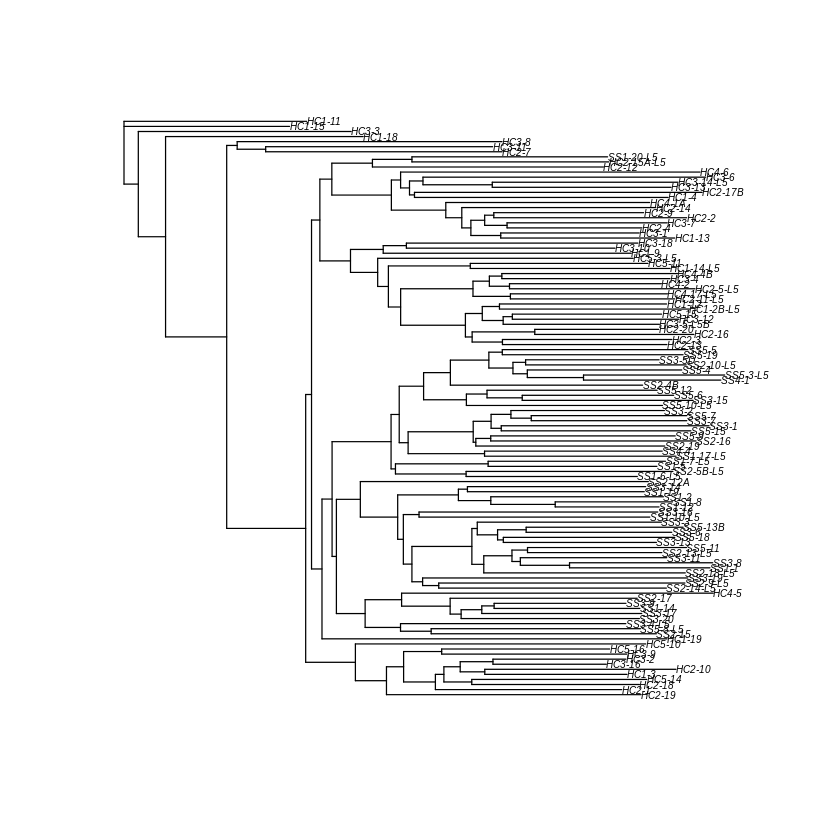

In [37]:
%expand 
library(ape)
library(phangorn)

#pdf(file=fout)

plot(read.tree("Results/{SUFFIX}.tree"), cex=0.5)

### MDS

In [40]:
%expand
module load gcc/6.2.0
module load ngstools

NGSTOOLS="/apps/software/gcc-6.2.0/ngstools"

NIND=`cat SSHCbams_filt_nreps | wc -l`
tail -n +3 Results/{SUFFIX}.dist | head -n $NIND | Rscript --vanilla --slave $NGSTOOLS/Scripts/getMDS.R --no_header --data_symm -n 4 -m "mds" -o Results/{SUFFIX}.mds

# Input file: stdin
# Has input file a header: FALSE
# Is input matrix symmetric?: TRUE
# Method: mds
# Number components to calculate: 4
# Reference samples:
# Projection samples:
# Excluded samples:
# Type of data: general
# Missing data char: NA
# Out file: Results/HCSS_Afilt32m70_01.mds


In [43]:
%expand

Rscript $NGSTOOLS/Scripts/plotMDS.R -i Results/{SUFFIX}.mds -c 1-2 -a SSHCfiltNreps.ind2pop.mds -o Results/{SUFFIX}_12.mds.pdf


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Saving 7 x 7 in image


In [44]:
%expand
pdftoppm -jpeg Results/{SUFFIX}_12.mds.pdf Results/{SUFFIX}_12.mds

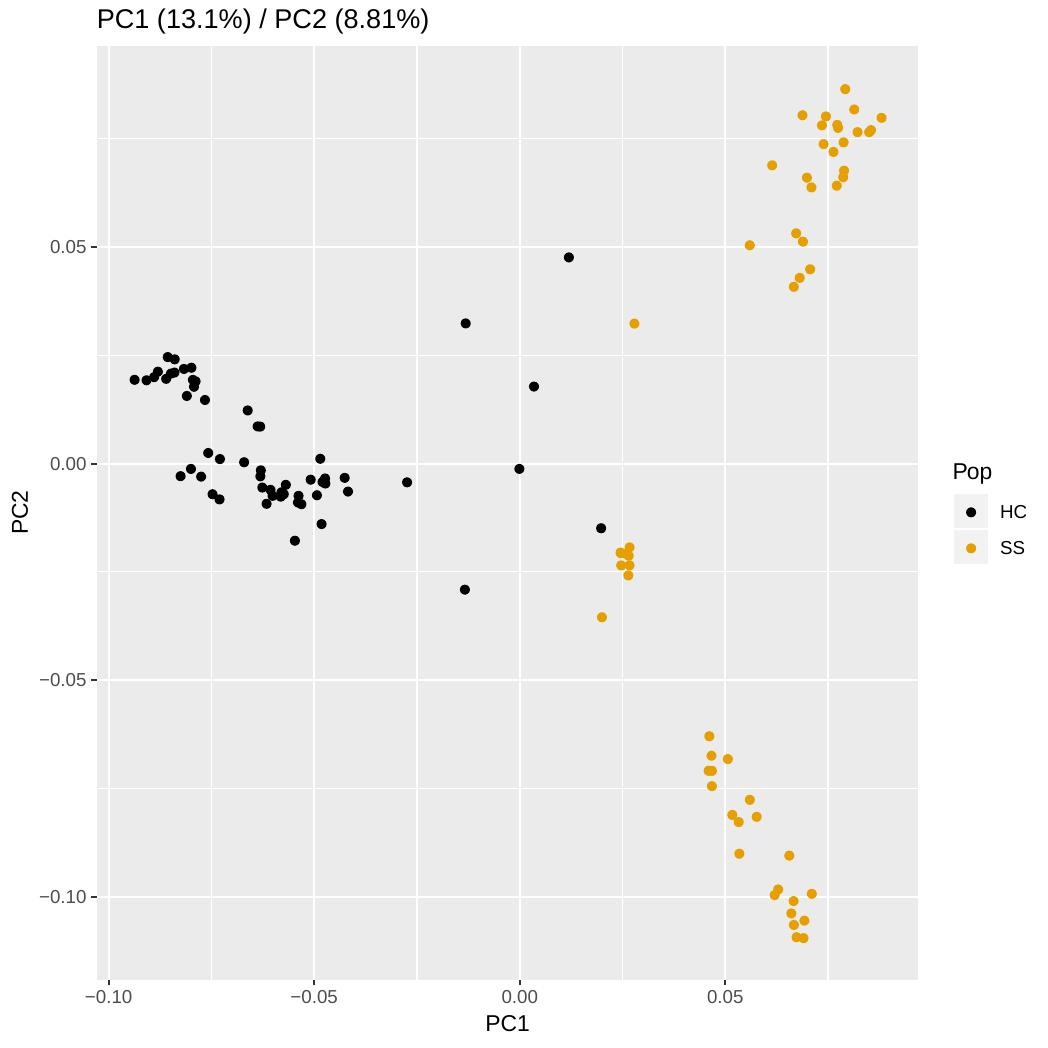

In [45]:
%expand
from IPython.display import Image

fig = Image(filename=('Results/{SUFFIX}_12.mds-1.jpg'))
fig

### Just mbd samples

In [56]:
%expand
dist.mat <- read.table("Results/{SUFFIX}.dist", header= F, row.names = 1, skip = 2)
colnames(dist.mat) <- rownames(dist.mat)
mbdnames = c("HC1-2B-L5","HC1-4","HC2-15A-L5","HC2-17B","HC3-1","HC3-5-L5B","HC3-7","HC3-10","HC3-11",
        "SS2-9-L5","SS2-14-L5","SS2-18-L5","SS3-3","SS3-14","SS3-15","SS3-16","SS3-20","SS5-18")
mbd <- dist.mat[mbdnames,mbdnames]

mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
colnames(mbd) <- mbdorder
rownames(mbd) <- mbdorder
mbd
write.table(mbd, file = "Results/{SUFFIX}_mbd.dist", row.names = T, col.names = T, quote = F, sep="\t")
line="18"
tmp <- "Results/{SUFFIX}_mbdinput.dist"
cat(line, "\n", file = tmp) 
write.table(mbd, file = tmp, append = TRUE, row.names = T, col.names=F,quote = F, sep = "\t")

hc1_2     hc1_4     hc2_15    hc2_17    hc3_1     hc3_5     hc3_7    
hc1_2  0.0000000 0.2155436 0.2054988 0.2245761 0.2140475 0.1251035 0.2137833
hc1_4  0.2155436 0.0000000 0.1844240 0.1693271 0.1811331 0.2071129 0.1608409
hc2_15 0.2054988 0.1844240 0.0000000 0.2041950 0.1854690 0.2021604 0.1823913
hc2_17 0.2245761 0.1693271 0.2041950 0.0000000 0.1884048 0.2163634 0.1724402
hc3_1  0.2140475 0.1811331 0.1854690 0.1884048 0.0000000 0.2084380 0.1141350
hc3_5  0.1251035 0.2071129 0.2021604 0.2163634 0.2084380 0.0000000 0.2104185
hc3_7  0.2137833 0.1608409 0.1823913 0.1724402 0.1141350 0.2104185 0.0000000
hc3_10 0.1941731 0.2090009 0.1592689 0.2179260 0.2070880 0.1869989 0.2098760
hc3_11 0.2196581 0.2157563 0.2168135 0.2265039 0.2092909 0.2143060 0.2154145
ss2_9  0.2191748 0.2186305 0.2041132 0.2268210 0.2195993 0.2202222 0.2211945
ss2_14 0.2201363 0.2188330 0.2085476 0.2268209 0.2160866 0.2148287 0.2233552
ss2_18 0.2251679 0.2146309 0.1910094 0.2283067 0.2155464 0.2214425 0.2236631
ss3_3  0.2293540 0.2291905 0.2042863 0.2379735 0.2254828 0.2216537 0.2265407
ss3_14 0.2303018 0.2247412 0.2045106 0.2322090 0.2196778 0.2194587 0.2248371
ss3_15 0.2273960 0.2257357 0.2061360 0.2385235 0.2258590 0.2223524 0.2269251
ss3_16 0.2267536 0.2190871 0.2040459 0.2269364 0.2205749 0.2192765 0.2224353
ss3_20 0.2241723 0.2157204 0.2013346 0.2294361 0.2200920 0.2221298 0.2260581
ss5_18 0.2393679 0.2274161 0.2098602 0.2372695 0.2156870 0.2263948 0.2286600
       hc3_10    hc3_11    ss2_9     ss2_14    ss2_18    ss3_3     ss3_14   
hc1_2  0.1941731 0.2196581 0.2191748 0.2201363 0.2251679 0.2293540 0.2303018
hc1_4  0.2090009 0.2157563 0.2186305 0.2188330 0.2146309 0.2291905 0.2247412
hc2_15 0.1592689 0.2168135 0.2041132 0.2085476 0.1910094 0.2042863 0.2045106
hc2_17 0.2179260 0.2265039 0.2268210 0.2268209 0.2283067 0.2379735 0.2322090
hc3_1  0.2070880 0.2092909 0.2195993 0.2160866 0.2155464 0.2254828 0.2196778
hc3_5  0.1869989 0.2143060 0.2202222 0.2148287 0.2214425 0.2216537 0.2194587
hc3_7  0.2098760 0.2154145 0.2211945 0.2233552 0.2236631 0.2265407 0.2248371
hc3_10 0.0000000 0.2158190 0.2072541 0.2123815 0.2048036 0.2057382 0.2078799
hc3_11 0.2158190 0.0000000 0.2204729 0.2206785 0.2201360 0.2362094 0.2252514
ss2_9  0.2072541 0.2204729 0.0000000 0.1482022 0.1643140 0.1565610 0.1642693
ss2_14 0.2123815 0.2206785 0.1482022 0.0000000 0.1741098 0.1484094 0.1731242
ss2_18 0.2048036 0.2201360 0.1643140 0.1741098 0.0000000 0.1311476 0.1613894
ss3_3  0.2057382 0.2362094 0.1565610 0.1484094 0.1311476 0.0000000 0.1692117
ss3_14 0.2078799 0.2252514 0.1642693 0.1731242 0.1613894 0.1692117 0.0000000
ss3_15 0.1916720 0.2307265 0.2091080 0.2053117 0.2121693 0.2093890 0.2101518
ss3_16 0.2139469 0.2282604 0.1664055 0.1555210 0.1856383 0.1462554 0.1645175
ss3_20 0.2081097 0.2200907 0.2066793 0.2028654 0.1988239 0.2056096 0.2069574
ss5_18 0.2118349 0.2270442 0.1738464 0.1736163 0.1271048 0.1244475 0.1486115
       ss3_15    ss3_16    ss3_20    ss5_18   
hc1_2  0.2273960 0.2267536 0.2241723 0.2393679
hc1_4  0.2257357 0.2190871 0.2157204 0.2274161
hc2_15 0.2061360 0.2040459 0.2013346 0.2098602
hc2_17 0.2385235 0.2269364 0.2294361 0.2372695
hc3_1  0.2258590 0.2205749 0.2200920 0.2156870
hc3_5  0.2223524 0.2192765 0.2221298 0.2263948
hc3_7  0.2269251 0.2224353 0.2260581 0.2286600
hc3_10 0.1916720 0.2139469 0.2081097 0.2118349
hc3_11 0.2307265 0.2282604 0.2200907 0.2270442
ss2_9  0.2091080 0.1664055 0.2066793 0.1738464
ss2_14 0.2053117 0.1555210 0.2028654 0.1736163
ss2_18 0.2121693 0.1856383 0.1988239 0.1271048
ss3_3  0.2093890 0.1462554 0.2056096 0.1244475
ss3_14 0.2101518 0.1645175 0.2069574 0.1486115
ss3_15 0.0000000 0.2127640 0.2091865 0.2141706
ss3_16 0.2127640 0.0000000 0.2047189 0.1671745
ss3_20 0.2091865 0.2047189 0.0000000 0.2039022
ss5_18 0.2141706 0.1671745 0.2039022 0.0000000

In [57]:
%expand
module load gcc/6.2.0
module load fastme/2.1.5

fastme -D 1 -i Results/{SUFFIX}_mbdinput.dist -o Results/{SUFFIX}_mbd.tree -m b -n b


 . This analysis will run on 10 threads.

#  Analysing dataset 1

 . Warning: Triangular inequality violation.

 . You may ask for triangular inequality correction using the '-q' option.

 . Computing tree...

 . Performing NNI...

 . Time used 0h00m00s


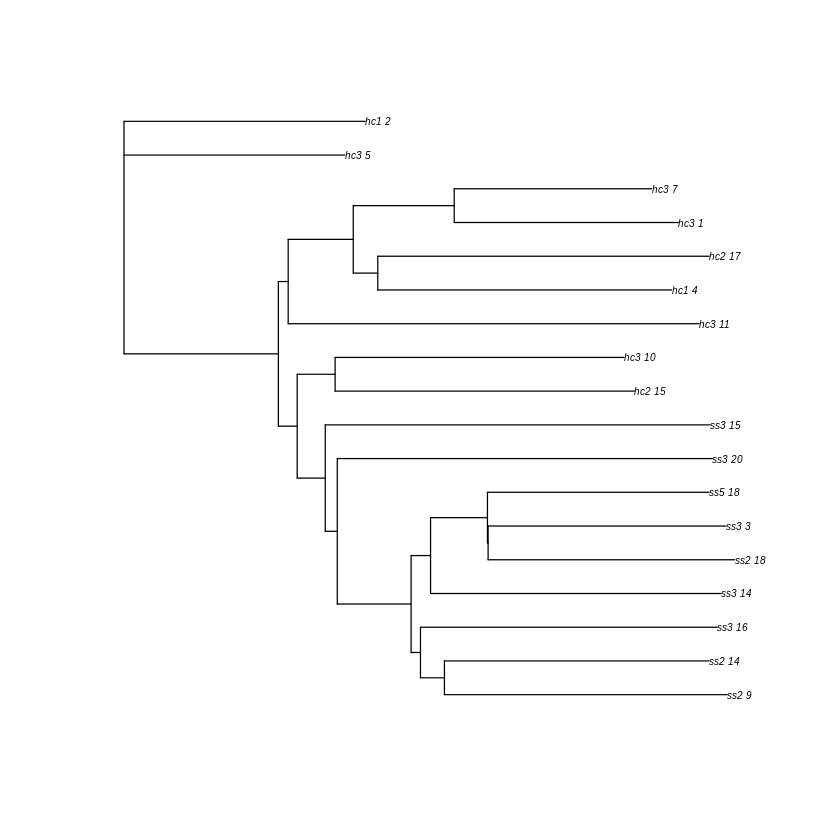

In [58]:
%expand 
library(ape)
library(phangorn)

#pdf(file=fout)

plot(read.tree("Results/{SUFFIX}_mbd.tree"), cex=0.5)

### MDS

In [ ]:
# make ind2pop file


In [60]:
%expand
module load gcc/6.2.0
module load ngstools

NGSTOOLS="/apps/software/gcc-6.2.0/ngstools"

tail -n +2 Results/{SUFFIX}_mbd.dist | head -n 18 | Rscript --vanilla --slave $NGSTOOLS/Scripts/getMDS.R --no_header --data_symm -n 4 -m "mds" -o Results/{SUFFIX}_mbd.mds

# Input file: stdin
# Has input file a header: FALSE
# Is input matrix symmetric?: TRUE
# Method: mds
# Number components to calculate: 4
# Reference samples:
# Projection samples:
# Excluded samples:
# Type of data: general
# Missing data char: NA
# Out file: Results/HCSS_Afilt32m70_01_mbd.mds


In [43]:
%expand

Rscript $NGSTOOLS/Scripts/plotMDS.R -i Results/{SUFFIX}_mbd.mds -c 1-2 -a SSHCfiltNreps.ind2pop.mds -o Results/{SUFFIX}_12.mds.pdf


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Saving 7 x 7 in image


In [44]:
%expand
pdftoppm -jpeg Results/{SUFFIX}_12.mds.pdf Results/{SUFFIX}_12.mds

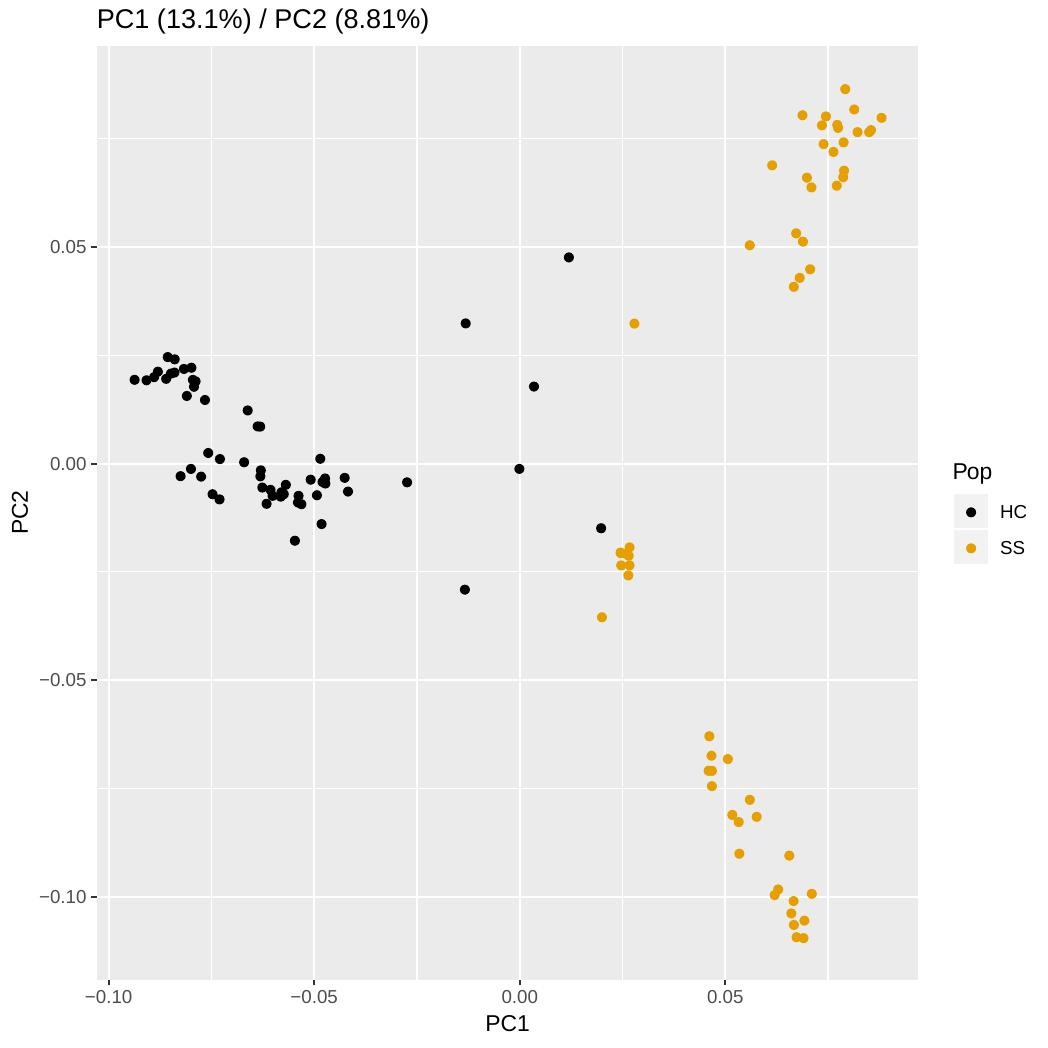

In [45]:
%expand
from IPython.display import Image

fig = Image(filename=('Results/{SUFFIX}_12.mds-1.jpg'))
fig

## SFS for Fst

In [20]:
sfsSuf = "SFS/HCSS_sfsm80"

In [9]:
module load gcc/6.2.0
module load angsd/0.918

In [15]:
%expand [ ]

zcat [sfsSuf].geno.gz | python ../../../2bRAD_denovo/HetMajorityProb.py | awk "\$6 < 0.75 {print \$1\"\\t\"\$2}" > [sfsSuf]_aSites

In [ ]:
%expand
angsd sites index {sfsSuf}_aSites

	-> angsd version: 0.918 (htslib: 1.5) build(Aug  1 2017 16:32:01)
	-> Indexing SFS/HCSS_sfsm80_aSites and will add '0' to pos column
	-> Filterfile: SFS/HCSS_sfsm80_aSites supplied will generate binary representations... 
	-> Input file has 2 columns, chr pos
	-> Writing chr:'Contig0' 
	-> Writing chr:'Contig1' 
	-> Writing chr:'Contig2' 
	-> Writing chr:'Contig3' 
	-> Writing chr:'Contig4' 
	-> Writing chr:'Contig5' 
	-> Writing chr:'Contig6' 
	-> Writing chr:'Contig8' 
	-> Writing chr:'Contig9' 
	-> Writing chr:'Contig12' 
	-> Writing chr:'Contig13' 
	-> Writing chr:'Contig16' 
	-> Writing chr:'Contig17' 
	-> Writing chr:'Contig18' 
	-> Writing chr:'Contig21' 
	-> Writing chr:'Contig24' 
	-> Writing chr:'Contig25' 
	-> Writing chr:'Contig26' 
	-> Writing chr:'Contig28' 
	-> Writing chr:'Contig30' 
	-> Writing chr:'Contig32' 
	-> Writing chr:'Contig33' 
	-> Writing chr:'Contig35' 
	-> Writing chr:'Contig38' 
	-> Writing chr:'Contig39' 
	-> Writing chr:'Contig41' 
	-> Writing chr:'Con

	-> Writing chr:'Contig697' 
	-> Writing chr:'Contig698' 
	-> Writing chr:'Contig705' 
	-> Writing chr:'Contig706' 
	-> Writing chr:'Contig708' 
	-> Writing chr:'Contig709' 
	-> Writing chr:'Contig711' 
	-> Writing chr:'Contig714' 
	-> Writing chr:'Contig716' 
	-> Writing chr:'Contig721' 
	-> Writing chr:'Contig726' 
	-> Writing chr:'Contig727' 
	-> Writing chr:'Contig729' 
	-> Writing chr:'Contig731' 
	-> Writing chr:'Contig733' 
	-> Writing chr:'Contig741' 
	-> Writing chr:'Contig745' 
	-> Writing chr:'Contig748' 
	-> Writing chr:'Contig753' 
	-> Writing chr:'Contig754' 
	-> Writing chr:'Contig755' 
	-> Writing chr:'Contig756' 
	-> Writing chr:'Contig760' 
	-> Writing chr:'Contig762' 
	-> Writing chr:'Contig765' 
	-> Writing chr:'Contig769' 
	-> Writing chr:'Contig771' 
	-> Writing chr:'Contig773' 
	-> Writing chr:'Contig775' 
	-> Writing chr:'Contig776' 
	-> Writing chr:'Contig777' 
	-> Writing chr:'Contig778' 
	-> Writing chr:'Contig781' 
	-> Writing chr:'Contig786' 
	-> Writing ch

	-> Writing chr:'Contig1990' 
	-> Writing chr:'Contig1992' 
	-> Writing chr:'Contig1996' 
	-> Writing chr:'Contig2010' 
	-> Writing chr:'Contig2028' 
	-> Writing chr:'Contig2029' 
	-> Writing chr:'Contig2033' 
	-> Writing chr:'Contig2034' 
	-> Writing chr:'Contig2037' 
	-> Writing chr:'Contig2047' 
	-> Writing chr:'Contig2048' 
	-> Writing chr:'Contig2051' 
	-> Writing chr:'Contig2059' 
	-> Writing chr:'Contig2071' 
	-> Writing chr:'Contig2074' 
	-> Writing chr:'Contig2076' 
	-> Writing chr:'Contig2077' 
	-> Writing chr:'Contig2078' 
	-> Writing chr:'Contig2085' 
	-> Writing chr:'Contig2095' 
	-> Writing chr:'Contig2102' 
	-> Writing chr:'Contig2105' 
	-> Writing chr:'Contig2108' 
	-> Writing chr:'Contig2121' 
	-> Writing chr:'Contig2123' 
	-> Writing chr:'Contig2143' 
	-> Writing chr:'Contig2145' 
	-> Writing chr:'Contig2151' 
	-> Writing chr:'Contig2155' 
	-> Writing chr:'Contig2158' 
	-> Writing chr:'Contig2166' 
	-> Writing chr:'Contig2172' 
	-> Writing chr:'Contig2184' 
	-> Writin

	-> Writing chr:'Contig4083' 
	-> Writing chr:'Contig4084' 
	-> Writing chr:'Contig4087' 
	-> Writing chr:'Contig4093' 
	-> Writing chr:'Contig4094' 
	-> Writing chr:'Contig4098' 
	-> Writing chr:'Contig4124' 
	-> Writing chr:'Contig4128' 
	-> Writing chr:'Contig4133' 
	-> Writing chr:'Contig4138' 
	-> Writing chr:'Contig4141' 
	-> Writing chr:'Contig4142' 
	-> Writing chr:'Contig4150' 
	-> Writing chr:'Contig4152' 
	-> Writing chr:'Contig4161' 
	-> Writing chr:'Contig4162' 
	-> Writing chr:'Contig4168' 
	-> Writing chr:'Contig4171' 
	-> Writing chr:'Contig4197' 
	-> Writing chr:'Contig4205' 
	-> Writing chr:'Contig4210' 
	-> Writing chr:'Contig4212' 
	-> Writing chr:'Contig4221' 
	-> Writing chr:'Contig4231' 
	-> Writing chr:'Contig4255' 
	-> Writing chr:'Contig4267' 
	-> Writing chr:'Contig4297' 
	-> Writing chr:'Contig4305' 
	-> Writing chr:'Contig4311' 
	-> Writing chr:'Contig4319' 
	-> Writing chr:'Contig4322' 
	-> Writing chr:'Contig4342' 
	-> Writing chr:'Contig4343' 
	-> Writin

	-> Writing chr:'Contig8220' 
	-> Writing chr:'Contig8229' 
	-> Writing chr:'Contig8245' 
	-> Writing chr:'Contig8272' 
	-> Writing chr:'Contig8275' 
	-> Writing chr:'Contig8301' 
	-> Writing chr:'Contig8309' 
	-> Writing chr:'Contig8311' 
	-> Writing chr:'Contig8316' 
	-> Writing chr:'Contig8326' 
	-> Writing chr:'Contig8330' 
	-> Writing chr:'Contig8345' 
	-> Writing chr:'Contig8362' 
	-> Writing chr:'Contig8378' 
	-> Writing chr:'Contig8386' 
	-> Writing chr:'Contig8443' 
	-> Writing chr:'Contig8452' 
	-> Writing chr:'Contig8494' 
	-> Writing chr:'Contig8510' 
	-> Writing chr:'Contig8523' 
	-> Writing chr:'Contig8532' 
	-> Writing chr:'Contig8533' 
	-> Writing chr:'Contig8601' 
	-> Writing chr:'Contig8618' 
	-> Writing chr:'Contig8636' 
	-> Writing chr:'Contig8641' 
	-> Writing chr:'Contig8651' 
	-> Writing chr:'Contig8664' 
	-> Writing chr:'Contig8696' 
	-> Writing chr:'Contig8781' 
	-> Writing chr:'Contig8812' 
	-> Writing chr:'Contig8914' 
	-> Writing chr:'Contig8926' 
	-> Writin

	-> Writing chr:'Contig16958' 
	-> Writing chr:'Contig16967' 
	-> Writing chr:'Contig17004' 
	-> Writing chr:'Contig17005' 
	-> Writing chr:'Contig17012' 
	-> Writing chr:'Contig17021' 
	-> Writing chr:'Contig17022' 
	-> Writing chr:'Contig17037' 
	-> Writing chr:'Contig17050' 
	-> Writing chr:'Contig17057' 
	-> Writing chr:'Contig17059' 
	-> Writing chr:'Contig17060' 
	-> Writing chr:'Contig17070' 
	-> Writing chr:'Contig17080' 
	-> Writing chr:'Contig17091' 
	-> Writing chr:'Contig17102' 
	-> Writing chr:'Contig17104' 
	-> Writing chr:'Contig17108' 
	-> Writing chr:'Contig17132' 
	-> Writing chr:'Contig17148' 
	-> Writing chr:'Contig17149' 
	-> Writing chr:'Contig17150' 
	-> Writing chr:'Contig17153' 
	-> Writing chr:'Contig17163' 
	-> Writing chr:'Contig17164' 
	-> Writing chr:'Contig17167' 
	-> Writing chr:'Contig17168' 
	-> Writing chr:'Contig17171' 
	-> Writing chr:'Contig17173' 
	-> Writing chr:'Contig17174' 
	-> Writing chr:'Contig17177' 
	-> Writing chr:'Contig17182' 
	-> Writ

	-> Writing chr:'Contig19248' 
	-> Writing chr:'Contig19256' 
	-> Writing chr:'Contig19257' 
	-> Writing chr:'Contig19267' 
	-> Writing chr:'Contig19273' 
	-> Writing chr:'Contig19288' 
	-> Writing chr:'Contig19292' 
	-> Writing chr:'Contig19293' 
	-> Writing chr:'Contig19307' 
	-> Writing chr:'Contig19332' 
	-> Writing chr:'Contig19335' 
	-> Writing chr:'Contig19348' 
	-> Writing chr:'Contig19351' 
	-> Writing chr:'Contig19354' 
	-> Writing chr:'Contig19371' 
	-> Writing chr:'Contig19372' 
	-> Writing chr:'Contig19431' 
	-> Writing chr:'Contig19449' 
	-> Writing chr:'Contig19458' 
	-> Writing chr:'Contig19473' 
	-> Writing chr:'Contig19477' 
	-> Writing chr:'Contig19479' 
	-> Writing chr:'Contig19484' 
	-> Writing chr:'Contig19486' 
	-> Writing chr:'Contig19496' 
	-> Writing chr:'Contig19501' 
	-> Writing chr:'Contig19503' 
	-> Writing chr:'Contig19507' 
	-> Writing chr:'Contig19524' 
	-> Writing chr:'Contig19553' 
	-> Writing chr:'Contig19558' 
	-> Writing chr:'Contig19564' 
	-> Writ

	-> Writing chr:'Contig21797' 
	-> Writing chr:'Contig21801' 
	-> Writing chr:'Contig21803' 
	-> Writing chr:'Contig21804' 
	-> Writing chr:'Contig21806' 
	-> Writing chr:'Contig21811' 
	-> Writing chr:'Contig21816' 
	-> Writing chr:'Contig21828' 
	-> Writing chr:'Contig21830' 
	-> Writing chr:'Contig21842' 
	-> Writing chr:'Contig21845' 
	-> Writing chr:'Contig21847' 
	-> Writing chr:'Contig21859' 
	-> Writing chr:'Contig21866' 
	-> Writing chr:'Contig21876' 
	-> Writing chr:'Contig21877' 
	-> Writing chr:'Contig21894' 
	-> Writing chr:'Contig21903' 
	-> Writing chr:'Contig21913' 
	-> Writing chr:'Contig21921' 
	-> Writing chr:'Contig21923' 
	-> Writing chr:'Contig21933' 
	-> Writing chr:'Contig21936' 
	-> Writing chr:'Contig21950' 
	-> Writing chr:'Contig21951' 
	-> Writing chr:'Contig21956' 
	-> Writing chr:'Contig21957' 
	-> Writing chr:'Contig21958' 
	-> Writing chr:'Contig21960' 
	-> Writing chr:'Contig21964' 
	-> Writing chr:'Contig21970' 
	-> Writing chr:'Contig21974' 
	-> Writ

	-> Writing chr:'Contig24041' 
	-> Writing chr:'Contig24042' 
	-> Writing chr:'Contig24051' 
	-> Writing chr:'Contig24054' 
	-> Writing chr:'Contig24058' 
	-> Writing chr:'Contig24084' 
	-> Writing chr:'Contig24090' 
	-> Writing chr:'Contig24093' 
	-> Writing chr:'Contig24095' 
	-> Writing chr:'Contig24097' 
	-> Writing chr:'Contig24100' 
	-> Writing chr:'Contig24101' 
	-> Writing chr:'Contig24129' 
	-> Writing chr:'Contig24130' 
	-> Writing chr:'Contig24144' 
	-> Writing chr:'Contig24164' 
	-> Writing chr:'Contig24172' 
	-> Writing chr:'Contig24175' 
	-> Writing chr:'Contig24191' 
	-> Writing chr:'Contig24202' 
	-> Writing chr:'Contig24215' 
	-> Writing chr:'Contig24218' 
	-> Writing chr:'Contig24238' 
	-> Writing chr:'Contig24241' 
	-> Writing chr:'Contig24243' 
	-> Writing chr:'Contig24263' 
	-> Writing chr:'Contig24273' 
	-> Writing chr:'Contig24279' 
	-> Writing chr:'Contig24282' 
	-> Writing chr:'Contig24292' 
	-> Writing chr:'Contig24294' 
	-> Writing chr:'Contig24295' 
	-> Writ

	-> Writing chr:'Contig26344' 
	-> Writing chr:'Contig26345' 
	-> Writing chr:'Contig26348' 
	-> Writing chr:'Contig26355' 
	-> Writing chr:'Contig26364' 
	-> Writing chr:'Contig26365' 
	-> Writing chr:'Contig26378' 
	-> Writing chr:'Contig26383' 
	-> Writing chr:'Contig26389' 
	-> Writing chr:'Contig26391' 
	-> Writing chr:'Contig26400' 
	-> Writing chr:'Contig26402' 
	-> Writing chr:'Contig26410' 
	-> Writing chr:'Contig26420' 
	-> Writing chr:'Contig26423' 
	-> Writing chr:'Contig26428' 
	-> Writing chr:'Contig26431' 
	-> Writing chr:'Contig26450' 
	-> Writing chr:'Contig26458' 
	-> Writing chr:'Contig26465' 
	-> Writing chr:'Contig26471' 
	-> Writing chr:'Contig26475' 
	-> Writing chr:'Contig26482' 
	-> Writing chr:'Contig26490' 
	-> Writing chr:'Contig26502' 
	-> Writing chr:'Contig26509' 
	-> Writing chr:'Contig26516' 
	-> Writing chr:'Contig26531' 
	-> Writing chr:'Contig26534' 
	-> Writing chr:'Contig26536' 
	-> Writing chr:'Contig26549' 
	-> Writing chr:'Contig26564' 
	-> Writ

	-> Writing chr:'Contig28854' 
	-> Writing chr:'Contig28867' 
	-> Writing chr:'Contig28887' 
	-> Writing chr:'Contig28893' 
	-> Writing chr:'Contig28898' 
	-> Writing chr:'Contig28902' 
	-> Writing chr:'Contig28935' 
	-> Writing chr:'Contig28937' 
	-> Writing chr:'Contig28946' 
	-> Writing chr:'Contig28951' 
	-> Writing chr:'Contig28966' 
	-> Writing chr:'Contig28987' 
	-> Writing chr:'Contig28993' 
	-> Writing chr:'Contig28999' 
	-> Writing chr:'Contig29002' 
	-> Writing chr:'Contig29003' 
	-> Writing chr:'Contig29010' 
	-> Writing chr:'Contig29027' 
	-> Writing chr:'Contig29033' 
	-> Writing chr:'Contig29051' 
	-> Writing chr:'Contig29067' 
	-> Writing chr:'Contig29068' 
	-> Writing chr:'Contig29072' 
	-> Writing chr:'Contig29076' 
	-> Writing chr:'Contig29092' 
	-> Writing chr:'Contig29104' 
	-> Writing chr:'Contig29105' 
	-> Writing chr:'Contig29118' 
	-> Writing chr:'Contig29138' 
	-> Writing chr:'Contig29153' 
	-> Writing chr:'Contig29191' 
	-> Writing chr:'Contig29199' 
	-> Writ

	-> Writing chr:'Contig31541' 
	-> Writing chr:'Contig31551' 
	-> Writing chr:'Contig31570' 
	-> Writing chr:'Contig31577' 
	-> Writing chr:'Contig31584' 
	-> Writing chr:'Contig31586' 
	-> Writing chr:'Contig31593' 
	-> Writing chr:'Contig31613' 
	-> Writing chr:'Contig31615' 
	-> Writing chr:'Contig31619' 
	-> Writing chr:'Contig31629' 
	-> Writing chr:'Contig31640' 
	-> Writing chr:'Contig31645' 
	-> Writing chr:'Contig31661' 
	-> Writing chr:'Contig31671' 
	-> Writing chr:'Contig31675' 
	-> Writing chr:'Contig31685' 
	-> Writing chr:'Contig31695' 
	-> Writing chr:'Contig31699' 
	-> Writing chr:'Contig31700' 
	-> Writing chr:'Contig31706' 
	-> Writing chr:'Contig31740' 
	-> Writing chr:'Contig31744' 
	-> Writing chr:'Contig31746' 
	-> Writing chr:'Contig31749' 
	-> Writing chr:'Contig31767' 
	-> Writing chr:'Contig31777' 
	-> Writing chr:'Contig31814' 
	-> Writing chr:'Contig31819' 
	-> Writing chr:'Contig31821' 
	-> Writing chr:'Contig31822' 
	-> Writing chr:'Contig31824' 
	-> Writ

	-> Writing chr:'Contig34084' 
	-> Writing chr:'Contig34091' 
	-> Writing chr:'Contig34102' 
	-> Writing chr:'Contig34105' 
	-> Writing chr:'Contig34109' 
	-> Writing chr:'Contig34110' 
	-> Writing chr:'Contig34112' 
	-> Writing chr:'Contig34115' 
	-> Writing chr:'Contig34148' 
	-> Writing chr:'Contig34183' 
	-> Writing chr:'Contig34243' 
	-> Writing chr:'Contig34267' 
	-> Writing chr:'Contig34268' 
	-> Writing chr:'Contig34272' 
	-> Writing chr:'Contig34276' 
	-> Writing chr:'Contig34282' 
	-> Writing chr:'Contig34294' 
	-> Writing chr:'Contig34296' 
	-> Writing chr:'Contig34298' 
	-> Writing chr:'Contig34305' 
	-> Writing chr:'Contig34311' 
	-> Writing chr:'Contig34312' 
	-> Writing chr:'Contig34313' 
	-> Writing chr:'Contig34342' 
	-> Writing chr:'Contig34360' 
	-> Writing chr:'Contig34372' 
	-> Writing chr:'Contig34416' 
	-> Writing chr:'Contig34428' 
	-> Writing chr:'Contig34433' 
	-> Writing chr:'Contig34452' 
	-> Writing chr:'Contig34461' 
	-> Writing chr:'Contig34464' 
	-> Writ

	-> Writing chr:'Contig36812' 
	-> Writing chr:'Contig36816' 
	-> Writing chr:'Contig36835' 
	-> Writing chr:'Contig36842' 
	-> Writing chr:'Contig36844' 
	-> Writing chr:'Contig36854' 
	-> Writing chr:'Contig36855' 
	-> Writing chr:'Contig36857' 
	-> Writing chr:'Contig36881' 
	-> Writing chr:'Contig36885' 
	-> Writing chr:'Contig36893' 
	-> Writing chr:'Contig36904' 
	-> Writing chr:'Contig36913' 
	-> Writing chr:'Contig36917' 
	-> Writing chr:'Contig36918' 
	-> Writing chr:'Contig36921' 
	-> Writing chr:'Contig36936' 
	-> Writing chr:'Contig36942' 
	-> Writing chr:'Contig36945' 
	-> Writing chr:'Contig36958' 
	-> Writing chr:'Contig36963' 
	-> Writing chr:'Contig36973' 
	-> Writing chr:'Contig36997' 
	-> Writing chr:'Contig37000' 
	-> Writing chr:'Contig37003' 
	-> Writing chr:'Contig37018' 
	-> Writing chr:'Contig37020' 
	-> Writing chr:'Contig37025' 
	-> Writing chr:'Contig37058' 
	-> Writing chr:'Contig37068' 
	-> Writing chr:'Contig37069' 
	-> Writing chr:'Contig37077' 
	-> Writ

	-> Writing chr:'Contig39563' 
	-> Writing chr:'Contig39572' 
	-> Writing chr:'Contig39573' 
	-> Writing chr:'Contig39577' 
	-> Writing chr:'Contig39581' 
	-> Writing chr:'Contig39586' 
	-> Writing chr:'Contig39605' 
	-> Writing chr:'Contig39607' 
	-> Writing chr:'Contig39613' 
	-> Writing chr:'Contig39616' 
	-> Writing chr:'Contig39656' 
	-> Writing chr:'Contig39661' 
	-> Writing chr:'Contig39677' 
	-> Writing chr:'Contig39688' 
	-> Writing chr:'Contig39703' 
	-> Writing chr:'Contig39715' 
	-> Writing chr:'Contig39719' 
	-> Writing chr:'Contig39720' 
	-> Writing chr:'Contig39723' 
	-> Writing chr:'Contig39730' 
	-> Writing chr:'Contig39733' 
	-> Writing chr:'Contig39736' 
	-> Writing chr:'Contig39759' 
	-> Writing chr:'Contig39792' 
	-> Writing chr:'Contig39793' 
	-> Writing chr:'Contig39796' 
	-> Writing chr:'Contig39798' 
	-> Writing chr:'Contig39801' 
	-> Writing chr:'Contig39810' 
	-> Writing chr:'Contig39812' 
	-> Writing chr:'Contig39830' 
	-> Writing chr:'Contig39831' 
	-> Writ

	-> Writing chr:'Contig42441' 
	-> Writing chr:'Contig42447' 
	-> Writing chr:'Contig42451' 
	-> Writing chr:'Contig42459' 
	-> Writing chr:'Contig42461' 
	-> Writing chr:'Contig42482' 
	-> Writing chr:'Contig42493' 
	-> Writing chr:'Contig42496' 
	-> Writing chr:'Contig42502' 
	-> Writing chr:'Contig42546' 
	-> Writing chr:'Contig42553' 
	-> Writing chr:'Contig42563' 
	-> Writing chr:'Contig42578' 
	-> Writing chr:'Contig42579' 
	-> Writing chr:'Contig42590' 
	-> Writing chr:'Contig42596' 
	-> Writing chr:'Contig42602' 
	-> Writing chr:'Contig42603' 
	-> Writing chr:'Contig42604' 
	-> Writing chr:'Contig42610' 
	-> Writing chr:'Contig42640' 
	-> Writing chr:'Contig42647' 
	-> Writing chr:'Contig42660' 
	-> Writing chr:'Contig42675' 
	-> Writing chr:'Contig42687' 
	-> Writing chr:'Contig42688' 
	-> Writing chr:'Contig42700' 
	-> Writing chr:'Contig42720' 
	-> Writing chr:'Contig42722' 
	-> Writing chr:'Contig42756' 
	-> Writing chr:'Contig42766' 
	-> Writing chr:'Contig42778' 
	-> Writ

	-> Writing chr:'Contig45662' 
	-> Writing chr:'Contig45664' 
	-> Writing chr:'Contig45677' 
	-> Writing chr:'Contig45681' 
	-> Writing chr:'Contig45682' 
	-> Writing chr:'Contig45695' 
	-> Writing chr:'Contig45711' 
	-> Writing chr:'Contig45720' 
	-> Writing chr:'Contig45721' 
	-> Writing chr:'Contig45734' 
	-> Writing chr:'Contig45744' 
	-> Writing chr:'Contig45749' 
	-> Writing chr:'Contig45768' 
	-> Writing chr:'Contig45783' 
	-> Writing chr:'Contig45838' 
	-> Writing chr:'Contig45845' 
	-> Writing chr:'Contig45860' 
	-> Writing chr:'Contig45866' 
	-> Writing chr:'Contig45873' 
	-> Writing chr:'Contig45876' 
	-> Writing chr:'Contig45878' 
	-> Writing chr:'Contig45905' 
	-> Writing chr:'Contig45907' 
	-> Writing chr:'Contig45927' 
	-> Writing chr:'Contig45945' 
	-> Writing chr:'Contig45949' 
	-> Writing chr:'Contig45957' 
	-> Writing chr:'Contig45964' 
	-> Writing chr:'Contig45970' 
	-> Writing chr:'Contig45972' 
	-> Writing chr:'Contig46008' 
	-> Writing chr:'Contig46040' 
	-> Writ

	-> Writing chr:'Contig49054' 
	-> Writing chr:'Contig49058' 
	-> Writing chr:'Contig49063' 
	-> Writing chr:'Contig49076' 
	-> Writing chr:'Contig49077' 
	-> Writing chr:'Contig49084' 
	-> Writing chr:'Contig49095' 
	-> Writing chr:'Contig49114' 
	-> Writing chr:'Contig49132' 
	-> Writing chr:'Contig49136' 
	-> Writing chr:'Contig49157' 
	-> Writing chr:'Contig49158' 
	-> Writing chr:'Contig49163' 
	-> Writing chr:'Contig49206' 
	-> Writing chr:'Contig49209' 
	-> Writing chr:'Contig49217' 
	-> Writing chr:'Contig49227' 
	-> Writing chr:'Contig49230' 
	-> Writing chr:'Contig49233' 
	-> Writing chr:'Contig49241' 
	-> Writing chr:'Contig49246' 
	-> Writing chr:'Contig49260' 
	-> Writing chr:'Contig49264' 
	-> Writing chr:'Contig49268' 
	-> Writing chr:'Contig49279' 
	-> Writing chr:'Contig49284' 
	-> Writing chr:'Contig49314' 
	-> Writing chr:'Contig49329' 
	-> Writing chr:'Contig49347' 
	-> Writing chr:'Contig49360' 
	-> Writing chr:'Contig49363' 
	-> Writing chr:'Contig49371' 
	-> Writ

	-> Writing chr:'Contig52641' 
	-> Writing chr:'Contig52645' 
	-> Writing chr:'Contig52649' 
	-> Writing chr:'Contig52657' 
	-> Writing chr:'Contig52659' 
	-> Writing chr:'Contig52665' 
	-> Writing chr:'Contig52683' 
	-> Writing chr:'Contig52694' 
	-> Writing chr:'Contig52704' 
	-> Writing chr:'Contig52726' 
	-> Writing chr:'Contig52746' 
	-> Writing chr:'Contig52756' 
	-> Writing chr:'Contig52759' 
	-> Writing chr:'Contig52762' 
	-> Writing chr:'Contig52768' 
	-> Writing chr:'Contig52789' 
	-> Writing chr:'Contig52798' 
	-> Writing chr:'Contig52845' 
	-> Writing chr:'Contig52851' 
	-> Writing chr:'Contig52864' 
	-> Writing chr:'Contig52890' 
	-> Writing chr:'Contig52902' 
	-> Writing chr:'Contig52951' 
	-> Writing chr:'Contig52989' 
	-> Writing chr:'Contig53011' 
	-> Writing chr:'Contig53020' 
	-> Writing chr:'Contig53027' 
	-> Writing chr:'Contig53032' 
	-> Writing chr:'Contig53051' 
	-> Writing chr:'Contig53060' 
	-> Writing chr:'Contig53070' 
	-> Writing chr:'Contig53086' 
	-> Writ

	-> Writing chr:'Contig56434' 
	-> Writing chr:'Contig56436' 
	-> Writing chr:'Contig56441' 
	-> Writing chr:'Contig56449' 
	-> Writing chr:'Contig56457' 
	-> Writing chr:'Contig56474' 
	-> Writing chr:'Contig56483' 
	-> Writing chr:'Contig56489' 
	-> Writing chr:'Contig56495' 
	-> Writing chr:'Contig56499' 
	-> Writing chr:'Contig56514' 
	-> Writing chr:'Contig56527' 
	-> Writing chr:'Contig56530' 
	-> Writing chr:'Contig56534' 
	-> Writing chr:'Contig56535' 
	-> Writing chr:'Contig56569' 
	-> Writing chr:'Contig56570' 
	-> Writing chr:'Contig56584' 
	-> Writing chr:'Contig56628' 
	-> Writing chr:'Contig56639' 
	-> Writing chr:'Contig56645' 
	-> Writing chr:'Contig56648' 
	-> Writing chr:'Contig56653' 
	-> Writing chr:'Contig56654' 
	-> Writing chr:'Contig56657' 
	-> Writing chr:'Contig56687' 
	-> Writing chr:'Contig56698' 
	-> Writing chr:'Contig56708' 
	-> Writing chr:'Contig56721' 
	-> Writing chr:'Contig56776' 
	-> Writing chr:'Contig56797' 
	-> Writing chr:'Contig56807' 
	-> Writ

	-> Writing chr:'Contig60880' 
	-> Writing chr:'Contig60897' 
	-> Writing chr:'Contig60916' 
	-> Writing chr:'Contig60920' 
	-> Writing chr:'Contig60944' 
	-> Writing chr:'Contig60949' 
	-> Writing chr:'Contig60982' 
	-> Writing chr:'Contig60999' 
	-> Writing chr:'Contig61006' 
	-> Writing chr:'Contig61024' 
	-> Writing chr:'Contig61031' 
	-> Writing chr:'Contig61035' 
	-> Writing chr:'Contig61046' 
	-> Writing chr:'Contig61077' 
	-> Writing chr:'Contig61092' 
	-> Writing chr:'Contig61093' 
	-> Writing chr:'Contig61108' 
	-> Writing chr:'Contig61120' 
	-> Writing chr:'Contig61127' 
	-> Writing chr:'Contig61136' 
	-> Writing chr:'Contig61158' 
	-> Writing chr:'Contig61167' 
	-> Writing chr:'Contig61175' 
	-> Writing chr:'Contig61179' 
	-> Writing chr:'Contig61200' 
	-> Writing chr:'Contig61223' 
	-> Writing chr:'Contig61225' 
	-> Writing chr:'Contig61234' 
	-> Writing chr:'Contig61250' 
	-> Writing chr:'Contig61257' 
	-> Writing chr:'Contig61271' 
	-> Writing chr:'Contig61294' 
	-> Writ

	-> Writing chr:'Contig65303' 
	-> Writing chr:'Contig65316' 
	-> Writing chr:'Contig65321' 
	-> Writing chr:'Contig65363' 
	-> Writing chr:'Contig65364' 
	-> Writing chr:'Contig65380' 
	-> Writing chr:'Contig65393' 
	-> Writing chr:'Contig65397' 
	-> Writing chr:'Contig65405' 
	-> Writing chr:'Contig65416' 
	-> Writing chr:'Contig65429' 
	-> Writing chr:'Contig65434' 
	-> Writing chr:'Contig65435' 
	-> Writing chr:'Contig65449' 
	-> Writing chr:'Contig65456' 
	-> Writing chr:'Contig65492' 
	-> Writing chr:'Contig65512' 
	-> Writing chr:'Contig65537' 
	-> Writing chr:'Contig65543' 
	-> Writing chr:'Contig65553' 
	-> Writing chr:'Contig65594' 
	-> Writing chr:'Contig65609' 
	-> Writing chr:'Contig65632' 
	-> Writing chr:'Contig65635' 
	-> Writing chr:'Contig65651' 
	-> Writing chr:'Contig65664' 
	-> Writing chr:'Contig65681' 
	-> Writing chr:'Contig65750' 
	-> Writing chr:'Contig65751' 
	-> Writing chr:'Contig65779' 
	-> Writing chr:'Contig65789' 
	-> Writing chr:'Contig65827' 
	-> Writ

	-> Writing chr:'Contig71153' 
	-> Writing chr:'Contig71158' 
	-> Writing chr:'Contig71200' 
	-> Writing chr:'Contig71201' 
	-> Writing chr:'Contig71216' 
	-> Writing chr:'Contig71224' 
	-> Writing chr:'Contig71230' 
	-> Writing chr:'Contig71237' 
	-> Writing chr:'Contig71254' 
	-> Writing chr:'Contig71316' 
	-> Writing chr:'Contig71325' 
	-> Writing chr:'Contig71363' 
	-> Writing chr:'Contig71372' 
	-> Writing chr:'Contig71389' 
	-> Writing chr:'Contig71404' 
	-> Writing chr:'Contig71466' 
	-> Writing chr:'Contig71484' 
	-> Writing chr:'Contig71487' 
	-> Writing chr:'Contig71496' 
	-> Writing chr:'Contig71514' 
	-> Writing chr:'Contig71667' 
	-> Writing chr:'Contig71674' 
	-> Writing chr:'Contig71732' 
	-> Writing chr:'Contig71759' 
	-> Writing chr:'Contig71760' 
	-> Writing chr:'Contig71785' 
	-> Writing chr:'Contig71801' 
	-> Writing chr:'Contig71807' 
	-> Writing chr:'Contig71812' 
	-> Writing chr:'Contig71839' 
	-> Writing chr:'Contig71856' 
	-> Writing chr:'Contig71901' 
	-> Writ

	-> Writing chr:'Contig77962' 
	-> Writing chr:'Contig77978' 
	-> Writing chr:'Contig77984' 
	-> Writing chr:'Contig78004' 
	-> Writing chr:'Contig78014' 
	-> Writing chr:'Contig78091' 
	-> Writing chr:'Contig78123' 
	-> Writing chr:'Contig78167' 
	-> Writing chr:'Contig78212' 
	-> Writing chr:'Contig78231' 
	-> Writing chr:'Contig78240' 
	-> Writing chr:'Contig78296' 
	-> Writing chr:'Contig78344' 
	-> Writing chr:'Contig78350' 
	-> Writing chr:'Contig78422' 
	-> Writing chr:'Contig78451' 
	-> Writing chr:'Contig78505' 
	-> Writing chr:'Contig78609' 
	-> Writing chr:'Contig78627' 
	-> Writing chr:'Contig78640' 
	-> Writing chr:'Contig78654' 
	-> Writing chr:'Contig78668' 
	-> Writing chr:'Contig78674' 
	-> Writing chr:'Contig78682' 
	-> Writing chr:'Contig78708' 
	-> Writing chr:'Contig78720' 
	-> Writing chr:'Contig78733' 
	-> Writing chr:'Contig78738' 
	-> Writing chr:'Contig78757' 
	-> Writing chr:'Contig78766' 
	-> Writing chr:'Contig78819' 
	-> Writing chr:'Contig78834' 
	-> Writ

	-> Writing chr:'Contig175154' 
	-> Writing chr:'Contig175199' 
	-> Writing chr:'Contig175344' 
	-> Writing chr:'Contig175856' 
	-> Writing chr:'Contig175894' 
	-> Writing chr:'Contig175939' 
	-> Writing chr:'Contig176155' 
	-> Writing chr:'Contig176268' 
	-> Writing chr:'Contig176291' 
	-> Writing chr:'Contig176588' 
	-> Writing chr:'Contig176890' 
	-> Writing chr:'Contig176893' 
	-> Writing chr:'Contig177178' 
	-> Writing chr:'Contig177468' 
	-> Writing chr:'Contig177890' 
	-> Writing chr:'Contig177937' 
	-> Writing chr:'Contig178256' 
	-> Writing chr:'Contig178307' 
	-> Writing chr:'Contig178401' 
	-> Writing chr:'Contig178535' 
	-> Writing chr:'Contig178715' 
	-> Writing chr:'Contig178758' 
	-> Writing chr:'Contig178844' 
	-> Writing chr:'Contig178971' 
	-> Writing chr:'Contig179124' 
	-> Writing chr:'Contig179158' 
	-> Writing chr:'Contig179234' 
	-> Writing chr:'Contig179407' 
	-> Writing chr:'Contig179537' 
	-> Writing chr:'Contig179678' 
	-> Writing chr:'Contig179708' 
	-> Writ

	-> Writing chr:'Contig250115' 
	-> Writing chr:'Contig253726' 
	-> Writing chr:'Contig254177' 
	-> Writing chr:'Contig263769' 
	-> Writing chr:'Contig263896' 
	-> Writing chr:'Contig266691' 
	-> Writing chr:'Contig266719' 
	-> Writing chr:'Contig269178' 
	-> Writing chr:'Contig269579' 
	-> Writing chr:'Contig269792' 
	-> Writing chr:'Contig271755' 
	-> Writing chr:'Contig277067' 
	-> Writing chr:'Contig282983' 
	-> Writing chr:'Contig283316' 
	-> Writing chr:'Contig290499' 
	-> Writing chr:'Contig290971' 
	-> Writing chr:'Contig294410' 
	-> Writing chr:'Contig299038' 
	-> Writing chr:'Contig302532' 
	-> Writing chr:'Contig303331' 
	-> Writing chr:'Contig308978' 
	-> Writing chr:'Contig311847' 
	-> Writing chr:'Contig312200' 
	-> Writing chr:'Contig312294' 
	-> Writing chr:'Contig315386' 
	-> Writing chr:'Contig319192' 
	-> Writing chr:'Contig321245' 
	-> Writing chr:'Contig321894' 
	-> Writing chr:'Contig322676' 
	-> Writing chr:'Contig323524' 
	-> Writing chr:'Contig325927' 
	-> Writ

In [22]:
%expand
# limit analysis to only retained chromosomes
cut -f1 {sfsSuf}_aSites | sort | uniq > {sfsSuf}_chrs.txt

In [26]:
pwd

/scratch/t.cri.ksilliman/CommonG/2019_Mapping/mapped_over13


In [28]:
%expand
# estimating site frequency likelihoods for each population, also saving allele frequencies (for genome scan) 
#cd ../../../mapped_over13/
export GENOME_REF=/scratch/t.cri.ksilliman/CommonG/2019_Mapping/Olurida_v081.fa
TODO="-doSaf 1 -doMajorMinor 1 -doMaf 1 -doPost 1 -anc $GENOME_REF -ref $GENOME_REF"
angsd -sites ../ANGSD_run/HCSS/{sfsSuf}_aSites -rf ../ANGSD_run/HCSS/{sfsSuf}_chrs.txt -b ../ANGSD_run/HCfiltnreps.bams -GL 1 -P 1 $TODO -out ../ANGSD_run/HCSS/{sfsSuf}_popHC
angsd -sites ../ANGSD_run/HCSS/{sfsSuf}_aSites -rf ../ANGSD_run/HCSS/{sfsSuf}_chrs.txt -b ../ANGSD_run/SSfiltnreps.bams -GL 1 -P 1 $TODO -out ../ANGSD_run/HCSS/{sfsSuf}_popSS


	-> angsd version: 0.918 (htslib: 1.5) build(Aug  1 2017 16:32:01)
	-> [prep_sites.cpp] Reading binary representation of '../ANGSD_run/HCSS/SFS/HCSS_sfsm80_aSites'
	-> [prep_sites.cpp] nChr: 8155 loaded from binary filter file
	-> [abcFilter.cpp] -sites is still beta, use at own risk...
	-> Reading fasta: /scratch/t.cri.ksilliman/CommonG/2019_Mapping/Olurida_v081.fa
	-> Reading fasta: /scratch/t.cri.ksilliman/CommonG/2019_Mapping/Olurida_v081.fa
	-> !! You are doing -dosaf incombination with -rf, please make sure that your -rf file is sorted !!
	-> Parsing 57 number of samples 
	-> Region lookup 1/8155
	-> Region lookup 2/8155
	-> Region lookup 3/8155
	-> Region lookup 4/8155
	-> Region lookup 5/8155
	-> Region lookup 6/8155
	-> Region lookup 7/8155
	-> Region lookup 8/8155
	-> Region lookup 9/8155
	-> Region lookup 10/8155
	-> Region lookup 11/8155
	-> Region lookup 12/8155
	-> Region lookup 13/8155
	-> Region lookup 14/8155
	-> Region lookup 15/8155
	-> Region lookup 16/8155
	-> Regi

	-> Region lookup 271/8155
	-> Region lookup 272/8155
	-> Region lookup 273/8155
	-> Region lookup 274/8155
	-> Region lookup 275/8155
	-> Region lookup 276/8155
	-> Region lookup 277/8155
	-> Region lookup 278/8155
	-> Region lookup 279/8155
	-> Region lookup 280/8155
	-> Region lookup 281/8155
	-> Region lookup 282/8155
	-> Region lookup 283/8155
	-> Region lookup 284/8155
	-> Region lookup 285/8155
	-> Printing at chr: Contig109562 pos:3598 chunknumber 700 contains 36 sites	-> Region lookup 286/8155
	-> Region lookup 287/8155
	-> Region lookup 288/8155
	-> Region lookup 289/8155
	-> Region lookup 290/8155
	-> Region lookup 291/8155
	-> Region lookup 292/8155
	-> Region lookup 293/8155
	-> Region lookup 294/8155
	-> Region lookup 295/8155
	-> Region lookup 296/8155
	-> Region lookup 297/8155
	-> Region lookup 298/8155
	-> Region lookup 299/8155
	-> Region lookup 300/8155
	-> Region lookup 301/8155
	-> Region lookup 302/8155
	-> Region lookup 303/8155
	-> Region lookup 304/8155
	-> Re

	-> Region lookup 555/8155
	-> Region lookup 556/8155
	-> Region lookup 557/8155
	-> Region lookup 558/8155
	-> Region lookup 559/8155
	-> Region lookup 560/8155
	-> Region lookup 561/8155
	-> Region lookup 562/8155
	-> Region lookup 563/8155
	-> Region lookup 564/8155
	-> Region lookup 565/8155
	-> Region lookup 566/8155
	-> Region lookup 567/8155
	-> Region lookup 568/8155
	-> Region lookup 569/8155
	-> Region lookup 570/8155
	-> Region lookup 571/8155
	-> Region lookup 572/8155
	-> Region lookup 573/8155
	-> Printing at chr: Contig124226 pos:5069 chunknumber 1400 contains 33 sites	-> Region lookup 574/8155
	-> Region lookup 575/8155
	-> Region lookup 576/8155
	-> Region lookup 577/8155
	-> Region lookup 578/8155
	-> Region lookup 579/8155
	-> Region lookup 580/8155
	-> Region lookup 581/8155
	-> Region lookup 582/8155
	-> Region lookup 583/8155
	-> Region lookup 584/8155
	-> Region lookup 585/8155
	-> Region lookup 586/8155
	-> Region lookup 587/8155
	-> Region lookup 588/8155
	-> R

	-> Region lookup 839/8155
	-> Region lookup 840/8155
	-> Region lookup 841/8155
	-> Region lookup 842/8155
	-> Region lookup 843/8155
	-> Region lookup 844/8155
	-> Region lookup 845/8155
	-> Region lookup 846/8155
	-> Region lookup 847/8155
	-> Region lookup 848/8155
	-> Printing at chr: Contig140320 pos:36 chunknumber 2100 contains 28 sites	-> Region lookup 849/8155
	-> Region lookup 850/8155
	-> Region lookup 851/8155
	-> Region lookup 852/8155
	-> Region lookup 853/8155
	-> Region lookup 854/8155
	-> Region lookup 855/8155
	-> Region lookup 856/8155
	-> Region lookup 857/8155
	-> Region lookup 858/8155
	-> Region lookup 859/8155
	-> Region lookup 860/8155
	-> Region lookup 861/8155
	-> Region lookup 862/8155
	-> Region lookup 863/8155
	-> Region lookup 864/8155
	-> Region lookup 865/8155
	-> Region lookup 866/8155
	-> Region lookup 867/8155
	-> Region lookup 868/8155
	-> Region lookup 869/8155
	-> Region lookup 870/8155
	-> Region lookup 871/8155
	-> Region lookup 872/8155
	-> Reg

	-> Region lookup 1115/8155
	-> Region lookup 1116/8155
	-> Region lookup 1117/8155
	-> Region lookup 1118/8155
	-> Region lookup 1119/8155
	-> Region lookup 1120/8155
	-> Region lookup 1121/8155
	-> Region lookup 1122/8155
	-> Region lookup 1123/8155
	-> Region lookup 1124/8155
	-> Region lookup 1125/8155
	-> Region lookup 1126/8155
	-> Region lookup 1127/8155
	-> Region lookup 1128/8155
	-> Region lookup 1129/8155
	-> Region lookup 1130/8155
	-> Region lookup 1131/8155
	-> Region lookup 1132/8155
	-> Region lookup 1133/8155
	-> Region lookup 1134/8155
	-> Region lookup 1135/8155
	-> Region lookup 1136/8155
	-> Region lookup 1137/8155
	-> Region lookup 1138/8155
	-> Region lookup 1139/8155
	-> Region lookup 1140/8155
	-> Region lookup 1141/8155
	-> Region lookup 1142/8155
	-> Region lookup 1143/8155
	-> Region lookup 1144/8155
	-> Region lookup 1145/8155
	-> Region lookup 1146/8155
	-> Region lookup 1147/8155
	-> Region lookup 1148/8155
	-> Region lookup 1149/8155
	-> Region lookup 11

	-> Region lookup 1389/8155
	-> Region lookup 1390/8155
	-> Region lookup 1391/8155
	-> Region lookup 1392/8155
	-> Region lookup 1393/8155
	-> Region lookup 1394/8155
	-> Region lookup 1395/8155
	-> Region lookup 1396/8155
	-> Region lookup 1397/8155
	-> Region lookup 1398/8155
	-> Region lookup 1399/8155
	-> Region lookup 1400/8155
	-> Region lookup 1401/8155
	-> Region lookup 1402/8155
	-> Printing at chr: Contig17280 pos:46294 chunknumber 3600 contains 36 sites	-> Region lookup 1403/8155
	-> Region lookup 1404/8155
	-> Region lookup 1405/8155
	-> Region lookup 1406/8155
	-> Region lookup 1407/8155
	-> Region lookup 1408/8155
	-> Region lookup 1409/8155
	-> Region lookup 1410/8155
	-> Region lookup 1411/8155
	-> Region lookup 1412/8155
	-> Region lookup 1413/8155
	-> Region lookup 1414/8155
	-> Region lookup 1415/8155
	-> Region lookup 1416/8155
	-> Region lookup 1417/8155
	-> Region lookup 1418/8155
	-> Region lookup 1419/8155
	-> Region lookup 1420/8155
	-> Region lookup 1421/8155

	-> Region lookup 1657/8155
	-> Region lookup 1658/8155
	-> Region lookup 1659/8155
	-> Region lookup 1660/8155
	-> Region lookup 1661/8155
	-> Region lookup 1662/8155
	-> Region lookup 1663/8155
	-> Region lookup 1664/8155
	-> Region lookup 1665/8155
	-> Region lookup 1666/8155
	-> Region lookup 1667/8155
	-> Region lookup 1668/8155
	-> Region lookup 1669/8155
	-> Region lookup 1670/8155
	-> Region lookup 1671/8155
	-> Region lookup 1672/8155
	-> Region lookup 1673/8155
	-> Region lookup 1674/8155
	-> Region lookup 1675/8155
	-> Region lookup 1676/8155
	-> Region lookup 1677/8155
	-> Region lookup 1678/8155
	-> Region lookup 1679/8155
	-> Region lookup 1680/8155
	-> Region lookup 1681/8155
	-> Region lookup 1682/8155
	-> Printing at chr: Contig18712 pos:896 chunknumber 4400 contains 35 sites	-> Region lookup 1683/8155
	-> Region lookup 1684/8155
	-> Region lookup 1685/8155
	-> Region lookup 1686/8155
	-> Region lookup 1687/8155
	-> Region lookup 1688/8155
	-> Region lookup 1689/8155
	

	-> Region lookup 1931/8155
	-> Region lookup 1932/8155
	-> Region lookup 1933/8155
	-> Printing at chr: Contig200031 pos:1431 chunknumber 5100 contains 35 sites	-> Region lookup 1934/8155
	-> Region lookup 1935/8155
	-> Region lookup 1936/8155
	-> Region lookup 1937/8155
	-> Region lookup 1938/8155
	-> Region lookup 1939/8155
	-> Region lookup 1940/8155
	-> Region lookup 1941/8155
	-> Region lookup 1942/8155
	-> Region lookup 1943/8155
	-> Region lookup 1944/8155
	-> Region lookup 1945/8155
	-> Region lookup 1946/8155
	-> Region lookup 1947/8155
	-> Region lookup 1948/8155
	-> Region lookup 1949/8155
	-> Region lookup 1950/8155
	-> Region lookup 1951/8155
	-> Region lookup 1952/8155
	-> Region lookup 1953/8155
	-> Region lookup 1954/8155
	-> Region lookup 1955/8155
	-> Region lookup 1956/8155
	-> Region lookup 1957/8155
	-> Region lookup 1958/8155
	-> Region lookup 1959/8155
	-> Region lookup 1960/8155
	-> Region lookup 1961/8155
	-> Region lookup 1962/8155
	-> Region lookup 1963/8155

	-> Region lookup 2202/8155
	-> Region lookup 2203/8155
	-> Region lookup 2204/8155
	-> Region lookup 2205/8155
	-> Region lookup 2206/8155
	-> Region lookup 2207/8155
	-> Region lookup 2208/8155
	-> Region lookup 2209/8155
	-> Region lookup 2210/8155
	-> Region lookup 2211/8155
	-> Region lookup 2212/8155
	-> Region lookup 2213/8155
	-> Region lookup 2214/8155
	-> Region lookup 2215/8155
	-> Region lookup 2216/8155
	-> Region lookup 2217/8155
	-> Region lookup 2218/8155
	-> Printing at chr: Contig216622 pos:718 chunknumber 5900 contains 36 sites	-> Region lookup 2219/8155
	-> Region lookup 2220/8155
	-> Region lookup 2221/8155
	-> Region lookup 2222/8155
	-> Region lookup 2223/8155
	-> Region lookup 2224/8155
	-> Region lookup 2225/8155
	-> Region lookup 2226/8155
	-> Region lookup 2227/8155
	-> Region lookup 2228/8155
	-> Region lookup 2229/8155
	-> Region lookup 2230/8155
	-> Region lookup 2231/8155
	-> Region lookup 2232/8155
	-> Region lookup 2233/8155
	-> Region lookup 2234/8155


	-> Region lookup 2473/8155
	-> Region lookup 2474/8155
	-> Region lookup 2475/8155
	-> Region lookup 2476/8155
	-> Region lookup 2477/8155
	-> Region lookup 2478/8155
	-> Region lookup 2479/8155
	-> Region lookup 2480/8155
	-> Region lookup 2481/8155
	-> Printing at chr: Contig23423 pos:13213 chunknumber 6700 contains 107 sites	-> Region lookup 2482/8155
	-> Region lookup 2483/8155
	-> Region lookup 2484/8155
	-> Region lookup 2485/8155
	-> Region lookup 2486/8155
	-> Region lookup 2487/8155
	-> Region lookup 2488/8155
	-> Region lookup 2489/8155
	-> Region lookup 2490/8155
	-> Region lookup 2491/8155
	-> Region lookup 2492/8155
	-> Region lookup 2493/8155
	-> Region lookup 2494/8155
	-> Region lookup 2495/8155
	-> Region lookup 2496/8155
	-> Region lookup 2497/8155
	-> Region lookup 2498/8155
	-> Region lookup 2499/8155
	-> Region lookup 2500/8155
	-> Region lookup 2501/8155
	-> Region lookup 2502/8155
	-> Region lookup 2503/8155
	-> Region lookup 2504/8155
	-> Region lookup 2505/815

	-> Region lookup 2742/8155
	-> Region lookup 2743/8155
	-> Region lookup 2744/8155
	-> Region lookup 2745/8155
	-> Region lookup 2746/8155
	-> Region lookup 2747/8155
	-> Region lookup 2748/8155
	-> Region lookup 2749/8155
	-> Region lookup 2750/8155
	-> Region lookup 2751/8155
	-> Region lookup 2752/8155
	-> Region lookup 2753/8155
	-> Region lookup 2754/8155
	-> Region lookup 2755/8155
	-> Region lookup 2756/8155
	-> Region lookup 2757/8155
	-> Region lookup 2758/8155
	-> Region lookup 2759/8155
	-> Region lookup 2760/8155
	-> Region lookup 2761/8155
	-> Region lookup 2762/8155
	-> Region lookup 2763/8155
	-> Region lookup 2764/8155
	-> Region lookup 2765/8155
	-> Region lookup 2766/8155
	-> Region lookup 2767/8155
	-> Region lookup 2768/8155
	-> Region lookup 2769/8155
	-> Region lookup 2770/8155
	-> Region lookup 2771/8155
	-> Region lookup 2772/8155
	-> Region lookup 2773/8155
	-> Printing at chr: Contig25472 pos:23807 chunknumber 7600 contains 1 sites	-> Region lookup 2774/8155


	-> Region lookup 3012/8155
	-> Region lookup 3013/8155
	-> Region lookup 3014/8155
	-> Region lookup 3015/8155
	-> Region lookup 3016/8155
	-> Region lookup 3017/8155
	-> Region lookup 3018/8155
	-> Region lookup 3019/8155
	-> Region lookup 3020/8155
	-> Region lookup 3021/8155
	-> Region lookup 3022/8155
	-> Region lookup 3023/8155
	-> Region lookup 3024/8155
	-> Region lookup 3025/8155
	-> Region lookup 3026/8155
	-> Region lookup 3027/8155
	-> Region lookup 3028/8155
	-> Region lookup 3029/8155
	-> Region lookup 3030/8155
	-> Region lookup 3031/8155
	-> Region lookup 3032/8155
	-> Region lookup 3033/8155
	-> Region lookup 3034/8155
	-> Region lookup 3035/8155
	-> Region lookup 3036/8155
	-> Region lookup 3037/8155
	-> Region lookup 3038/8155
	-> Region lookup 3039/8155
	-> Printing at chr: Contig27448 pos:19090 chunknumber 8400 contains 2 sites	-> Region lookup 3040/8155
	-> Region lookup 3041/8155
	-> Region lookup 3042/8155
	-> Region lookup 3043/8155
	-> Region lookup 3044/8155


	-> Region lookup 3283/8155
	-> Region lookup 3284/8155
	-> Region lookup 3285/8155
	-> Region lookup 3286/8155
	-> Region lookup 3287/8155
	-> Region lookup 3288/8155
	-> Region lookup 3289/8155
	-> Region lookup 3290/8155
	-> Region lookup 3291/8155
	-> Region lookup 3292/8155
	-> Region lookup 3293/8155
	-> Region lookup 3294/8155
	-> Region lookup 3295/8155
	-> Region lookup 3296/8155
	-> Region lookup 3297/8155
	-> Region lookup 3298/8155
	-> Region lookup 3299/8155
	-> Region lookup 3300/8155
	-> Region lookup 3301/8155
	-> Region lookup 3302/8155
	-> Region lookup 3303/8155
	-> Region lookup 3304/8155
	-> Region lookup 3305/8155
	-> Region lookup 3306/8155
	-> Region lookup 3307/8155
	-> Region lookup 3308/8155
	-> Region lookup 3309/8155
	-> Printing at chr: Contig2975 pos:8019 chunknumber 9200 contains 33 sites	-> Region lookup 3310/8155
	-> Region lookup 3311/8155
	-> Region lookup 3312/8155
	-> Region lookup 3313/8155
	-> Region lookup 3314/8155
	-> Region lookup 3315/8155
	

	-> Region lookup 3554/8155
	-> Region lookup 3555/8155
	-> Region lookup 3556/8155
	-> Region lookup 3557/8155
	-> Region lookup 3558/8155
	-> Region lookup 3559/8155
	-> Region lookup 3560/8155
	-> Region lookup 3561/8155
	-> Region lookup 3562/8155
	-> Region lookup 3563/8155
	-> Region lookup 3564/8155
	-> Region lookup 3565/8155
	-> Region lookup 3566/8155
	-> Region lookup 3567/8155
	-> Region lookup 3568/8155
	-> Region lookup 3569/8155
	-> Region lookup 3570/8155
	-> Region lookup 3571/8155
	-> Region lookup 3572/8155
	-> Region lookup 3573/8155
	-> Region lookup 3574/8155
	-> Region lookup 3575/8155
	-> Region lookup 3576/8155
	-> Region lookup 3577/8155
	-> Printing at chr: Contig31855 pos:8142 chunknumber 10000 contains 36 sites	-> Region lookup 3578/8155
	-> Region lookup 3579/8155
	-> Region lookup 3580/8155
	-> Region lookup 3581/8155
	-> Region lookup 3582/8155
	-> Region lookup 3583/8155
	-> Region lookup 3584/8155
	-> Region lookup 3585/8155
	-> Region lookup 3586/8155

	-> Region lookup 3825/8155
	-> Region lookup 3826/8155
	-> Region lookup 3827/8155
	-> Region lookup 3828/8155
	-> Region lookup 3829/8155
	-> Region lookup 3830/8155
	-> Region lookup 3831/8155
	-> Region lookup 3832/8155
	-> Region lookup 3833/8155
	-> Region lookup 3834/8155
	-> Region lookup 3835/8155
	-> Region lookup 3836/8155
	-> Region lookup 3837/8155
	-> Region lookup 3838/8155
	-> Region lookup 3839/8155
	-> Region lookup 3840/8155
	-> Region lookup 3841/8155
	-> Region lookup 3842/8155
	-> Region lookup 3843/8155
	-> Region lookup 3844/8155
	-> Region lookup 3845/8155
	-> Region lookup 3846/8155
	-> Region lookup 3847/8155
	-> Region lookup 3848/8155
	-> Region lookup 3849/8155
	-> Printing at chr: Contig34109 pos:11780 chunknumber 10800 contains 36 sites	-> Region lookup 3850/8155
	-> Region lookup 3851/8155
	-> Region lookup 3852/8155
	-> Region lookup 3853/8155
	-> Region lookup 3854/8155
	-> Region lookup 3855/8155
	-> Region lookup 3856/8155
	-> Region lookup 3857/815

	-> Region lookup 4098/8155
	-> Printing at chr: Contig3639 pos:13122 chunknumber 11500 contains 4 sites	-> Region lookup 4099/8155
	-> Region lookup 4100/8155
	-> Region lookup 4101/8155
	-> Region lookup 4102/8155
	-> Region lookup 4103/8155
	-> Region lookup 4104/8155
	-> Region lookup 4105/8155
	-> Region lookup 4106/8155
	-> Region lookup 4107/8155
	-> Region lookup 4108/8155
	-> Region lookup 4109/8155
	-> Region lookup 4110/8155
	-> Region lookup 4111/8155
	-> Region lookup 4112/8155
	-> Region lookup 4113/8155
	-> Region lookup 4114/8155
	-> Region lookup 4115/8155
	-> Region lookup 4116/8155
	-> Region lookup 4117/8155
	-> Region lookup 4118/8155
	-> Region lookup 4119/8155
	-> Region lookup 4120/8155
	-> Region lookup 4121/8155
	-> Region lookup 4122/8155
	-> Region lookup 4123/8155
	-> Region lookup 4124/8155
	-> Region lookup 4125/8155
	-> Region lookup 4126/8155
	-> Region lookup 4127/8155
	-> Region lookup 4128/8155
	-> Region lookup 4129/8155
	-> Region lookup 4130/8155


	-> Region lookup 4367/8155
	-> Region lookup 4368/8155
	-> Region lookup 4369/8155
	-> Region lookup 4370/8155
	-> Region lookup 4371/8155
	-> Region lookup 4372/8155
	-> Region lookup 4373/8155
	-> Region lookup 4374/8155
	-> Region lookup 4375/8155
	-> Region lookup 4376/8155
	-> Region lookup 4377/8155
	-> Region lookup 4378/8155
	-> Region lookup 4379/8155
	-> Region lookup 4380/8155
	-> Region lookup 4381/8155
	-> Region lookup 4382/8155
	-> Region lookup 4383/8155
	-> Region lookup 4384/8155
	-> Printing at chr: Contig38651 pos:1158 chunknumber 12300 contains 68 sites	-> Region lookup 4385/8155
	-> Region lookup 4386/8155
	-> Region lookup 4387/8155
	-> Region lookup 4388/8155
	-> Region lookup 4389/8155
	-> Region lookup 4390/8155
	-> Region lookup 4391/8155
	-> Region lookup 4392/8155
	-> Region lookup 4393/8155
	-> Region lookup 4394/8155
	-> Region lookup 4395/8155
	-> Region lookup 4396/8155
	-> Region lookup 4397/8155
	-> Region lookup 4398/8155
	-> Region lookup 4399/8155

	-> Region lookup 4640/8155
	-> Region lookup 4641/8155
	-> Region lookup 4642/8155
	-> Region lookup 4643/8155
	-> Region lookup 4644/8155
	-> Region lookup 4645/8155
	-> Region lookup 4646/8155
	-> Region lookup 4647/8155
	-> Region lookup 4648/8155
	-> Region lookup 4649/8155
	-> Region lookup 4650/8155
	-> Region lookup 4651/8155
	-> Region lookup 4652/8155
	-> Region lookup 4653/8155
	-> Region lookup 4654/8155
	-> Region lookup 4655/8155
	-> Region lookup 4656/8155
	-> Region lookup 4657/8155
	-> Region lookup 4658/8155
	-> Region lookup 4659/8155
	-> Region lookup 4660/8155
	-> Region lookup 4661/8155
	-> Region lookup 4662/8155
	-> Region lookup 4663/8155
	-> Region lookup 4664/8155
	-> Region lookup 4665/8155
	-> Region lookup 4666/8155
	-> Region lookup 4667/8155
	-> Region lookup 4668/8155
	-> Region lookup 4669/8155
	-> Region lookup 4670/8155
	-> Region lookup 4671/8155
	-> Region lookup 4672/8155
	-> Region lookup 4673/8155
	-> Region lookup 4674/8155
	-> Region lookup 46

	-> Region lookup 4912/8155
	-> Region lookup 4913/8155
	-> Region lookup 4914/8155
	-> Region lookup 4915/8155
	-> Region lookup 4916/8155
	-> Region lookup 4917/8155
	-> Region lookup 4918/8155
	-> Region lookup 4919/8155
	-> Region lookup 4920/8155
	-> Region lookup 4921/8155
	-> Region lookup 4922/8155
	-> Region lookup 4923/8155
	-> Region lookup 4924/8155
	-> Region lookup 4925/8155
	-> Region lookup 4926/8155
	-> Region lookup 4927/8155
	-> Region lookup 4928/8155
	-> Region lookup 4929/8155
	-> Region lookup 4930/8155
	-> Region lookup 4931/8155
	-> Region lookup 4932/8155
	-> Region lookup 4933/8155
	-> Region lookup 4934/8155
	-> Region lookup 4935/8155
	-> Region lookup 4936/8155
	-> Region lookup 4937/8155
	-> Printing at chr: Contig43760 pos:4191 chunknumber 13800 contains 36 sites	-> Region lookup 4938/8155
	-> Region lookup 4939/8155
	-> Region lookup 4940/8155
	-> Region lookup 4941/8155
	-> Region lookup 4942/8155
	-> Region lookup 4943/8155
	-> Region lookup 4944/8155

	-> Region lookup 5184/8155
	-> Region lookup 5185/8155
	-> Region lookup 5186/8155
	-> Region lookup 5187/8155
	-> Region lookup 5188/8155
	-> Region lookup 5189/8155
	-> Region lookup 5190/8155
	-> Region lookup 5191/8155
	-> Region lookup 5192/8155
	-> Region lookup 5193/8155
	-> Region lookup 5194/8155
	-> Printing at chr: Contig46355 pos:22881 chunknumber 14500 contains 35 sites	-> Region lookup 5195/8155
	-> Region lookup 5196/8155
	-> Region lookup 5197/8155
	-> Region lookup 5198/8155
	-> Region lookup 5199/8155
	-> Region lookup 5200/8155
	-> Region lookup 5201/8155
	-> Region lookup 5202/8155
	-> Region lookup 5203/8155
	-> Region lookup 5204/8155
	-> Region lookup 5205/8155
	-> Region lookup 5206/8155
	-> Region lookup 5207/8155
	-> Region lookup 5208/8155
	-> Region lookup 5209/8155
	-> Region lookup 5210/8155
	-> Region lookup 5211/8155
	-> Region lookup 5212/8155
	-> Region lookup 5213/8155
	-> Region lookup 5214/8155
	-> Region lookup 5215/8155
	-> Region lookup 5216/815

	-> Region lookup 5458/8155
	-> Region lookup 5459/8155
	-> Region lookup 5460/8155
	-> Region lookup 5461/8155
	-> Printing at chr: Contig49230 pos:4648 chunknumber 15200 contains 8 sites	-> Region lookup 5462/8155
	-> Region lookup 5463/8155
	-> Region lookup 5464/8155
	-> Region lookup 5465/8155
	-> Region lookup 5466/8155
	-> Region lookup 5467/8155
	-> Region lookup 5468/8155
	-> Region lookup 5469/8155
	-> Region lookup 5470/8155
	-> Region lookup 5471/8155
	-> Region lookup 5472/8155
	-> Region lookup 5473/8155
	-> Region lookup 5474/8155
	-> Region lookup 5475/8155
	-> Region lookup 5476/8155
	-> Region lookup 5477/8155
	-> Region lookup 5478/8155
	-> Region lookup 5479/8155
	-> Region lookup 5480/8155
	-> Region lookup 5481/8155
	-> Region lookup 5482/8155
	-> Region lookup 5483/8155
	-> Region lookup 5484/8155
	-> Region lookup 5485/8155
	-> Region lookup 5486/8155
	-> Region lookup 5487/8155
	-> Region lookup 5488/8155
	-> Region lookup 5489/8155
	-> Region lookup 5490/8155


	-> Region lookup 5729/8155
	-> Region lookup 5730/8155
	-> Region lookup 5731/8155
	-> Region lookup 5732/8155
	-> Region lookup 5733/8155
	-> Region lookup 5734/8155
	-> Region lookup 5735/8155
	-> Region lookup 5736/8155
	-> Region lookup 5737/8155
	-> Region lookup 5738/8155
	-> Region lookup 5739/8155
	-> Region lookup 5740/8155
	-> Region lookup 5741/8155
	-> Region lookup 5742/8155
	-> Region lookup 5743/8155
	-> Region lookup 5744/8155
	-> Region lookup 5745/8155
	-> Region lookup 5746/8155
	-> Region lookup 5747/8155
	-> Region lookup 5748/8155
	-> Region lookup 5749/8155
	-> Region lookup 5750/8155
	-> Region lookup 5751/8155
	-> Region lookup 5752/8155
	-> Region lookup 5753/8155
	-> Region lookup 5754/8155
	-> Printing at chr: Contig52474 pos:12009 chunknumber 16000 contains 38 sites	-> Region lookup 5755/8155
	-> Region lookup 5756/8155
	-> Region lookup 5757/8155
	-> Region lookup 5758/8155
	-> Region lookup 5759/8155
	-> Region lookup 5760/8155
	-> Region lookup 5761/815

	-> Region lookup 6003/8155
	-> Region lookup 6004/8155
	-> Region lookup 6005/8155
	-> Region lookup 6006/8155
	-> Region lookup 6007/8155
	-> Region lookup 6008/8155
	-> Region lookup 6009/8155
	-> Region lookup 6010/8155
	-> Region lookup 6011/8155
	-> Region lookup 6012/8155
	-> Region lookup 6013/8155
	-> Printing at chr: Contig55552 pos:13195 chunknumber 16700 contains 2 sites	-> Region lookup 6014/8155
	-> Region lookup 6015/8155
	-> Region lookup 6016/8155
	-> Region lookup 6017/8155
	-> Region lookup 6018/8155
	-> Region lookup 6019/8155
	-> Region lookup 6020/8155
	-> Region lookup 6021/8155
	-> Region lookup 6022/8155
	-> Region lookup 6023/8155
	-> Region lookup 6024/8155
	-> Region lookup 6025/8155
	-> Region lookup 6026/8155
	-> Region lookup 6027/8155
	-> Region lookup 6028/8155
	-> Region lookup 6029/8155
	-> Region lookup 6030/8155
	-> Region lookup 6031/8155
	-> Region lookup 6032/8155
	-> Region lookup 6033/8155
	-> Region lookup 6034/8155
	-> Region lookup 6035/8155

	-> Region lookup 6277/8155
	-> Region lookup 6278/8155
	-> Printing at chr: Contig5923 pos:2928 chunknumber 17400 contains 34 sites	-> Region lookup 6279/8155
	-> Region lookup 6280/8155
	-> Region lookup 6281/8155
	-> Region lookup 6282/8155
	-> Region lookup 6283/8155
	-> Region lookup 6284/8155
	-> Region lookup 6285/8155
	-> Region lookup 6286/8155
	-> Region lookup 6287/8155
	-> Region lookup 6288/8155
	-> Region lookup 6289/8155
	-> Region lookup 6290/8155
	-> Region lookup 6291/8155
	-> Region lookup 6292/8155
	-> Region lookup 6293/8155
	-> Region lookup 6294/8155
	-> Region lookup 6295/8155
	-> Region lookup 6296/8155
	-> Region lookup 6297/8155
	-> Region lookup 6298/8155
	-> Region lookup 6299/8155
	-> Region lookup 6300/8155
	-> Region lookup 6301/8155
	-> Region lookup 6302/8155
	-> Region lookup 6303/8155
	-> Region lookup 6304/8155
	-> Region lookup 6305/8155
	-> Region lookup 6306/8155
	-> Region lookup 6307/8155
	-> Region lookup 6308/8155
	-> Region lookup 6309/8155


	-> Region lookup 6551/8155
	-> Printing at chr: Contig62982 pos:6190 chunknumber 18100 contains 35 sites	-> Region lookup 6552/8155
	-> Region lookup 6553/8155
	-> Region lookup 6554/8155
	-> Region lookup 6555/8155
	-> Region lookup 6556/8155
	-> Region lookup 6557/8155
	-> Region lookup 6558/8155
	-> Region lookup 6559/8155
	-> Region lookup 6560/8155
	-> Region lookup 6561/8155
	-> Region lookup 6562/8155
	-> Region lookup 6563/8155
	-> Region lookup 6564/8155
	-> Region lookup 6565/8155
	-> Region lookup 6566/8155
	-> Region lookup 6567/8155
	-> Region lookup 6568/8155
	-> Region lookup 6569/8155
	-> Region lookup 6570/8155
	-> Region lookup 6571/8155
	-> Region lookup 6572/8155
	-> Region lookup 6573/8155
	-> Region lookup 6574/8155
	-> Region lookup 6575/8155
	-> Region lookup 6576/8155
	-> Region lookup 6577/8155
	-> Region lookup 6578/8155
	-> Region lookup 6579/8155
	-> Region lookup 6580/8155
	-> Region lookup 6581/8155
	-> Region lookup 6582/8155
	-> Region lookup 6583/8155

	-> Region lookup 6822/8155
	-> Region lookup 6823/8155
	-> Region lookup 6824/8155
	-> Region lookup 6825/8155
	-> Region lookup 6826/8155
	-> Region lookup 6827/8155
	-> Region lookup 6828/8155
	-> Region lookup 6829/8155
	-> Region lookup 6830/8155
	-> Region lookup 6831/8155
	-> Region lookup 6832/8155
	-> Region lookup 6833/8155
	-> Region lookup 6834/8155
	-> Region lookup 6835/8155
	-> Region lookup 6836/8155
	-> Region lookup 6837/8155
	-> Region lookup 6838/8155
	-> Region lookup 6839/8155
	-> Region lookup 6840/8155
	-> Region lookup 6841/8155
	-> Region lookup 6842/8155
	-> Region lookup 6843/8155
	-> Region lookup 6844/8155
PROBS at: Contig67481	6319
	-> Region lookup 6845/8155
	-> Region lookup 6846/8155
	-> Region lookup 6847/8155
	-> Region lookup 6848/8155
	-> Region lookup 6849/8155
	-> Printing at chr: Contig67552 pos:10358 chunknumber 18900 contains 7 sites	-> Region lookup 6850/8155
	-> Region lookup 6851/8155
	-> Region lookup 6852/8155
	-> Region lookup 6853/8155


	-> Region lookup 7095/8155
	-> Region lookup 7096/8155
	-> Region lookup 7097/8155
	-> Region lookup 7098/8155
	-> Region lookup 7099/8155
	-> Region lookup 7100/8155
	-> Region lookup 7101/8155
	-> Region lookup 7102/8155
	-> Region lookup 7103/8155
	-> Region lookup 7104/8155
	-> Region lookup 7105/8155
	-> Region lookup 7106/8155
	-> Region lookup 7107/8155
	-> Region lookup 7108/8155
	-> Region lookup 7109/8155
	-> Region lookup 7110/8155
	-> Region lookup 7111/8155
	-> Region lookup 7112/8155
	-> Region lookup 7113/8155
	-> Region lookup 7114/8155
	-> Region lookup 7115/8155
	-> Region lookup 7116/8155
	-> Printing at chr: Contig7237 pos:10436 chunknumber 19600 contains 36 sites	-> Region lookup 7117/8155
	-> Region lookup 7118/8155
	-> Region lookup 7119/8155
	-> Region lookup 7120/8155
	-> Region lookup 7121/8155
	-> Region lookup 7122/8155
	-> Region lookup 7123/8155
	-> Region lookup 7124/8155
	-> Region lookup 7125/8155
	-> Region lookup 7126/8155
	-> Region lookup 7127/8155

	-> Region lookup 7369/8155
	-> Region lookup 7370/8155
	-> Region lookup 7371/8155
	-> Region lookup 7372/8155
	-> Region lookup 7373/8155
	-> Region lookup 7374/8155
	-> Region lookup 7375/8155
	-> Region lookup 7376/8155
	-> Region lookup 7377/8155
	-> Region lookup 7378/8155
	-> Region lookup 7379/8155
	-> Region lookup 7380/8155
	-> Region lookup 7381/8155
	-> Region lookup 7382/8155
	-> Region lookup 7383/8155
	-> Region lookup 7384/8155
	-> Region lookup 7385/8155
	-> Region lookup 7386/8155
	-> Region lookup 7387/8155
	-> Region lookup 7388/8155
	-> Printing at chr: Contig78505 pos:2808 chunknumber 20300 contains 1 sites	-> Region lookup 7389/8155
	-> Region lookup 7390/8155
	-> Region lookup 7391/8155
	-> Region lookup 7392/8155
	-> Region lookup 7393/8155
	-> Region lookup 7394/8155
	-> Region lookup 7395/8155
	-> Region lookup 7396/8155
	-> Region lookup 7397/8155
	-> Region lookup 7398/8155
	-> Region lookup 7399/8155
	-> Region lookup 7400/8155
	-> Region lookup 7401/8155


	-> Region lookup 7642/8155
	-> Region lookup 7643/8155
	-> Region lookup 7644/8155
	-> Region lookup 7645/8155
	-> Region lookup 7646/8155
	-> Region lookup 7647/8155
	-> Region lookup 7648/8155
	-> Region lookup 7649/8155
	-> Region lookup 7650/8155
	-> Region lookup 7651/8155
	-> Region lookup 7652/8155
	-> Region lookup 7653/8155
	-> Region lookup 7654/8155
	-> Region lookup 7655/8155
	-> Region lookup 7656/8155
	-> Region lookup 7657/8155
	-> Region lookup 7658/8155
	-> Region lookup 7659/8155
	-> Printing at chr: Contig84399 pos:670 chunknumber 21000 contains 2 sites	-> Region lookup 7660/8155
	-> Region lookup 7661/8155
	-> Region lookup 7662/8155
	-> Region lookup 7663/8155
	-> Region lookup 7664/8155
	-> Region lookup 7665/8155
	-> Region lookup 7666/8155
	-> Region lookup 7667/8155
	-> Region lookup 7668/8155
	-> Region lookup 7669/8155
	-> Region lookup 7670/8155
	-> Region lookup 7671/8155
	-> Region lookup 7672/8155
	-> Region lookup 7673/8155
	-> Region lookup 7674/8155
	

	-> Region lookup 7916/8155
	-> Region lookup 7917/8155
	-> Region lookup 7918/8155
	-> Region lookup 7919/8155
	-> Region lookup 7920/8155
	-> Region lookup 7921/8155
	-> Region lookup 7922/8155
	-> Region lookup 7923/8155
	-> Region lookup 7924/8155
	-> Region lookup 7925/8155
	-> Region lookup 7926/8155
	-> Region lookup 7927/8155
	-> Region lookup 7928/8155
	-> Region lookup 7929/8155
	-> Region lookup 7930/8155
	-> Region lookup 7931/8155
	-> Region lookup 7932/8155
	-> Region lookup 7933/8155
	-> Region lookup 7934/8155
	-> Region lookup 7935/8155
	-> Region lookup 7936/8155
	-> Region lookup 7937/8155
	-> Region lookup 7938/8155
	-> Printing at chr: Contig92784 pos:16005 chunknumber 21700 contains 28 sites	-> Region lookup 7939/8155
	-> Region lookup 7940/8155
	-> Region lookup 7941/8155
	-> Region lookup 7942/8155
	-> Region lookup 7943/8155
	-> Region lookup 7944/8155
	-> Region lookup 7945/8155
	-> Region lookup 7946/8155
	-> Region lookup 7947/8155
	-> Region lookup 7948/815

	-> !! You are doing -dosaf incombination with -rf, please make sure that your -rf file is sorted !!
	-> Parsing 57 number of samples 
	-> Region lookup 1/8155
	-> Region lookup 2/8155
	-> Region lookup 3/8155
	-> Region lookup 4/8155
	-> Region lookup 5/8155
	-> Region lookup 6/8155
	-> Region lookup 7/8155
	-> Region lookup 8/8155
	-> Region lookup 9/8155
	-> Region lookup 10/8155
	-> Region lookup 11/8155
	-> Region lookup 12/8155
	-> Region lookup 13/8155
	-> Region lookup 14/8155
	-> Region lookup 15/8155
	-> Region lookup 16/8155
	-> Region lookup 17/8155
	-> Region lookup 18/8155
	-> Region lookup 19/8155
	-> Region lookup 20/8155
	-> Region lookup 21/8155
	-> Region lookup 22/8155
	-> Region lookup 23/8155
	-> Region lookup 24/8155
	-> Region lookup 25/8155
	-> Region lookup 26/8155
	-> Region lookup 27/8155
	-> Region lookup 28/8155
	-> Region lookup 29/8155
	-> Region lookup 30/8155
	-> Region lookup 31/8155
	-> Region lookup 32/8155
	-> Region lookup 33/8155
	-> Region looku

	-> Region lookup 284/8155
	-> Region lookup 285/8155
	-> Region lookup 286/8155
	-> Region lookup 287/8155
	-> Region lookup 288/8155
	-> Region lookup 289/8155
	-> Region lookup 290/8155
	-> Region lookup 291/8155
	-> Region lookup 292/8155
	-> Region lookup 293/8155
	-> Region lookup 294/8155
	-> Region lookup 295/8155
	-> Region lookup 296/8155
	-> Region lookup 297/8155
	-> Region lookup 298/8155
	-> Region lookup 299/8155
	-> Region lookup 300/8155
	-> Region lookup 301/8155
	-> Region lookup 302/8155
	-> Region lookup 303/8155
	-> Region lookup 304/8155
	-> Region lookup 305/8155
	-> Region lookup 306/8155
	-> Region lookup 307/8155
	-> Region lookup 308/8155
	-> Region lookup 309/8155
	-> Region lookup 310/8155
	-> Region lookup 311/8155
	-> Region lookup 312/8155
	-> Region lookup 313/8155
	-> Region lookup 314/8155
	-> Region lookup 315/8155
	-> Region lookup 316/8155
	-> Region lookup 317/8155
	-> Region lookup 318/8155
	-> Region lookup 319/8155
	-> Region lookup 320/8155
	

	-> Region lookup 570/8155
	-> Region lookup 571/8155
	-> Region lookup 572/8155
	-> Region lookup 573/8155
	-> Region lookup 574/8155
	-> Region lookup 575/8155
	-> Region lookup 576/8155
	-> Region lookup 577/8155
	-> Region lookup 578/8155
	-> Region lookup 579/8155
	-> Region lookup 580/8155
	-> Region lookup 581/8155
	-> Region lookup 582/8155
	-> Region lookup 583/8155
	-> Region lookup 584/8155
	-> Region lookup 585/8155
	-> Region lookup 586/8155
	-> Region lookup 587/8155
	-> Region lookup 588/8155
	-> Region lookup 589/8155
	-> Region lookup 590/8155
	-> Region lookup 591/8155
	-> Region lookup 592/8155
	-> Region lookup 593/8155
	-> Region lookup 594/8155
	-> Region lookup 595/8155
	-> Region lookup 596/8155
	-> Region lookup 597/8155
	-> Region lookup 598/8155
	-> Region lookup 599/8155
	-> Region lookup 600/8155
	-> Region lookup 601/8155
	-> Region lookup 602/8155
	-> Region lookup 603/8155
	-> Region lookup 604/8155
	-> Region lookup 605/8155
	-> Region lookup 606/8155
	

	-> Region lookup 854/8155
	-> Region lookup 855/8155
	-> Region lookup 856/8155
	-> Region lookup 857/8155
	-> Region lookup 858/8155
	-> Region lookup 859/8155
	-> Region lookup 860/8155
	-> Region lookup 861/8155
	-> Region lookup 862/8155
	-> Region lookup 863/8155
	-> Region lookup 864/8155
	-> Region lookup 865/8155
	-> Region lookup 866/8155
	-> Region lookup 867/8155
	-> Region lookup 868/8155
	-> Region lookup 869/8155
	-> Region lookup 870/8155
	-> Region lookup 871/8155
	-> Region lookup 872/8155
	-> Region lookup 873/8155
	-> Region lookup 874/8155
	-> Region lookup 875/8155
	-> Region lookup 876/8155
	-> Region lookup 877/8155
	-> Region lookup 878/8155
	-> Region lookup 879/8155
	-> Region lookup 880/8155
	-> Region lookup 881/8155
	-> Region lookup 882/8155
	-> Region lookup 883/8155
	-> Region lookup 884/8155
	-> Region lookup 885/8155
	-> Region lookup 886/8155
	-> Region lookup 887/8155
	-> Region lookup 888/8155
	-> Printing at chr: Contig143174 pos:2321 chunknumber 

	-> Region lookup 1132/8155
	-> Region lookup 1133/8155
	-> Region lookup 1134/8155
	-> Region lookup 1135/8155
	-> Region lookup 1136/8155
	-> Region lookup 1137/8155
	-> Region lookup 1138/8155
	-> Region lookup 1139/8155
	-> Region lookup 1140/8155
	-> Region lookup 1141/8155
	-> Region lookup 1142/8155
	-> Region lookup 1143/8155
	-> Region lookup 1144/8155
	-> Region lookup 1145/8155
	-> Region lookup 1146/8155
	-> Region lookup 1147/8155
	-> Region lookup 1148/8155
	-> Region lookup 1149/8155
	-> Region lookup 1150/8155
	-> Region lookup 1151/8155
	-> Region lookup 1152/8155
	-> Region lookup 1153/8155
	-> Region lookup 1154/8155
	-> Region lookup 1155/8155
	-> Printing at chr: Contig15966 pos:11863 chunknumber 2900 contains 1 sites	-> Region lookup 1156/8155
	-> Region lookup 1157/8155
	-> Region lookup 1158/8155
	-> Region lookup 1159/8155
	-> Region lookup 1160/8155
	-> Region lookup 1161/8155
	-> Region lookup 1162/8155
	-> Region lookup 1163/8155
	-> Region lookup 1164/8155


	-> Region lookup 1403/8155
	-> Region lookup 1404/8155
	-> Region lookup 1405/8155
	-> Region lookup 1406/8155
	-> Region lookup 1407/8155
	-> Region lookup 1408/8155
	-> Region lookup 1409/8155
	-> Region lookup 1410/8155
	-> Region lookup 1411/8155
	-> Region lookup 1412/8155
	-> Region lookup 1413/8155
	-> Region lookup 1414/8155
	-> Region lookup 1415/8155
	-> Region lookup 1416/8155
	-> Region lookup 1417/8155
	-> Region lookup 1418/8155
	-> Region lookup 1419/8155
	-> Region lookup 1420/8155
	-> Region lookup 1421/8155
	-> Region lookup 1422/8155
	-> Region lookup 1423/8155
	-> Region lookup 1424/8155
	-> Region lookup 1425/8155
	-> Region lookup 1426/8155
	-> Region lookup 1427/8155
	-> Region lookup 1428/8155
	-> Region lookup 1429/8155
	-> Region lookup 1430/8155
	-> Region lookup 1431/8155
	-> Region lookup 1432/8155
	-> Region lookup 1433/8155
	-> Region lookup 1434/8155
	-> Printing at chr: Contig174513 pos:1119 chunknumber 3700 contains 35 sites	-> Region lookup 1435/8155

	-> Region lookup 1674/8155
	-> Region lookup 1675/8155
	-> Region lookup 1676/8155
	-> Region lookup 1677/8155
	-> Region lookup 1678/8155
	-> Region lookup 1679/8155
	-> Region lookup 1680/8155
	-> Region lookup 1681/8155
	-> Region lookup 1682/8155
	-> Region lookup 1683/8155
	-> Region lookup 1684/8155
	-> Region lookup 1685/8155
	-> Region lookup 1686/8155
	-> Printing at chr: Contig18733 pos:6897 chunknumber 4400 contains 36 sites	-> Region lookup 1687/8155
	-> Region lookup 1688/8155
	-> Region lookup 1689/8155
	-> Region lookup 1690/8155
	-> Region lookup 1691/8155
	-> Region lookup 1692/8155
	-> Region lookup 1693/8155
	-> Region lookup 1694/8155
	-> Region lookup 1695/8155
	-> Region lookup 1696/8155
	-> Region lookup 1697/8155
	-> Region lookup 1698/8155
	-> Region lookup 1699/8155
	-> Region lookup 1700/8155
	-> Region lookup 1701/8155
	-> Region lookup 1702/8155
	-> Region lookup 1703/8155
	-> Region lookup 1704/8155
	-> Region lookup 1705/8155
	-> Region lookup 1706/8155


	-> Region lookup 1945/8155
	-> Region lookup 1946/8155
	-> Region lookup 1947/8155
	-> Region lookup 1948/8155
	-> Region lookup 1949/8155
	-> Region lookup 1950/8155
	-> Region lookup 1951/8155
	-> Region lookup 1952/8155
	-> Region lookup 1953/8155
	-> Region lookup 1954/8155
	-> Region lookup 1955/8155
	-> Region lookup 1956/8155
	-> Region lookup 1957/8155
	-> Region lookup 1958/8155
	-> Region lookup 1959/8155
	-> Region lookup 1960/8155
	-> Region lookup 1961/8155
	-> Region lookup 1962/8155
	-> Region lookup 1963/8155
	-> Region lookup 1964/8155
	-> Region lookup 1965/8155
	-> Region lookup 1966/8155
	-> Region lookup 1967/8155
	-> Region lookup 1968/8155
	-> Region lookup 1969/8155
	-> Printing at chr: Contig20178 pos:7772 chunknumber 5200 contains 109 sites	-> Region lookup 1970/8155
	-> Region lookup 1971/8155
	-> Region lookup 1972/8155
	-> Region lookup 1973/8155
	-> Region lookup 1974/8155
	-> Region lookup 1975/8155
	-> Region lookup 1976/8155
	-> Region lookup 1977/8155

	-> Region lookup 2219/8155
	-> Region lookup 2220/8155
	-> Region lookup 2221/8155
	-> Printing at chr: Contig21665 pos:32167 chunknumber 5900 contains 36 sites	-> Region lookup 2222/8155
	-> Region lookup 2223/8155
	-> Region lookup 2224/8155
	-> Region lookup 2225/8155
	-> Region lookup 2226/8155
	-> Region lookup 2227/8155
	-> Region lookup 2228/8155
	-> Region lookup 2229/8155
	-> Region lookup 2230/8155
	-> Region lookup 2231/8155
	-> Region lookup 2232/8155
	-> Region lookup 2233/8155
	-> Region lookup 2234/8155
	-> Region lookup 2235/8155
	-> Region lookup 2236/8155
	-> Region lookup 2237/8155
	-> Region lookup 2238/8155
	-> Region lookup 2239/8155
	-> Region lookup 2240/8155
	-> Region lookup 2241/8155
	-> Region lookup 2242/8155
	-> Region lookup 2243/8155
	-> Region lookup 2244/8155
	-> Region lookup 2245/8155
	-> Region lookup 2246/8155
	-> Region lookup 2247/8155
	-> Region lookup 2248/8155
	-> Region lookup 2249/8155
	-> Region lookup 2250/8155
	-> Region lookup 2251/8155

	-> Region lookup 2488/8155
	-> Region lookup 2489/8155
	-> Region lookup 2490/8155
	-> Region lookup 2491/8155
	-> Region lookup 2492/8155
	-> Region lookup 2493/8155
	-> Region lookup 2494/8155
	-> Region lookup 2495/8155
	-> Region lookup 2496/8155
	-> Region lookup 2497/8155
	-> Region lookup 2498/8155
	-> Region lookup 2499/8155
	-> Region lookup 2500/8155
	-> Region lookup 2501/8155
	-> Region lookup 2502/8155
	-> Region lookup 2503/8155
	-> Region lookup 2504/8155
	-> Region lookup 2505/8155
	-> Region lookup 2506/8155
	-> Region lookup 2507/8155
	-> Region lookup 2508/8155
	-> Region lookup 2509/8155
	-> Region lookup 2510/8155
	-> Region lookup 2511/8155
	-> Region lookup 2512/8155
	-> Region lookup 2513/8155
	-> Region lookup 2514/8155
	-> Region lookup 2515/8155
	-> Region lookup 2516/8155
	-> Printing at chr: Contig23664 pos:3377 chunknumber 6800 contains 36 sites	-> Region lookup 2517/8155
	-> Region lookup 2518/8155
	-> Region lookup 2519/8155
	-> Region lookup 2520/8155


	-> Region lookup 2759/8155
	-> Region lookup 2760/8155
	-> Region lookup 2761/8155
	-> Region lookup 2762/8155
	-> Region lookup 2763/8155
	-> Region lookup 2764/8155
	-> Region lookup 2765/8155
	-> Region lookup 2766/8155
	-> Region lookup 2767/8155
	-> Region lookup 2768/8155
	-> Region lookup 2769/8155
	-> Region lookup 2770/8155
	-> Region lookup 2771/8155
	-> Region lookup 2772/8155
	-> Region lookup 2773/8155
	-> Region lookup 2774/8155
	-> Region lookup 2775/8155
	-> Region lookup 2776/8155
	-> Printing at chr: Contig25483 pos:5681 chunknumber 7600 contains 38 sites	-> Region lookup 2777/8155
	-> Region lookup 2778/8155
	-> Region lookup 2779/8155
	-> Region lookup 2780/8155
	-> Region lookup 2781/8155
	-> Region lookup 2782/8155
	-> Region lookup 2783/8155
	-> Region lookup 2784/8155
	-> Region lookup 2785/8155
	-> Region lookup 2786/8155
	-> Region lookup 2787/8155
	-> Region lookup 2788/8155
	-> Region lookup 2789/8155
	-> Region lookup 2790/8155
	-> Region lookup 2791/8155


	-> Region lookup 3030/8155
	-> Region lookup 3031/8155
	-> Region lookup 3032/8155
	-> Region lookup 3033/8155
	-> Region lookup 3034/8155
	-> Region lookup 3035/8155
	-> Region lookup 3036/8155
	-> Region lookup 3037/8155
	-> Region lookup 3038/8155
	-> Region lookup 3039/8155
	-> Region lookup 3040/8155
	-> Printing at chr: Contig27453 pos:27261 chunknumber 8400 contains 36 sites	-> Region lookup 3041/8155
	-> Region lookup 3042/8155
	-> Region lookup 3043/8155
	-> Region lookup 3044/8155
	-> Region lookup 3045/8155
	-> Region lookup 3046/8155
	-> Region lookup 3047/8155
	-> Region lookup 3048/8155
	-> Region lookup 3049/8155
	-> Region lookup 3050/8155
	-> Region lookup 3051/8155
	-> Region lookup 3052/8155
	-> Region lookup 3053/8155
	-> Region lookup 3054/8155
	-> Region lookup 3055/8155
	-> Region lookup 3056/8155
	-> Region lookup 3057/8155
	-> Region lookup 3058/8155
	-> Region lookup 3059/8155
	-> Region lookup 3060/8155
	-> Region lookup 3061/8155
	-> Region lookup 3062/8155

	-> Region lookup 3301/8155
	-> Region lookup 3302/8155
	-> Region lookup 3303/8155
	-> Region lookup 3304/8155
	-> Region lookup 3305/8155
	-> Region lookup 3306/8155
	-> Region lookup 3307/8155
	-> Region lookup 3308/8155
	-> Printing at chr: Contig29744 pos:10560 chunknumber 9200 contains 72 sites	-> Region lookup 3309/8155
	-> Region lookup 3310/8155
	-> Region lookup 3311/8155
	-> Region lookup 3312/8155
	-> Region lookup 3313/8155
	-> Region lookup 3314/8155
	-> Region lookup 3315/8155
	-> Region lookup 3316/8155
	-> Region lookup 3317/8155
	-> Region lookup 3318/8155
	-> Region lookup 3319/8155
	-> Region lookup 3320/8155
	-> Region lookup 3321/8155
	-> Region lookup 3322/8155
	-> Region lookup 3323/8155
	-> Region lookup 3324/8155
	-> Region lookup 3325/8155
	-> Region lookup 3326/8155
	-> Region lookup 3327/8155
	-> Region lookup 3328/8155
	-> Region lookup 3329/8155
	-> Region lookup 3330/8155
	-> Region lookup 3331/8155
	-> Region lookup 3332/8155
	-> Region lookup 3333/8155

	-> Region lookup 3572/8155
	-> Region lookup 3573/8155
	-> Region lookup 3574/8155
	-> Region lookup 3575/8155
	-> Region lookup 3576/8155
	-> Region lookup 3577/8155
	-> Region lookup 3578/8155
	-> Region lookup 3579/8155
	-> Region lookup 3580/8155
	-> Region lookup 3581/8155
	-> Region lookup 3582/8155
	-> Region lookup 3583/8155
	-> Region lookup 3584/8155
	-> Printing at chr: Contig31925 pos:2821 chunknumber 10000 contains 64 sites	-> Region lookup 3585/8155
	-> Region lookup 3586/8155
	-> Region lookup 3587/8155
	-> Region lookup 3588/8155
	-> Region lookup 3589/8155
	-> Region lookup 3590/8155
	-> Region lookup 3591/8155
	-> Region lookup 3592/8155
	-> Region lookup 3593/8155
	-> Region lookup 3594/8155
	-> Region lookup 3595/8155
	-> Region lookup 3596/8155
	-> Region lookup 3597/8155
	-> Region lookup 3598/8155
	-> Region lookup 3599/8155
	-> Region lookup 3600/8155
	-> Region lookup 3601/8155
	-> Region lookup 3602/8155
	-> Region lookup 3603/8155
	-> Region lookup 3604/8155

	-> Region lookup 3843/8155
	-> Region lookup 3844/8155
	-> Region lookup 3845/8155
	-> Region lookup 3846/8155
	-> Region lookup 3847/8155
	-> Region lookup 3848/8155
	-> Region lookup 3849/8155
	-> Region lookup 3850/8155
	-> Region lookup 3851/8155
	-> Region lookup 3852/8155
	-> Region lookup 3853/8155
	-> Region lookup 3854/8155
	-> Region lookup 3855/8155
	-> Printing at chr: Contig34243 pos:3271 chunknumber 10800 contains 180 sites	-> Region lookup 3856/8155
	-> Region lookup 3857/8155
	-> Region lookup 3858/8155
	-> Region lookup 3859/8155
	-> Region lookup 3860/8155
	-> Region lookup 3861/8155
	-> Region lookup 3862/8155
	-> Region lookup 3863/8155
	-> Region lookup 3864/8155
	-> Region lookup 3865/8155
	-> Region lookup 3866/8155
	-> Region lookup 3867/8155
	-> Region lookup 3868/8155
	-> Region lookup 3869/8155
	-> Region lookup 3870/8155
	-> Region lookup 3871/8155
	-> Region lookup 3872/8155
	-> Region lookup 3873/8155
	-> Region lookup 3874/8155
	-> Region lookup 3875/815

	-> Region lookup 4114/8155
	-> Region lookup 4115/8155
	-> Region lookup 4116/8155
	-> Region lookup 4117/8155
	-> Region lookup 4118/8155
	-> Region lookup 4119/8155
	-> Region lookup 4120/8155
	-> Region lookup 4121/8155
	-> Region lookup 4122/8155
	-> Region lookup 4123/8155
	-> Region lookup 4124/8155
	-> Region lookup 4125/8155
	-> Region lookup 4126/8155
	-> Region lookup 4127/8155
	-> Region lookup 4128/8155
	-> Region lookup 4129/8155
	-> Region lookup 4130/8155
	-> Region lookup 4131/8155
	-> Region lookup 4132/8155
	-> Region lookup 4133/8155
	-> Region lookup 4134/8155
	-> Region lookup 4135/8155
	-> Region lookup 4136/8155
	-> Region lookup 4137/8155
	-> Region lookup 4138/8155
	-> Printing at chr: Contig36718 pos:3764 chunknumber 11600 contains 33 sites	-> Region lookup 4139/8155
	-> Region lookup 4140/8155
	-> Region lookup 4141/8155
	-> Region lookup 4142/8155
	-> Region lookup 4143/8155
	-> Region lookup 4144/8155
	-> Region lookup 4145/8155
	-> Region lookup 4146/8155

	-> Region lookup 4387/8155
	-> Region lookup 4388/8155
	-> Region lookup 4389/8155
	-> Region lookup 4390/8155
	-> Region lookup 4391/8155
	-> Region lookup 4392/8155
	-> Region lookup 4393/8155
	-> Region lookup 4394/8155
	-> Region lookup 4395/8155
	-> Region lookup 4396/8155
	-> Region lookup 4397/8155
	-> Printing at chr: Contig3882 pos:916 chunknumber 12300 contains 64 sites	-> Region lookup 4398/8155
	-> Region lookup 4399/8155
	-> Region lookup 4400/8155
	-> Region lookup 4401/8155
	-> Region lookup 4402/8155
	-> Region lookup 4403/8155
	-> Region lookup 4404/8155
	-> Region lookup 4405/8155
	-> Region lookup 4406/8155
	-> Region lookup 4407/8155
	-> Region lookup 4408/8155
	-> Region lookup 4409/8155
	-> Region lookup 4410/8155
	-> Region lookup 4411/8155
	-> Region lookup 4412/8155
	-> Region lookup 4413/8155
	-> Region lookup 4414/8155
	-> Region lookup 4415/8155
	-> Region lookup 4416/8155
	-> Region lookup 4417/8155
	-> Region lookup 4418/8155
	-> Region lookup 4419/8155
	

	-> Region lookup 4658/8155
	-> Region lookup 4659/8155
	-> Region lookup 4660/8155
	-> Region lookup 4661/8155
	-> Region lookup 4662/8155
	-> Region lookup 4663/8155
	-> Region lookup 4664/8155
	-> Region lookup 4665/8155
	-> Region lookup 4666/8155
	-> Region lookup 4667/8155
	-> Region lookup 4668/8155
	-> Region lookup 4669/8155
	-> Region lookup 4670/8155
	-> Region lookup 4671/8155
	-> Region lookup 4672/8155
	-> Region lookup 4673/8155
	-> Region lookup 4674/8155
	-> Region lookup 4675/8155
	-> Region lookup 4676/8155
	-> Region lookup 4677/8155
	-> Region lookup 4678/8155
	-> Region lookup 4679/8155
	-> Region lookup 4680/8155
	-> Region lookup 4681/8155
	-> Region lookup 4682/8155
	-> Region lookup 4683/8155
	-> Region lookup 4684/8155
	-> Printing at chr: Contig41387 pos:22859 chunknumber 13100 contains 35 sites	-> Region lookup 4685/8155
	-> Region lookup 4686/8155
	-> Region lookup 4687/8155
	-> Region lookup 4688/8155
	-> Region lookup 4689/8155
	-> Region lookup 4690/815

	-> Region lookup 4931/8155
	-> Region lookup 4932/8155
	-> Region lookup 4933/8155
	-> Region lookup 4934/8155
	-> Region lookup 4935/8155
	-> Region lookup 4936/8155
	-> Region lookup 4937/8155
	-> Printing at chr: Contig43760 pos:5927 chunknumber 13800 contains 1 sites	-> Region lookup 4938/8155
	-> Region lookup 4939/8155
	-> Region lookup 4940/8155
	-> Region lookup 4941/8155
	-> Region lookup 4942/8155
	-> Region lookup 4943/8155
	-> Region lookup 4944/8155
	-> Region lookup 4945/8155
	-> Region lookup 4946/8155
	-> Region lookup 4947/8155
	-> Region lookup 4948/8155
	-> Region lookup 4949/8155
	-> Region lookup 4950/8155
	-> Region lookup 4951/8155
	-> Region lookup 4952/8155
	-> Region lookup 4953/8155
	-> Region lookup 4954/8155
	-> Region lookup 4955/8155
	-> Region lookup 4956/8155
	-> Region lookup 4957/8155
	-> Region lookup 4958/8155
	-> Region lookup 4959/8155
	-> Region lookup 4960/8155
	-> Region lookup 4961/8155
	-> Region lookup 4962/8155
	-> Region lookup 4963/8155


	-> Region lookup 5200/8155
	-> Region lookup 5201/8155
	-> Region lookup 5202/8155
	-> Region lookup 5203/8155
	-> Region lookup 5204/8155
	-> Region lookup 5205/8155
	-> Region lookup 5206/8155
	-> Region lookup 5207/8155
	-> Region lookup 5208/8155
	-> Region lookup 5209/8155
	-> Region lookup 5210/8155
	-> Region lookup 5211/8155
	-> Region lookup 5212/8155
	-> Region lookup 5213/8155
	-> Region lookup 5214/8155
	-> Region lookup 5215/8155
	-> Region lookup 5216/8155
	-> Region lookup 5217/8155
	-> Region lookup 5218/8155
	-> Region lookup 5219/8155
	-> Region lookup 5220/8155
	-> Region lookup 5221/8155
	-> Region lookup 5222/8155
	-> Region lookup 5223/8155
	-> Region lookup 5224/8155
	-> Region lookup 5225/8155
	-> Region lookup 5226/8155
	-> Region lookup 5227/8155
	-> Region lookup 5228/8155
	-> Region lookup 5229/8155
	-> Region lookup 5230/8155
	-> Region lookup 5231/8155
	-> Region lookup 5232/8155
	-> Region lookup 5233/8155
	-> Region lookup 5234/8155
	-> Region lookup 52

	-> Region lookup 5474/8155
	-> Region lookup 5475/8155
	-> Region lookup 5476/8155
	-> Region lookup 5477/8155
	-> Region lookup 5478/8155
	-> Region lookup 5479/8155
	-> Region lookup 5480/8155
	-> Region lookup 5481/8155
	-> Region lookup 5482/8155
	-> Region lookup 5483/8155
	-> Region lookup 5484/8155
	-> Region lookup 5485/8155
	-> Region lookup 5486/8155
	-> Region lookup 5487/8155
	-> Region lookup 5488/8155
	-> Region lookup 5489/8155
	-> Region lookup 5490/8155
	-> Region lookup 5491/8155
	-> Printing at chr: Contig49490 pos:10416 chunknumber 15300 contains 36 sites	-> Region lookup 5492/8155
	-> Region lookup 5493/8155
	-> Region lookup 5494/8155
	-> Region lookup 5495/8155
	-> Region lookup 5496/8155
	-> Region lookup 5497/8155
	-> Region lookup 5498/8155
	-> Region lookup 5499/8155
	-> Region lookup 5500/8155
	-> Region lookup 5501/8155
	-> Region lookup 5502/8155
	-> Region lookup 5503/8155
	-> Region lookup 5504/8155
	-> Region lookup 5505/8155
	-> Region lookup 5506/815

	-> Region lookup 5748/8155
	-> Region lookup 5749/8155
	-> Region lookup 5750/8155
	-> Region lookup 5751/8155
	-> Printing at chr: Contig52450 pos:1419 chunknumber 16000 contains 36 sites	-> Region lookup 5752/8155
	-> Region lookup 5753/8155
	-> Region lookup 5754/8155
	-> Region lookup 5755/8155
	-> Region lookup 5756/8155
	-> Region lookup 5757/8155
	-> Region lookup 5758/8155
	-> Region lookup 5759/8155
	-> Region lookup 5760/8155
	-> Region lookup 5761/8155
	-> Region lookup 5762/8155
	-> Region lookup 5763/8155
	-> Region lookup 5764/8155
	-> Region lookup 5765/8155
	-> Region lookup 5766/8155
	-> Region lookup 5767/8155
	-> Region lookup 5768/8155
	-> Region lookup 5769/8155
	-> Region lookup 5770/8155
	-> Region lookup 5771/8155
	-> Region lookup 5772/8155
	-> Region lookup 5773/8155
	-> Region lookup 5774/8155
	-> Region lookup 5775/8155
	-> Region lookup 5776/8155
	-> Region lookup 5777/8155
	-> Region lookup 5778/8155
	-> Region lookup 5779/8155
	-> Region lookup 5780/8155

	-> Region lookup 6019/8155
	-> Region lookup 6020/8155
	-> Region lookup 6021/8155
	-> Region lookup 6022/8155
	-> Region lookup 6023/8155
	-> Region lookup 6024/8155
	-> Region lookup 6025/8155
	-> Region lookup 6026/8155
	-> Region lookup 6027/8155
	-> Region lookup 6028/8155
	-> Region lookup 6029/8155
	-> Region lookup 6030/8155
	-> Region lookup 6031/8155
	-> Region lookup 6032/8155
	-> Region lookup 6033/8155
	-> Region lookup 6034/8155
	-> Region lookup 6035/8155
	-> Region lookup 6036/8155
	-> Region lookup 6037/8155
	-> Region lookup 6038/8155
	-> Region lookup 6039/8155
	-> Region lookup 6040/8155
	-> Region lookup 6041/8155
	-> Region lookup 6042/8155
	-> Region lookup 6043/8155
	-> Region lookup 6044/8155
	-> Region lookup 6045/8155
	-> Region lookup 6046/8155
	-> Region lookup 6047/8155
	-> Region lookup 6048/8155
	-> Region lookup 6049/8155
	-> Region lookup 6050/8155
	-> Region lookup 6051/8155
	-> Printing at chr: Contig56 pos:4631 chunknumber 16800 contains 66 sites	-

	-> Region lookup 6292/8155
	-> Region lookup 6293/8155
	-> Region lookup 6294/8155
	-> Region lookup 6295/8155
	-> Region lookup 6296/8155
	-> Region lookup 6297/8155
	-> Region lookup 6298/8155
	-> Region lookup 6299/8155
	-> Region lookup 6300/8155
	-> Region lookup 6301/8155
	-> Region lookup 6302/8155
	-> Region lookup 6303/8155
	-> Region lookup 6304/8155
	-> Region lookup 6305/8155
	-> Region lookup 6306/8155
	-> Region lookup 6307/8155
	-> Region lookup 6308/8155
	-> Region lookup 6309/8155
	-> Region lookup 6310/8155
	-> Region lookup 6311/8155
	-> Region lookup 6312/8155
	-> Region lookup 6313/8155
	-> Region lookup 6314/8155
	-> Region lookup 6315/8155
	-> Region lookup 6316/8155
	-> Region lookup 6317/8155
	-> Region lookup 6318/8155
	-> Region lookup 6319/8155
	-> Region lookup 6320/8155
	-> Region lookup 6321/8155
	-> Printing at chr: Contig5984 pos:1308 chunknumber 17500 contains 1 sites	-> Region lookup 6322/8155
	-> Region lookup 6323/8155
	-> Region lookup 6324/8155
	

	-> Region lookup 6566/8155
	-> Region lookup 6567/8155
	-> Region lookup 6568/8155
	-> Region lookup 6569/8155
	-> Region lookup 6570/8155
	-> Region lookup 6571/8155
	-> Region lookup 6572/8155
	-> Region lookup 6573/8155
	-> Region lookup 6574/8155
	-> Region lookup 6575/8155
	-> Region lookup 6576/8155
	-> Region lookup 6577/8155
	-> Region lookup 6578/8155
	-> Region lookup 6579/8155
	-> Region lookup 6580/8155
	-> Region lookup 6581/8155
	-> Region lookup 6582/8155
	-> Region lookup 6583/8155
	-> Region lookup 6584/8155
	-> Region lookup 6585/8155
	-> Region lookup 6586/8155
	-> Region lookup 6587/8155
	-> Region lookup 6588/8155
	-> Region lookup 6589/8155
	-> Region lookup 6590/8155
	-> Region lookup 6591/8155
	-> Printing at chr: Contig635 pos:14625 chunknumber 18200 contains 3 sites	-> Region lookup 6592/8155
	-> Region lookup 6593/8155
	-> Region lookup 6594/8155
	-> Region lookup 6595/8155
	-> Region lookup 6596/8155
	-> Region lookup 6597/8155
	-> Region lookup 6598/8155
	

	-> Region lookup 6840/8155
	-> Region lookup 6841/8155
	-> Region lookup 6842/8155
	-> Region lookup 6843/8155
	-> Region lookup 6844/8155
	-> Region lookup 6845/8155
	-> Region lookup 6846/8155
	-> Region lookup 6847/8155
	-> Region lookup 6848/8155
	-> Region lookup 6849/8155
	-> Printing at chr: Contig67552 pos:10366 chunknumber 18900 contains 2 sites	-> Region lookup 6850/8155
	-> Region lookup 6851/8155
	-> Region lookup 6852/8155
	-> Region lookup 6853/8155
	-> Region lookup 6854/8155
	-> Region lookup 6855/8155
	-> Region lookup 6856/8155
	-> Region lookup 6857/8155
	-> Region lookup 6858/8155
	-> Region lookup 6859/8155
	-> Region lookup 6860/8155
	-> Region lookup 6861/8155
	-> Region lookup 6862/8155
	-> Region lookup 6863/8155
	-> Region lookup 6864/8155
	-> Region lookup 6865/8155
	-> Region lookup 6866/8155
	-> Region lookup 6867/8155
	-> Region lookup 6868/8155
	-> Region lookup 6869/8155
	-> Region lookup 6870/8155
	-> Region lookup 6871/8155
	-> Region lookup 6872/8155

	-> Region lookup 7113/8155
	-> Region lookup 7114/8155
	-> Region lookup 7115/8155
	-> Region lookup 7116/8155
	-> Region lookup 7117/8155
	-> Region lookup 7118/8155
	-> Region lookup 7119/8155
	-> Region lookup 7120/8155
	-> Region lookup 7121/8155
	-> Region lookup 7122/8155
	-> Region lookup 7123/8155
	-> Region lookup 7124/8155
	-> Printing at chr: Contig72644 pos:1625 chunknumber 19600 contains 35 sites	-> Region lookup 7125/8155
	-> Region lookup 7126/8155
	-> Region lookup 7127/8155
	-> Region lookup 7128/8155
	-> Region lookup 7129/8155
	-> Region lookup 7130/8155
	-> Region lookup 7131/8155
	-> Region lookup 7132/8155
	-> Region lookup 7133/8155
	-> Region lookup 7134/8155
	-> Region lookup 7135/8155
	-> Region lookup 7136/8155
	-> Region lookup 7137/8155
	-> Region lookup 7138/8155
	-> Region lookup 7139/8155
	-> Region lookup 7140/8155
	-> Region lookup 7141/8155
	-> Region lookup 7142/8155
PROBS at: Contig7303	3638
	-> Region lookup 7143/8155
	-> Region lookup 7144/8155
	

	-> Region lookup 7386/8155
	-> Region lookup 7387/8155
	-> Region lookup 7388/8155
	-> Region lookup 7389/8155
	-> Region lookup 7390/8155
	-> Region lookup 7391/8155
	-> Region lookup 7392/8155
	-> Region lookup 7393/8155
	-> Region lookup 7394/8155
	-> Region lookup 7395/8155
	-> Region lookup 7396/8155
	-> Region lookup 7397/8155
	-> Region lookup 7398/8155
	-> Printing at chr: Contig787 pos:22504 chunknumber 20300 contains 36 sites	-> Region lookup 7399/8155
	-> Region lookup 7400/8155
	-> Region lookup 7401/8155
	-> Region lookup 7402/8155
	-> Region lookup 7403/8155
	-> Region lookup 7404/8155
	-> Region lookup 7405/8155
	-> Region lookup 7406/8155
	-> Region lookup 7407/8155
	-> Region lookup 7408/8155
	-> Region lookup 7409/8155
	-> Region lookup 7410/8155
	-> Region lookup 7411/8155
	-> Region lookup 7412/8155
	-> Region lookup 7413/8155
	-> Region lookup 7414/8155
	-> Region lookup 7415/8155
	-> Region lookup 7416/8155
	-> Region lookup 7417/8155
	-> Region lookup 7418/8155


	-> Region lookup 7659/8155
	-> Region lookup 7660/8155
	-> Region lookup 7661/8155
	-> Region lookup 7662/8155
	-> Region lookup 7663/8155
	-> Region lookup 7664/8155
	-> Region lookup 7665/8155
	-> Region lookup 7666/8155
	-> Region lookup 7667/8155
	-> Region lookup 7668/8155
	-> Region lookup 7669/8155
	-> Region lookup 7670/8155
	-> Printing at chr: Contig84616 pos:10166 chunknumber 21000 contains 36 sites	-> Region lookup 7671/8155
	-> Region lookup 7672/8155
	-> Region lookup 7673/8155
	-> Region lookup 7674/8155
	-> Region lookup 7675/8155
	-> Region lookup 7676/8155
	-> Region lookup 7677/8155
	-> Region lookup 7678/8155
	-> Region lookup 7679/8155
	-> Region lookup 7680/8155
	-> Region lookup 7681/8155
	-> Region lookup 7682/8155
	-> Region lookup 7683/8155
	-> Region lookup 7684/8155
	-> Region lookup 7685/8155
	-> Region lookup 7686/8155
	-> Region lookup 7687/8155
	-> Region lookup 7688/8155
	-> Region lookup 7689/8155
	-> Region lookup 7690/8155
	-> Region lookup 7691/815

	-> Region lookup 7933/8155
	-> Region lookup 7934/8155
	-> Region lookup 7935/8155
	-> Region lookup 7936/8155
	-> Region lookup 7937/8155
	-> Region lookup 7938/8155
	-> Region lookup 7939/8155
	-> Region lookup 7940/8155
	-> Region lookup 7941/8155
	-> Region lookup 7942/8155
	-> Region lookup 7943/8155
	-> Region lookup 7944/8155
	-> Region lookup 7945/8155
	-> Region lookup 7946/8155
	-> Region lookup 7947/8155
	-> Region lookup 7948/8155
	-> Region lookup 7949/8155
	-> Region lookup 7950/8155
	-> Region lookup 7951/8155
	-> Region lookup 7952/8155
	-> Region lookup 7953/8155
	-> Region lookup 7954/8155
	-> Printing at chr: Contig93129 pos:1406 chunknumber 21700 contains 36 sites	-> Region lookup 7955/8155
	-> Region lookup 7956/8155
	-> Region lookup 7957/8155
	-> Region lookup 7958/8155
	-> Region lookup 7959/8155
	-> Region lookup 7960/8155
	-> Region lookup 7961/8155
	-> Region lookup 7962/8155
	-> Region lookup 7963/8155
	-> Region lookup 7964/8155
	-> Region lookup 7965/8155

In [30]:
cd ../ANGSD_run/HCSS

In [31]:
%expand
# generating per-population SFS
realSFS {sfsSuf}_popHC.saf.idx > {sfsSuf}_popHC.sfs
realSFS {sfsSuf}_popSS.saf.idx > {sfsSuf}_popSS.sfs

	-> Version of fname:SFS/HCSS_sfsm80_popHC.saf.idx is:2
	-> Assuming .saf.gz file: SFS/HCSS_sfsm80_popHC.saf.gz
	-> Assuming .saf.pos.gz: SFS/HCSS_sfsm80_popHC.saf.pos.gz
	-> args: tole:0.000001 nthreads:4 maxiter:100 nsites:0 start:(null) chr:(null) start:-1 stop:-1 fname:SFS/HCSS_sfsm80_popHC.saf.idx fstout:(null) oldout:0 seed:1567791829 bootstrap:0 whichFst:0
	-> nSites: 334161
	-> The choice of -nSites will require atleast: 149.142593 megabyte memory, that is at least: 0.12% of total memory
	-> dim(SFS/HCSS_sfsm80_popHC.saf.idx):115
	-> Dimension of parameter space: 115
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig0
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 102 will therefore prepare next chromosome (or exit)
	-> Done reading data from chr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 807 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100640
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 843 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100644
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 879 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepar

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1632 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101091
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1665 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101098
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1701 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2377 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101724
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2413 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101742
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2449 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3130 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102499
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3166 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102556
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3199 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3913 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103122
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3949 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1032
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3995 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4706 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103892
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4742 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103902
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4778 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5449 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104811
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5484 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104941
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5520 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6238 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105656
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6274 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105664
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6310 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7056 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106125
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7092 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106136
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7125 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7914 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7950 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107039
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7986 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepar

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8640 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1075
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8676 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107541
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8748 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9422 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108308
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9456 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10835
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9492 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prep

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 10242 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109044
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 10278 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1091
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 10314 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11024 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109827
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11059 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109862
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11095 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11774 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110742
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11810 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110746
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11846 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12558 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111600
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12594 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111638
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12630 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13385 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112709
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13418 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112714
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13454 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14138 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113403
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14174 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113478
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14210 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14883 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig114724
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14918 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig114730
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14954 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15735 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1159
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15769 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig116
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15805 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16556 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117256
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16592 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1173
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16627 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17334 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig118232
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17370 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig118322
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17406 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18120 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1194
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18156 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig119450
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1

	-> Is in multi sfs, will now read data from chr:Contig120299
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18927 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig120318
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18963 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig120378
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and s

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig121271
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 19682 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig121325
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 19718 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig121494
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> Only read nSites: 20433 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig122471
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 20469 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig122496
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 20505 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig122616
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 21211 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig123898
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 21247 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig123941
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 21319 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 22131 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig125636
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 22160 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig125764
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 22196 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 22879 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig127
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 22915 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig127001
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 22951 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 23804 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1284
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 23840 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig128643
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 23875 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 24591 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig130
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 24626 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1300
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 24698 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 25375 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig131063
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 25411 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig131107
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 25446 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 26118 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig132598
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 26154 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig132661
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 26190 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 26866 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig133565
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 26902 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig133646
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 26934 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 27677 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig134748
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 27713 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig134904
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 27749 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 28460 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig135658
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 28496 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig135672
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 28532 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 29216 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig137000
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 29252 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1371
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2

	-> Is in multi sfs, will now read data from chr:Contig137951
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 30000 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig137958
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 30036 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig137965
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and s

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig138905
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 30898 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig139
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 30970 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig139018
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 31679 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig139692
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 31713 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig139728
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 31748 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig139751
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 32492 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig141192
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 32528 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig141357
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 32564 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 33447 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig142633
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 33483 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1429
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 33519 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 34228 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig144059
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 34264 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig14406
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 34300 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 34969 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig144996
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35005 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig145
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35041 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35753 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig146166
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35789 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1462
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35825 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 36558 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig147218
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 36594 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig147316
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 36630 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37439 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig148953
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37475 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig148959
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37511 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38284 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig149883
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38320 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig150
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38392 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39066 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1514
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39102 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig151816
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39137 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39852 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15373
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39924 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15374
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39960 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 40785 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15478
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 40821 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15479
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 40857 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 41736 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig156012
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 41772 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15620
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 41807 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 42518 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15759
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 42554 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig157599
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 42590 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 43302 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15885
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 43374 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15893
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 43400 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 44330 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15960
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 44366 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15964
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 44402 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45301 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig160840
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45373 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig160867
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45409 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 46230 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16222
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 46265 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16224
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 46337 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 47087 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1637
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 47123 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16374
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 47159 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 47867 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16451
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 47903 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig164632
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 47939 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 48685 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16537
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 48721 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig165446
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 48755 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 49579 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16668
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 49615 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16676
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 49651 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> Only read nSites: 69160 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig190598
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 69196 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19065
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 69232 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig190821
	-> h

	-> Only read nSites: 69982 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19175
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 70018 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1918
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 70051 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19180
	-> hell

	-> Only read nSites: 70895 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19257
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 70931 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19267
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 71003 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig192720
	-> he

	-> Only read nSites: 71943 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19371
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 71979 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19372
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 72015 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig193730
	-> he

	-> Only read nSites: 72792 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19486
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 72828 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19496
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 72864 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19501
	-> hel

	-> Only read nSites: 73692 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1962
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 73728 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19627
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 73764 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19628
	-> hell

	-> Only read nSites: 74717 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1970
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 74789 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1971
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 74825 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19713
	-> hello

	-> Only read nSites: 75718 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19794
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 75754 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig197959
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 75789 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig197976
	-> h

	-> Only read nSites: 76537 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1992
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 76573 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19926
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 76608 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19927
	-> hell

	-> Only read nSites: 77563 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20003
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 77599 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig200031
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 77635 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20004
	-> he

	-> Is in multi sfs, will now read data from chr:Contig21951
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 92545 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21956
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 92577 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21957
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22081
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 93583 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22110
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 93619 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22115
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 94519 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22296
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 94555 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22297
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 94627 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2230
	-> hell

	-> Only read nSites: 95634 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22427
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 95669 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22431
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 95705 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22435
	-> hel

	-> Only read nSites: 96523 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2260
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 96559 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22605
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 96595 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2261
	-> hello

	-> Only read nSites: 97309 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22709
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 97344 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22714
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 97377 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22728
	-> hel

	-> Only read nSites: 98241 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2288
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 98277 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22880
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 98313 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2290
	-> hello

	-> Only read nSites: 99062 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23042
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 99134 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23059
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 99170 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23060
	-> hel

	-> Only read nSites: 100093 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23182
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 100165 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23183
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 100201 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23191
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 101128 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23364
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 101164 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25989
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 117715 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 118609 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26107
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 118681 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26113
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 118715 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 119527 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26307
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 119563 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26316
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig26420
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 120456 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26423
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 120492 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26428
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26564
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 121489 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26573
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 121525 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26578
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 122270 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26730
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 122342 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26731
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 122378 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26754
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 123230 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26839
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 123266 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26841
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 123302 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 124093 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26988
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 124163 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26991
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig27106
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 124918 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27109
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 124954 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27122
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27312
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 125770 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27315
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 125842 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2733
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 139615 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29897
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 139651 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig299038
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 139687 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome wil

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 140498 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30049
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 140534 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30073
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 140570 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 141393 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30233
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 141429 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30234
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig303331
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 142238 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3034
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 142274 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3035
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30448
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 143271 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30455
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 143307 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3046
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 144095 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30663
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 144131 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30690
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 144166 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3070
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 144992 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30845
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 145028 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30846
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 145063 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 145810 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31009
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 145846 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31017
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 145954 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 146698 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig311847
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 146734 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig312
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig31388
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 147523 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31395
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 147559 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig314
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Only read nSites: 162475 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34313
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 162507 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3434
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 162537 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34342
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163472 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34534
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163508 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34537
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163544 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 164286 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34689
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 164322 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34693
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig34852
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 165246 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34876
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 165282 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34877
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35039
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 166071 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35050
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 166107 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35067
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 166968 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35322
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 167004 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35323
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 167112 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3533
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 167854 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35481
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 167890 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35497
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 167926 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 168744 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35655
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 168779 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35656
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig35794
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 169651 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35820
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 169723 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35825
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 188627 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39607
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 188699 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3961
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 188735 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 189488 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3976
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 189524 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3979
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 189560 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 190411 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3995
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 190447 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39951
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 190483 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 191198 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40123
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 191220 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40150
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 191256 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 192081 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40316
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 192117 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40321
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 192189 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 193076 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40502
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 193112 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40511
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 193148 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 193969 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig406661
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 194002 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40670
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites

	-> Is in multi sfs, will now read data from chr:Contig40837
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 194862 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4084
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 194898 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40840
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 195651 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41004
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 195681 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41023
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to fi

	-> Only read nSites: 196499 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41200
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 196535 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41231
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 196597 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4124
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 212952 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45357
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 212988 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45359
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 213024 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 213699 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45536
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 213735 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45569
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig45720
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 214520 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45721
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 214556 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45734
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45949
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 215374 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45957
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 215410 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45964
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 216303 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46145
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 216333 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46151
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 216369 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46160
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 217189 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46308
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 217225 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46309
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 217261 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 218016 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4664
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 218052 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46657
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 218085 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 218800 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46822
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 218832 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46826
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 218868 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 219651 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46974
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 219679 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig47
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 21

	-> Is in multi sfs, will now read data from chr:Contig47184
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236151 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51365
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236187 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236942 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51627
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236978 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51635
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 237014 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 237731 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51863
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 237766 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51874
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 237802 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 238480 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52143
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 238509 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52148
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig5241
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 239300 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52419
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 239336 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52427
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig526489
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 240222 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52649
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 240258 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52657
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> Only read nSites: 240996 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52864
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 241104 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52890
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 241140 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5290
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 241854 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig531562
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 241890 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig53184
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 241926 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome wil

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 242676 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5344
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 242712 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig53447
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 242748 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 243707 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig53720
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 243743 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig53730
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 243779 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 258104 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58277
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 258137 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58280
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig58581
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 258886 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58591
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 258922 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58596
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58916
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 259669 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58920
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 259705 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58924
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 260488 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59149
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 260524 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59176
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 260560 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59181
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 261341 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59421
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 261377 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59433
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 261413 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 262125 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59656
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 262160 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59673
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 262196 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 263021 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60021
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 263056 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60024
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 263092 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 263883 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60375
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 263919 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60389
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig60591
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 264671 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60598
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 264707 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig606
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60880
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 265568 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60897
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 265604 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60916
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 277878 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig65296
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 277914 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig653
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 277950 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 278735 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig65492
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 278807 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig65512
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 278843 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 279594 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig65827
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 279630 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6585
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig66145
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 280516 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig66185
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 280552 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig66186
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig66613
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 281514 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6662
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 281550 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig66661
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 282332 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig669985
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 282404 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67017
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 282440 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67027
	->

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 283155 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67365
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 283191 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67379
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 283227 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 283980 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67638
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 284016 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67648
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 284049 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 284873 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig68071
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 284909 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig68074
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 284945 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> Only read nSites: 299388 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75530
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 299424 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75548
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 299460 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75549
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 300131 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75876
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 300167 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75880
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 300203 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 300913 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig76403
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 300948 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig76414
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 300984 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 301657 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig7691
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 301693 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig76955
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 301729 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 302466 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig7748
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 302501 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig77492
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 302537 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 303354 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig77851
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 303390 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig7787
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 303462 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 304205 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig78240
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 304241 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig78296
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 304277 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 305027 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig78733
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 305063 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig78738
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 305099 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 305810 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79171
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 305846 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79184
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 305882 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 306630 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79559
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 306666 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79583
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig88621
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 321609 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig88632
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 321645 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig88649
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig89246
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 322422 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig8926
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 322458 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig89261
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 323265 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig90000
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 323301 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig90003
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 323337 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig90024
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 324055 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig908
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 324091 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig90868
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 324127 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 324859 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig91819
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 324895 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig91840
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 324931 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 325693 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig9246
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 325729 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig92475
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 325765 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 326445 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig93084
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 326481 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig93108
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 326517 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 327394 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig93922
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 327430 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig93941
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 327458 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 328175 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig94705
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 328211 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig948
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 328283 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> The choice of -nSites will require atleast: 149.144379 megabyte memory, that is at least: 0.12% of total memory
	-> dim(SFS/HCSS_sfsm80_popSS.saf.idx):115
	-> Dimension of parameter space: 115
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig0
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 102 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 174 will therefore prepare next chromosome (or exit)
	-> Done reading data from 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 843 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100644
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 879 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100676
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 915 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepar

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1665 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101098
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1701 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10117
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1737 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prep

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2413 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101742
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2449 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101761
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2484 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3166 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102556
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3199 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10259
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3235 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prep

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3949 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1032
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3995 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103223
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4031 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4742 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103902
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4778 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103974
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4810 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5484 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104941
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5520 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105041
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5556 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6274 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105664
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6310 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105673
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6346 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7092 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106136
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7125 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106154
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7161 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7950 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107039
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7986 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107089
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8022 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8676 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107541
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8748 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107579
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8784 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9456 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10835
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9492 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10840
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9528 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 10278 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1091
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 10314 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10918
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 10350 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11059 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109862
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11095 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109914
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11131 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11810 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110746
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11846 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110979
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11881 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12594 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111638
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12630 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111670
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12666 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13418 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112714
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13454 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112737
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13490 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14174 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113478
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14210 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1135
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14246 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 32528 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig141357
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 32564 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig141380
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 32600 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 33483 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1429
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 33519 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig142911
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 33553 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 34264 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig14406
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 34300 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig144108
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 34336 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35005 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig145
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35041 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig145139
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35077 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35789 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1462
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35825 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig146223
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35861 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37511 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig149
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37583 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1490
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37619 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38392 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1500
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38427 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig150056
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38463 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39137 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig151952
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39173 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15206
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39209 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39960 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15379
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39996 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig153819
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 40031 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 40857 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15480
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 40893 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15482
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 40929 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 62221 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18145
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 62257 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig181452
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 62293 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 63030 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1823
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 63066 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18230
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 63102 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 63820 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18331
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 63856 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig183376
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 63890 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 64600 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18485
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 64707 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18487
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 64743 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 65705 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig185600
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 65741 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig185662
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 65777 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> Is in multi sfs, will now read data from chr:Contig1888
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 67878 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18888
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 67912 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18890
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18997
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 68729 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19002
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 68765 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19003
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 69552 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19125
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 69588 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19129
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 69660 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1913
	-> hell

	-> Only read nSites: 70402 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig192103
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 70474 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig192107
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 70507 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19211
	-> h

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 90437 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21724
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 90473 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21725
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9

	-> Is in multi sfs, will now read data from chr:Contig21804
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 91216 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21806
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 91288 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21811
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21913
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 92150 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig219157
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 92186 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2192
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 93081 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2200
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 93116 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22003
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 93152 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22026
	-> hell

	-> Only read nSites: 94123 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig222
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 94159 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22211
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 94195 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22223
	-> hello

	-> Is in multi sfs, will now read data from chr:Contig2260
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 96559 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22605
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 96595 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2261
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22709
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 97344 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22714
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 97377 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22728
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 98241 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2288
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 98277 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22880
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 98313 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2290
	-> hello

	-> Only read nSites: 99062 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23042
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 99134 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23059
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 99170 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23060
	-> hel

	-> Only read nSites: 100093 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23182
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 100165 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23183
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 100201 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23191
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 125844 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2733
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 125880 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27333
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 125952 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 126882 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2750
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 126917 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27500
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 126953 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 127691 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27681
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 127727 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27683
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 127762 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 128546 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27844
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 128582 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27860
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig2804
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 129581 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28054
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 129653 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28057
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28483
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 131892 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig285
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 131962 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28504
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 132781 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28641
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 132889 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28642
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 132925 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28645
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 133776 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2879
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 133848 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28792
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 133884 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 134891 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28999
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 134927 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2900
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig29138
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 135786 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2915
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 135822 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29153
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 162128 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34272
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 162160 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34276
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 162196 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 162935 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34433
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163007 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34452
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163043 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163906 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34604
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163942 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34608
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig34776
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 164825 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3479
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 164861 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34801
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 166865 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35267
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 166900 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35303
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig35456
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 167714 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35459
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 167750 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3547
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35635
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 168605 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35639
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 168640 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3565
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 169512 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35772
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 169547 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35776
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 169583 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35790
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 170505 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35937
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 170539 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35942
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 170575 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 196813 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41284
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 196849 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41302
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig41493
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 197601 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4150
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 197637 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41503
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41649
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 198429 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41650
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 198465 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4168
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 199216 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41850
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 199248 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41865
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 199320 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41867
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 200107 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42014
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 200143 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42020
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 200178 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 201966 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42417
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 202033 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42441
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 202069 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 202855 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42610
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 202891 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42640
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig42835
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 203646 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42853
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 203682 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42870
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43052
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 204435 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43067
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 204507 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43072
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 205220 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig433
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 205292 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43316
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 205328 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43317
	-> he

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 231074 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 231109 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig500
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 231143 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 232003 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50194
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 232039 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig502
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 232075 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 232959 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5032
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 232995 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50320
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig50577
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 233742 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50583
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 233778 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50607
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5086
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 234528 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50865
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 234564 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50887
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236121 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig513494
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236157 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51365
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites

	-> Is in multi sfs, will now read data from chr:Contig51597
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236948 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51627
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236984 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51635
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5186
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 237737 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51863
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 237772 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51874
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 238450 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5213
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 238486 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52143
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 238515 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52148
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 266416 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig61127
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 266452 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig61136
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 266487 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 267155 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6143
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 267191 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig61448
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 267227 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 267908 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig61764
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 267944 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig61792
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig61989
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 268660 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62008
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 268695 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62033
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62314
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 269476 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62320
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 269512 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6235
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 271121 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62885
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 271157 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6290
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 271193 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 272147 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63144
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 272183 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63160
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 272219 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 272903 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63430
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 272939 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63451
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 272969 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 273688 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63879
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 273760 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63889
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 273796 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 274542 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig64137
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 274611 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig64145
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 274647 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> Only read nSites: 285801 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig68572
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 285837 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig68585
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 285873 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig686
	-> he

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 286698 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69067
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 286770 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69078
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 286842 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 287554 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69391
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 287590 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69393
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig69656
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 288375 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69658
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 288411 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69664
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69999
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 289118 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70043
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 289154 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70046
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 321894 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig889
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 321930 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig88946
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 321966 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 322713 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig89454
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 322749 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig8953
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 322785 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 323591 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig903
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 323627 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig90304
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 323663 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 324371 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig91251
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 324407 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig91274
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 324439 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 325215 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig92
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 325287 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig921
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3253

	-> Is in multi sfs, will now read data from chr:Contig92725
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 326021 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig92784
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 326057 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig92829
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig93372
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 326780 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig93382
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 326816 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig935
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 327678 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig94127
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 327714 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig94143
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 327747 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig94162
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 328503 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig95047
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 328538 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig95130
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 328574 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

In [32]:
%expand
# writing down 2d-SFS priors
realSFS {sfsSuf}_popHC.saf.idx {sfsSuf}_popSS.saf.idx -P 10 > {sfsSuf}_2pop.sfs ; \
realSFS fst index {sfsSuf}_popHC.saf.idx {sfsSuf}_popSS.saf.idx -sfs {sfsSuf}_2pop.sfs -fstout {sfsSuf}_fst2pop 

	-> Version of fname:SFS/HCSS_sfsm80_popHC.saf.idx is:2
	-> Assuming .saf.gz file: SFS/HCSS_sfsm80_popHC.saf.gz
	-> Assuming .saf.pos.gz: SFS/HCSS_sfsm80_popHC.saf.pos.gz
	-> Version of fname:SFS/HCSS_sfsm80_popSS.saf.idx is:2
	-> Assuming .saf.gz file: SFS/HCSS_sfsm80_popSS.saf.gz
	-> Assuming .saf.pos.gz: SFS/HCSS_sfsm80_popSS.saf.pos.gz
	-> args: tole:0.000001 nthreads:10 maxiter:100 nsites:0 start:(null) chr:(null) start:-1 stop:-1 fname:SFS/HCSS_sfsm80_popSS.saf.idx fstout:(null) oldout:0 seed:1567792220 bootstrap:0 whichFst:0
	-> Multi SFS is 'still' under development. Please report strange behaviour
	-> nSites: 334165
	-> The choice of -nSites will require atleast: 298.288757 megabyte memory, that is at least: 0.23% of total memory
	-> dim(SFS/HCSS_sfsm80_popHC.saf.idx):115
	-> dim(SFS/HCSS_sfsm80_popSS.saf.idx):115
	-> Dimension of parameter space: 13225
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig0
	

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100484
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100484] from pop0:	36
	-> Sites to keep[Contig100484] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:599
	-> Only read nSites: 599 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1005
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1005] from pop0:	36
	-> Sites to keep[Contig1005] from pop1:	36
	-> [readdata] lastread:36 posi

	-> Sites to keep[Contig100779] from pop0:	35
	-> Sites to keep[Contig100779] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:1130
	-> Only read nSites: 1130 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100780
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100780] from pop0:	36
	-> Sites to keep[Contig100780] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:1166
	-> Only read nSites: 1166 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100802
	-> hello Im the master merge part of realSFS. and I'll

	-> Is in multi sfs, will now read data from chr:Contig101098
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig101098] from pop0:	36
	-> Sites to keep[Contig101098] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:1701
	-> Only read nSites: 1701 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10117
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10117] from pop0:	36
	-> Sites to keep[Contig10117] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:1737
	-> Only rea

	-> Sites to keep[Contig1015] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:2197
	-> Only read nSites: 2197 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101527
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig101527] from pop0:	36
	-> Sites to keep[Contig101527] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:2233
	-> Only read nSites: 2233 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101613
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 

	-> Is in multi sfs, will now read data from chr:Contig102046
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig102046] from pop0:	36
	-> Sites to keep[Contig102046] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:2736
	-> Only read nSites: 2736 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102098
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig102098] from pop0:	36
	-> Sites to keep[Contig102098] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:2772
	-> Only 

	-> Sites to keep[Contig10259] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:3235
	-> Only read nSites: 3235 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102596
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig102596] from pop0:	35
	-> Sites to keep[Contig102596] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:3270
	-> Only read nSites: 3270 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102607
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	->

	-> Is in multi sfs, will now read data from chr:Contig103008
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig103008] from pop0:	36
	-> Sites to keep[Contig103008] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:3769
	-> Only read nSites: 3769 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103017
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig103017] from pop0:	72
	-> Sites to keep[Contig103017] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:3841
	-> Only 

	-> Sites to keep[Contig103464] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:4354
	-> Only read nSites: 4354 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103485
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig103485] from pop0:	34
	-> Sites to keep[Contig103485] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:4388
	-> Only read nSites: 4388 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103493
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-

	-> Is in multi sfs, will now read data from chr:Contig104063
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig104063] from pop0:	36
	-> Sites to keep[Contig104063] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:4882
	-> Only read nSites: 4882 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104078
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig104078] from pop0:	34
	-> Sites to keep[Contig104078] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:4916
	-> Only 

	-> Sites to keep[Contig104522] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:5377
	-> Only read nSites: 5377 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104622
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig104622] from pop0:	36
	-> Sites to keep[Contig104622] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:5413
	-> Only read nSites: 5413 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104785
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-

	-> Is in multi sfs, will now read data from chr:Contig105440
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig105440] from pop0:	36
	-> Sites to keep[Contig105440] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:5951
	-> Only read nSites: 5951 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10546
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10546] from pop0:	36
	-> Sites to keep[Contig10546] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:5987
	-> Only rea

	-> Sites to keep[Contig105759] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:6453
	-> Only read nSites: 6453 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105776
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig105776] from pop0:	32
	-> Sites to keep[Contig105776] from pop1:	32
	-> [readdata] lastread:32 posi:28189
	-> Comparing positions: 1 with 0 has:6485
	-> Only read nSites: 6485 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105808
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-

	-> Is in multi sfs, will now read data from chr:Contig1061
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1061] from pop0:	36
	-> Sites to keep[Contig1061] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:7056
	-> Only read nSites: 7056 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106125
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig106125] from pop0:	36
	-> Sites to keep[Contig106125] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:7092
	-> Only read n

	-> Sites to keep[Contig106747] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:7592
	-> Only read nSites: 7592 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106794
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig106794] from pop0:	35
	-> Sites to keep[Contig106794] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:7627
	-> Only read nSites: 7627 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106795
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-

	-> Is in multi sfs, will now read data from chr:Contig107199
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig107199] from pop0:	35
	-> Sites to keep[Contig107199] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:8199
	-> Only read nSites: 8199 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107201
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig107201] from pop0:	26
	-> Sites to keep[Contig107201] from pop1:	26
	-> [readdata] lastread:26 posi:28189
	-> Comparing positions: 1 with 0 has:8225
	-> Only 

	-> Sites to keep[Contig1075] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:8676
	-> Only read nSites: 8676 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107541
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig107541] from pop0:	72
	-> Sites to keep[Contig107541] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:8748
	-> Only read nSites: 8748 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107579
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 

	-> Is in multi sfs, will now read data from chr:Contig107995
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig107995] from pop0:	36
	-> Sites to keep[Contig107995] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:9242
	-> Only read nSites: 9242 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107996
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig107996] from pop0:	36
	-> Sites to keep[Contig107996] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:9278
	-> Only 

	-> Sites to keep[Contig108570] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:9741
	-> Only read nSites: 9741 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108579
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig108579] from pop0:	35
	-> Sites to keep[Contig108579] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:9776
	-> Only read nSites: 9776 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108607
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-

	-> Is in multi sfs, will now read data from chr:Contig10918
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10918] from pop0:	36
	-> Sites to keep[Contig10918] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:10350
	-> Only read nSites: 10350 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10919
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10919] from pop0:	35
	-> Sites to keep[Contig10919] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:10385
	-> Only rea

	-> Sites to keep[Contig109701] from pop0:	34
	-> Sites to keep[Contig109701] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:10886
	-> Only read nSites: 10886 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109712
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig109712] from pop0:	36
	-> Sites to keep[Contig109712] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:10922
	-> Only read nSites: 10922 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109766
	-> hello Im the master merge part of realSFS. and 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110170
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig110170] from pop0:	36
	-> Sites to keep[Contig110170] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:11417
	-> Only read nSites: 11417 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110173
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig110173] from pop0:	36
	-> Sites to keep[Contig110173] from pop1:	36
	-> [readdata] lastre

	-> Sites to keep[Contig110984] from pop0:	36
	-> Sites to keep[Contig110984] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:11917
	-> Only read nSites: 11917 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111015
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig111015] from pop0:	36
	-> Sites to keep[Contig111015] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:11953
	-> Only read nSites: 11953 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig11109
	-> hello Im the master merge part of realSFS. and I

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111576
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig111576] from pop0:	36
	-> Sites to keep[Contig111576] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:12486
	-> Only read nSites: 12486 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111583
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig111583] from pop0:	36
	-> Sites to keep[Contig111583] from pop1:	36
	-> [readdata] lastre

	-> Sites to keep[Contig112273] from pop0:	36
	-> Sites to keep[Contig112273] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:13025
	-> Only read nSites: 13025 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112304
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig112304] from pop0:	36
	-> Sites to keep[Contig112304] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:13061
	-> Only read nSites: 13061 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112389
	-> hello Im the master merge part of realSFS. and 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112828
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig112828] from pop0:	36
	-> Sites to keep[Contig112828] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:13598
	-> Only read nSites: 13598 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112833
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig112833] from pop0:	36
	-> Sites to keep[Contig112833] from pop1:	36
	-> [readdata] lastre

	-> Sites to keep[Contig113385] from pop0:	36
	-> Sites to keep[Contig113385] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:14102
	-> Only read nSites: 14102 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1134
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1134] from pop0:	36
	-> Sites to keep[Contig1134] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:14138
	-> Only read nSites: 14138 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113403
	-> hello Im the master merge part of realSFS. and I'll n

	-> Is in multi sfs, will now read data from chr:Contig114193
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig114193] from pop0:	36
	-> Sites to keep[Contig114193] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:14638
	-> Only read nSites: 14638 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig114411
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig114411] from pop0:	36
	-> Sites to keep[Contig114411] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:14674
	-> On

	-> Sites to keep[Contig115079] from pop0:	36
	-> Sites to keep[Contig115079] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:15131
	-> Only read nSites: 15131 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig115176
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig115176] from pop0:	36
	-> Sites to keep[Contig115176] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:15167
	-> Only read nSites: 15167 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig115272
	-> hello Im the master merge part of realSFS. and 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1159
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1159] from pop0:	34
	-> Sites to keep[Contig1159] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:15769
	-> Only read nSites: 15769 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig116
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig116] from pop0:	36
	-> Sites to keep[Contig116] from pop1:	36
	-> [readdata] lastread:36 posi:2818

	-> Sites to keep[Contig117] from pop0:	35
	-> Sites to keep[Contig117] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:16342
	-> Only read nSites: 16342 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117053
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig117053] from pop0:	36
	-> Sites to keep[Contig117053] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:16378
	-> Only read nSites: 16378 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117089
	-> hello Im the master merge part of realSFS. and I'll n

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117699
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig117699] from pop0:	36
	-> Sites to keep[Contig117699] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:16906
	-> Only read nSites: 16906 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1177
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1177] from pop0:	36
	-> Sites to keep[Contig1177] from pop1:	36
	-> [readdata] lastread:36 

	-> Sites to keep[Contig118322] from pop0:	36
	-> Sites to keep[Contig118322] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:17406
	-> Only read nSites: 17406 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig118333
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig118333] from pop0:	36
	-> Sites to keep[Contig118333] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:17442
	-> Only read nSites: 17442 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig118383
	-> hello Im the master merge part of realSFS. and 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig119087
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig119087] from pop0:	36
	-> Sites to keep[Contig119087] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:17979
	-> Only read nSites: 17979 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig119221
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig119221] from pop0:	36
	-> Sites to keep[Contig119221] from pop1:	36
	-> [readdata] lastre

	-> Sites to keep[Contig119877] from pop0:	34
	-> Sites to keep[Contig119877] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:18509
	-> Only read nSites: 18509 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig119993
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig119993] from pop0:	32
	-> Sites to keep[Contig119993] from pop1:	32
	-> [readdata] lastread:32 posi:28189
	-> Comparing positions: 1 with 0 has:18541
	-> Only read nSites: 18541 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig12
	-> hello Im the master merge part of realSFS. and I'll

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig12044
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig12044] from pop0:	36
	-> Sites to keep[Contig12044] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:19071
	-> Only read nSites: 19071 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig120496
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig120496] from pop0:	35
	-> Sites to keep[Contig120496] from pop1:	35
	-> [readdata] lastread:

	-> Sites to keep[Contig121042] from pop0:	36
	-> Sites to keep[Contig121042] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:19574
	-> Only read nSites: 19574 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig121049
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig121049] from pop0:	36
	-> Sites to keep[Contig121049] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:19610
	-> Only read nSites: 19610 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1211
	-> hello Im the master merge part of realSFS. and I'

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1219
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1219] from pop0:	36
	-> Sites to keep[Contig1219] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:20148
	-> Only read nSites: 20148 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig121911
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig121911] from pop0:	36
	-> Sites to keep[Contig121911] from pop1:	36
	-> [readdata] lastread:36 

	-> Sites to keep[Contig122805] from pop0:	36
	-> Sites to keep[Contig122805] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:20648
	-> Only read nSites: 20648 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig122831
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig122831] from pop0:	36
	-> Sites to keep[Contig122831] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:20684
	-> Only read nSites: 20684 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig122852
	-> hello Im the master merge part of realSFS. and 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig123486
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig123486] from pop0:	36
	-> Sites to keep[Contig123486] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:21211
	-> Only read nSites: 21211 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig123898
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig123898] from pop0:	36
	-> Sites to keep[Contig123898] from pop1:	36
	-> [readdata] lastre

	-> Sites to keep[Contig125051] from pop0:	36
	-> Sites to keep[Contig125051] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:21847
	-> Only read nSites: 21847 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig125058
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig125058] from pop0:	36
	-> Sites to keep[Contig125058] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:21883
	-> Only read nSites: 21883 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig125191
	-> hello Im the master merge part of realSFS. and 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig126046
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig126046] from pop0:	36
	-> Sites to keep[Contig126046] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:22412
	-> Only read nSites: 22412 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig126065
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig126065] from pop0:	36
	-> Sites to keep[Contig126065] from pop1:	36
	-> [readdata] lastre

	-> Sites to keep[Contig127] from pop0:	36
	-> Sites to keep[Contig127] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:22915
	-> Only read nSites: 22915 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig127001
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig127001] from pop0:	36
	-> Sites to keep[Contig127001] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:22951
	-> Only read nSites: 22951 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig127016
	-> hello Im the master merge part of realSFS. and I'll n

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig128060
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig128060] from pop0:	69
	-> Sites to keep[Contig128060] from pop1:	69
	-> [readdata] lastread:69 posi:28189
	-> Comparing positions: 1 with 0 has:23556
	-> Only read nSites: 23556 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig128086
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig128086] from pop0:	32
	-> Sites to keep[Contig128086] from pop1:	32
	-> [readdata] lastre

	-> Sites to keep[Contig128962] from pop0:	36
	-> Sites to keep[Contig128962] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:24163
	-> Only read nSites: 24163 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig128992
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig128992] from pop0:	35
	-> Sites to keep[Contig128992] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:24198
	-> Only read nSites: 24198 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig129
	-> hello Im the master merge part of realSFS. and I'l

	-> Is in multi sfs, will now read data from chr:Contig130146
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig130146] from pop0:	36
	-> Sites to keep[Contig130146] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:24734
	-> Only read nSites: 24734 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig130233
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig130233] from pop0:	32
	-> Sites to keep[Contig130233] from pop1:	32
	-> [readdata] lastread:32 posi:28189
	-> Comparing positions: 1 with 0 has:24766
	-> On

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig150109] from pop0:	36
	-> Sites to keep[Contig150109] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:38535
	-> Only read nSites: 38535 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig150128
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig150128] from pop0:	36
	-> Sites to keep[Contig150128] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:38571
	-> Only read nSites: 38571 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wi

	-> Only read nSites: 39030 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig151251
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig151251] from pop0:	36
	-> Sites to keep[Contig151251] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:39066
	-> Only read nSites: 39066 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1514
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1514] from pop

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15287] from pop0:	36
	-> Sites to keep[Contig15287] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:39567
	-> Only read nSites: 39567 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig152893
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig152893] from pop0:	36
	-> Sites to keep[Contig152893] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:39603
	-> Only read nSites: 39603 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will

	-> Only read nSites: 40139 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig154
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig154] from pop0:	35
	-> Sites to keep[Contig154] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:40174
	-> Only read nSites: 40174 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15404
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15404] from pop0:	72
	

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15478] from pop0:	36
	-> Sites to keep[Contig15478] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:40821
	-> Only read nSites: 40821 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15479
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15479] from pop0:	36
	-> Sites to keep[Contig15479] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:40857
	-> Only read nSites: 40857 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will no

	-> Only read nSites: 41461 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15562
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15562] from pop0:	35
	-> Sites to keep[Contig15562] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:41496
	-> Only read nSites: 41496 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15567
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15567] from pop0

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15687] from pop0:	35
	-> Sites to keep[Contig15687] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:42051
	-> Only read nSites: 42051 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig156947
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig156947] from pop0:	36
	-> Sites to keep[Contig156947] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:42087
	-> Only read nSites: 42087 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will

	-> Only read nSites: 42590 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1576
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1576] from pop0:	36
	-> Sites to keep[Contig1576] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:42626
	-> Only read nSites: 42626 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig157627
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig157627] from pop0:

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16263
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig16263] from pop0:	36
	-> Sites to keep[Contig16263] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:46516
	-> Only read nSites: 46516 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16266
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig16266] from pop0:	36
	-> Sites to keep[Contig16266] from pop1:	36
	-> [readdata] lastread:36 

	-> Sites to keep[Contig16351] from pop0:	33
	-> Sites to keep[Contig16351] from pop1:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:47051
	-> Only read nSites: 47051 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig163586
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig163586] from pop0:	36
	-> Sites to keep[Contig163586] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:47087
	-> Only read nSites: 47087 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1637
	-> hello Im the master merge part of realSFS. and I'll

	-> Is in multi sfs, will now read data from chr:Contig16403
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig16403] from pop0:	36
	-> Sites to keep[Contig16403] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:47579
	-> Only read nSites: 47579 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16410
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig16410] from pop0:	36
	-> Sites to keep[Contig16410] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:47615
	-> Only rea

	-> Sites to keep[Contig16495] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:48119
	-> Only read nSites: 48119 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16496
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig16496] from pop0:	72
	-> Sites to keep[Contig16496] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:48191
	-> Only read nSites: 48191 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig165
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1762
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1762] from pop0:	36
	-> Sites to keep[Contig1762] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:57809
	-> Only read nSites: 57809 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17624
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17624] from pop0:	72
	-> Sites to keep[Contig17624] from pop1:	72
	-> [readdata] lastread:72 pos

	-> Sites to keep[Contig17676] from pop0:	36
	-> Sites to keep[Contig17676] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:58520
	-> Only read nSites: 58520 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig176890
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig176890] from pop0:	36
	-> Sites to keep[Contig176890] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:58556
	-> Only read nSites: 58556 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig176893
	-> hello Im the master merge part of realSFS. and I'

	-> Is in multi sfs, will now read data from chr:Contig17788
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17788] from pop0:	36
	-> Sites to keep[Contig17788] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:59162
	-> Only read nSites: 59162 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig177890
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig177890] from pop0:	36
	-> Sites to keep[Contig177890] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:59198
	-> Only 

	-> Sites to keep[Contig17856] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:59724
	-> Only read nSites: 59724 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17863
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17863] from pop0:	36
	-> Sites to keep[Contig17863] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:59760
	-> Only read nSites: 59760 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17870
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	->

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19065
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19065] from pop0:	36
	-> Sites to keep[Contig19065] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:69232
	-> Only read nSites: 69232 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig190821
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig190821] from pop0:	36
	-> Sites to keep[Contig190821] from pop1:	36
	-> [readdata] lastread:

	-> Sites to keep[Contig19149] from pop0:	36
	-> Sites to keep[Contig19149] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:69804
	-> Only read nSites: 69804 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19155
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19155] from pop0:	36
	-> Sites to keep[Contig19155] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:69840
	-> Only read nSites: 69840 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig191637
	-> hello Im the master merge part of realSFS. and I'll 

	-> Is in multi sfs, will now read data from chr:Contig1921
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1921] from pop0:	36
	-> Sites to keep[Contig1921] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:70402
	-> Only read nSites: 70402 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig192103
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig192103] from pop0:	72
	-> Sites to keep[Contig192103] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:70474
	-> Only rea

	-> Is in multi sfs, will now read data from chr:Contig19950
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19950] from pop0:	36
	-> Sites to keep[Contig19950] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:76788
	-> Only read nSites: 76788 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1996
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1996] from pop0:	36
	-> Sites to keep[Contig1996] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:76824
	-> Only read n

	-> Sites to keep[Contig200] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:77563
	-> Only read nSites: 77563 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20003
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig20003] from pop0:	36
	-> Sites to keep[Contig20003] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:77599
	-> Only read nSites: 77599 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig200031
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 

	-> Is in multi sfs, will now read data from chr:Contig20068
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig20068] from pop0:	36
	-> Sites to keep[Contig20068] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:78269
	-> Only read nSites: 78269 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig200683
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig200683] from pop0:	36
	-> Sites to keep[Contig200683] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:78305
	-> Only 

	-> Sites to keep[Contig20147] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:79018
	-> Only read nSites: 79018 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20153
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig20153] from pop0:	72
	-> Sites to keep[Contig20153] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:79090
	-> Only read nSites: 79090 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20154
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	->

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig209775] from pop0:	36
	-> Sites to keep[Contig209775] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:85026
	-> Only read nSites: 85026 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig209797
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig209797] from pop0:	36
	-> Sites to keep[Contig209797] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:85062
	-> Only read nSites: 85062 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wi

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21043
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21043] from pop0:	72
	-> Sites to keep[Contig21043] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:85637
	-> Only read nSites: 85637 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21047
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21047] from pop0:	72
	-> Sites to keep[Contig21047] from pop1:	72
	-> [readdata] lastread:72 

	-> Sites to keep[Contig21136] from pop0:	36
	-> Sites to keep[Contig21136] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:86277
	-> Only read nSites: 86277 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21156
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21156] from pop0:	36
	-> Sites to keep[Contig21156] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:86313
	-> Only read nSites: 86313 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21176
	-> hello Im the master merge part of realSFS. and I'll n

	-> Is in multi sfs, will now read data from chr:Contig212408
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig212408] from pop0:	36
	-> Sites to keep[Contig212408] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:86850
	-> Only read nSites: 86850 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig212647
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig212647] from pop0:	36
	-> Sites to keep[Contig212647] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:86886
	-> On

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig22542] from pop0:	72
	-> Sites to keep[Contig22542] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:96170
	-> Only read nSites: 96170 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22552
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig22552] from pop0:	32
	-> Sites to keep[Contig22552] from pop1:	32
	-> [readdata] lastread:32 posi:28189
	-> Comparing positions: 1 with 0 has:96202
	-> Only read nSites: 96202 will therefore prepare next chromosome (or ex

	-> Comparing positions: 1 with 0 has:96736
	-> Only read nSites: 96736 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2262
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2262] from pop0:	36
	-> Sites to keep[Contig2262] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:96772
	-> Only read nSites: 96772 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22625
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig22706] from pop0:	36
	-> Sites to keep[Contig22706] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:97309
	-> Only read nSites: 97309 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22709
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig22709] from pop0:	35
	-> Sites to keep[Contig22709] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:97344
	-> Only read nSites: 97344 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will no

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22818
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig22818] from pop0:	36
	-> Sites to keep[Contig22818] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:97989
	-> Only read nSites: 97989 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22822
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig22822] from pop0:	36
	-> Sites to keep[Contig22822] from pop1:	36
	-> [readdata] lastread:36 

	-> Only read nSites: 105724 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24054
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24054] from pop0:	36
	-> Sites to keep[Contig24054] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:105760
	-> Only read nSites: 105760 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24058
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24058] from p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2416] from pop0:	108
	-> Sites to keep[Contig2416] from pop1:	108
	-> [readdata] lastread:108 posi:28189
	-> Comparing positions: 1 with 0 has:106516
	-> Only read nSites: 106516 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24164
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24164] from pop0:	36
	-> Sites to keep[Contig24164] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:106552
	-> Only read nSites: 106552 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wi

	-> Only read nSites: 107121 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2426
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2426] from pop0:	36
	-> Sites to keep[Contig2426] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:107157
	-> Only read nSites: 107157 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24263
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24263] from pop0

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24340] from pop0:	36
	-> Sites to keep[Contig24340] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:107790
	-> Only read nSites: 107790 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24349
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24349] from pop0:	72
	-> Sites to keep[Contig24349] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:107862
	-> Only read nSites: 107862 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25790
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25790] from pop0:	34
	-> Sites to keep[Contig25790] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:116547
	-> Only read nSites: 116547 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25791
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25791] from pop0:	36
	-> Sites to keep[Contig25791] from pop1:	36
	-> [readdata] lastread:3

	-> Sites to keep[Contig25913] from pop0:	36
	-> Sites to keep[Contig25913] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:117154
	-> Only read nSites: 117154 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25936
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25936] from pop0:	35
	-> Sites to keep[Contig25936] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:117189
	-> Only read nSites: 117189 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25946
	-> hello Im the master merge part of realSFS. and I'

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25997
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25997] from pop0:	36
	-> Sites to keep[Contig25997] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:117751
	-> Only read nSites: 117751 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig26] from pop0:	36
	-> Sites to keep[Contig26] from pop1:	36
	-> [readdata] lastread:36 posi:28

	-> Sites to keep[Contig26095] from pop0:	72
	-> Sites to keep[Contig26095] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:118466
	-> Only read nSites: 118466 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig261
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig261] from pop0:	36
	-> Sites to keep[Contig261] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:118502
	-> Only read nSites: 118502 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26100
	-> hello Im the master merge part of realSFS. and I'll now

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:126057
	-> Only read nSites: 126057 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27396
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig27396] from pop0:	72
	-> Sites to keep[Contig27396] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:126129
	-> Only read nSites: 126129 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig274
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr an

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig27492] from pop0:	36
	-> Sites to keep[Contig27492] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:126844
	-> Only read nSites: 126844 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27496
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig27496] from pop0:	36
	-> Sites to keep[Contig27496] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:126880
	-> Only read nSites: 126880 will therefore prepare next chromosome (o

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:127378
	-> Only read nSites: 127378 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig276
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig276] from pop0:	36
	-> Sites to keep[Contig276] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:127414
	-> Only read nSites: 127414 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27601
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Sites to keep[Contig29482] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:137719
	-> Only read nSites: 137719 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29499
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig29499] from pop0:	36
	-> Sites to keep[Contig29499] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:137755
	-> Only read nSites: 137755 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2951
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 


	-> Is in multi sfs, will now read data from chr:Contig29675
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig29675] from pop0:	70
	-> Sites to keep[Contig29675] from pop1:	70
	-> [readdata] lastread:70 posi:28189
	-> Comparing positions: 1 with 0 has:138326
	-> Only read nSites: 138326 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2969
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2969] from pop0:	35
	-> Sites to keep[Contig2969] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:138361
	-> Only rea

	-> Sites to keep[Contig29774] from pop0:	36
	-> Sites to keep[Contig29774] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:138827
	-> Only read nSites: 138827 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2978
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2978] from pop0:	36
	-> Sites to keep[Contig2978] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:138863
	-> Only read nSites: 138863 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29790
	-> hello Im the master merge part of realSFS. and I'll 

	-> Is in multi sfs, will now read data from chr:Contig29888
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig29888] from pop0:	34
	-> Sites to keep[Contig29888] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:139579
	-> Only read nSites: 139579 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29893
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig29893] from pop0:	36
	-> Sites to keep[Contig29893] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:139615
	-> Only 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31551
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig31551] from pop0:	72
	-> Sites to keep[Contig31551] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:148691
	-> Only read nSites: 148691 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31570
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig31570] from pop0:	36
	-> Sites to keep[Contig31570] from pop1:	36
	-> [readdata] lastread:3

	-> Sites to keep[Contig31671] from pop0:	36
	-> Sites to keep[Contig31671] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:149331
	-> Only read nSites: 149331 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31675
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig31675] from pop0:	72
	-> Sites to keep[Contig31675] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:149403
	-> Only read nSites: 149403 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3168
	-> hello Im the master merge part of realSFS. and I'l

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig318
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig318] from pop0:	36
	-> Sites to keep[Contig318] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:150015
	-> Only read nSites: 150015 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3181
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3181] from pop0:	36
	-> Sites to keep[Contig3181] from pop1:	36
	-> [readdata] lastread:36 posi:28

	-> Sites to keep[Contig31910] from pop0:	36
	-> Sites to keep[Contig31910] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:150551
	-> Only read nSites: 150551 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig319192
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig319192] from pop0:	35
	-> Sites to keep[Contig319192] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:150586
	-> Only read nSites: 150586 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31925
	-> hello Im the master merge part of realSFS. and

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33340
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig33340] from pop0:	36
	-> Sites to keep[Contig33340] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:158067
	-> Only read nSites: 158067 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33343
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig33343] from pop0:	36
	-> Sites to keep[Contig33343] from pop1:	36
	-> [readdata] lastread:3

	-> Sites to keep[Contig33511] from pop0:	30
	-> Sites to keep[Contig33511] from pop1:	30
	-> [readdata] lastread:30 posi:28189
	-> Comparing positions: 1 with 0 has:158630
	-> Only read nSites: 158630 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33520
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig33520] from pop0:	71
	-> Sites to keep[Contig33520] from pop1:	71
	-> [readdata] lastread:71 posi:28189
	-> Comparing positions: 1 with 0 has:158701
	-> Only read nSites: 158701 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33523
	-> hello Im the master merge part of realSFS. and I'

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33624
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig33624] from pop0:	36
	-> Sites to keep[Contig33624] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:159311
	-> Only read nSites: 159311 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33631
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig33631] from pop0:	36
	-> Sites to keep[Contig33631] from pop1:	36
	-> [readdata] lastread:3

	-> Sites to keep[Contig3372] from pop0:	33
	-> Sites to keep[Contig3372] from pop1:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:159875
	-> Only read nSites: 159875 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33733
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig33733] from pop0:	72
	-> Sites to keep[Contig33733] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:159947
	-> Only read nSites: 159947 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33736
	-> hello Im the master merge part of realSFS. and I'll

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35750] from pop0:	72
	-> Sites to keep[Contig35750] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:169364
	-> Only read nSites: 169364 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35751
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35751] from pop0:	36
	-> Sites to keep[Contig35751] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:169400
	-> Only read nSites: 169400 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Only read nSites: 169902 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35854
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35854] from pop0:	144
	-> Sites to keep[Contig35854] from pop1:	144
	-> [readdata] lastread:144 posi:28189
	-> Comparing positions: 1 with 0 has:170046
	-> Only read nSites: 170046 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35858
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35858] fro

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35965] from pop0:	36
	-> Sites to keep[Contig35965] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:170643
	-> Only read nSites: 170643 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3597
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3597] from pop0:	36
	-> Sites to keep[Contig3597] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:170679
	-> Only read nSites: 170679 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will n

	-> Only read nSites: 171356 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36121
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36121] from pop0:	36
	-> Sites to keep[Contig36121] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:171392
	-> Only read nSites: 171392 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36131
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36131] from p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37714] from pop0:	72
	-> Sites to keep[Contig37714] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:180596
	-> Only read nSites: 180596 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37715
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37715] from pop0:	35
	-> Sites to keep[Contig37715] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:180631
	-> Only read nSites: 180631 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Only read nSites: 181096 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37824
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37824] from pop0:	36
	-> Sites to keep[Contig37824] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:181132
	-> Only read nSites: 181132 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37825
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37825] from p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37932] from pop0:	31
	-> Sites to keep[Contig37932] from pop1:	31
	-> [readdata] lastread:31 posi:28189
	-> Comparing positions: 1 with 0 has:181698
	-> Only read nSites: 181698 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37936
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37936] from pop0:	36
	-> Sites to keep[Contig37936] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:181734
	-> Only read nSites: 181734 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Only read nSites: 182380 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig38100
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig38100] from pop0:	72
	-> Sites to keep[Contig38100] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:182452
	-> Only read nSites: 182452 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig38104
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig38104] from p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3949] from pop0:	35
	-> Sites to keep[Contig3949] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:188052
	-> Only read nSites: 188052 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig395
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig395] from pop0:	72
	-> Sites to keep[Contig395] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:188124
	-> Only read nSites: 188124 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now re

	-> Only read nSites: 188735 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39613
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39613] from pop0:	36
	-> Sites to keep[Contig39613] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:188771
	-> Only read nSites: 188771 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39616
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39616] from p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39723] from pop0:	34
	-> Sites to keep[Contig39723] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:189344
	-> Only read nSites: 189344 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39730
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39730] from pop0:	36
	-> Sites to keep[Contig39730] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:189380
	-> Only read nSites: 189380 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Sites to keep[Contig41518] from pop0:	36
	-> Sites to keep[Contig41518] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:197776
	-> Only read nSites: 197776 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4152
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4152] from pop0:	36
	-> Sites to keep[Contig4152] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:197812
	-> Only read nSites: 197812 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41527
	-> hello Im the master merge part of realSFS. and I'll 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41623
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41623] from pop0:	36
	-> Sites to keep[Contig41623] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:198352
	-> Only read nSites: 198352 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41634
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41634] from pop0:	36
	-> Sites to keep[Contig41634] from pop1:	36
	-> [readdata] lastread:3

	-> Sites to keep[Contig41787] from pop0:	36
	-> Sites to keep[Contig41787] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:198854
	-> Only read nSites: 198854 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41788
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41788] from pop0:	36
	-> Sites to keep[Contig41788] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:198890
	-> Only read nSites: 198890 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41792
	-> hello Im the master merge part of realSFS. and I'

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41880
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41880] from pop0:	36
	-> Sites to keep[Contig41880] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:199566
	-> Only read nSites: 199566 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41893
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41893] from pop0:	36
	-> Sites to keep[Contig41893] from pop1:	36
	-> [readdata] lastread:3

	-> Is in multi sfs, will now read data from chr:Contig43969
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig43969] from pop0:	36
	-> Sites to keep[Contig43969] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:208001
	-> Only read nSites: 208001 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43970
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig43970] from pop0:	36
	-> Sites to keep[Contig43970] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:208037
	-> Only 

	-> Sites to keep[Contig44063] from pop0:	36
	-> Sites to keep[Contig44063] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:208505
	-> Only read nSites: 208505 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44092
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig44092] from pop0:	36
	-> Sites to keep[Contig44092] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:208541
	-> Only read nSites: 208541 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44100
	-> hello Im the master merge part of realSFS. and I'

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44297
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig44297] from pop0:	36
	-> Sites to keep[Contig44297] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:209043
	-> Only read nSites: 209043 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44299
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig44299] from pop0:	36
	-> Sites to keep[Contig44299] from pop1:	36
	-> [readdata] lastread:3

	-> Sites to keep[Contig44432] from pop0:	34
	-> Sites to keep[Contig44432] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:209611
	-> Only read nSites: 209611 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44442
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig44442] from pop0:	36
	-> Sites to keep[Contig44442] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:209647
	-> Only read nSites: 209647 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44457
	-> hello Im the master merge part of realSFS. and I'

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4666
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4666] from pop0:	35
	-> Sites to keep[Contig4666] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:218119
	-> Only read nSites: 218119 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46662
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46662] from pop0:	36
	-> Sites to keep[Contig46662] from pop1:	36
	-> [readdata] lastread:36 p

	-> Sites to keep[Contig46789] from pop0:	36
	-> Sites to keep[Contig46789] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:218623
	-> Only read nSites: 218623 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46793
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46793] from pop0:	36
	-> Sites to keep[Contig46793] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:218659
	-> Only read nSites: 218659 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46799
	-> hello Im the master merge part of realSFS. and I'

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46860
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46860] from pop0:	35
	-> Sites to keep[Contig46860] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:219298
	-> Only read nSites: 219298 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46867
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46867] from pop0:	35
	-> Sites to keep[Contig46867] from pop1:	35
	-> [readdata] lastread:3

	-> Sites to keep[Contig470007] from pop0:	36
	-> Sites to keep[Contig470007] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:219858
	-> Only read nSites: 219858 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig47007
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig47007] from pop0:	108
	-> Sites to keep[Contig47007] from pop1:	108
	-> [readdata] lastread:108 posi:28189
	-> Comparing positions: 1 with 0 has:219966
	-> Only read nSites: 219966 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig47021
	-> hello Im the master merge part of realSFS. a

	-> Sites to keep[Contig49363] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:228585
	-> Only read nSites: 228585 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4937
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4937] from pop0:	36
	-> Sites to keep[Contig4937] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:228621
	-> Only read nSites: 228621 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49371
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-

	-> Is in multi sfs, will now read data from chr:Contig4949
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4949] from pop0:	36
	-> Sites to keep[Contig4949] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:229125
	-> Only read nSites: 229125 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49490
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig49490] from pop0:	35
	-> Sites to keep[Contig49490] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:229160
	-> Only rea

	-> Sites to keep[Contig49706] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:229690
	-> Only read nSites: 229690 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4971
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4971] from pop0:	33
	-> Sites to keep[Contig4971] from pop1:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:229723
	-> Only read nSites: 229723 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49711
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-

	-> Is in multi sfs, will now read data from chr:Contig49834
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig49834] from pop0:	36
	-> Sites to keep[Contig49834] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:230286
	-> Only read nSites: 230286 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49850
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig49850] from pop0:	36
	-> Sites to keep[Contig49850] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:230322
	-> Only 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig5235] from pop0:	36
	-> Sites to keep[Contig5235] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:239083
	-> Only read nSites: 239083 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52354
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig52354] from pop0:	36
	-> Sites to keep[Contig52354] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:239119
	-> Only read nSites: 239119 will therefore prepare next chromosome (or 

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:239721
	-> Only read nSites: 239721 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52521
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig52521] from pop0:	36
	-> Sites to keep[Contig52521] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:239757
	-> Only read nSites: 239757 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52538
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig52657] from pop0:	27
	-> Sites to keep[Contig52657] from pop1:	27
	-> [readdata] lastread:27 posi:28189
	-> Comparing positions: 1 with 0 has:240284
	-> Only read nSites: 240284 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52659
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig52659] from pop0:	36
	-> Sites to keep[Contig52659] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:240320
	-> Only read nSites: 240320 will therefore prepare next chromosome (o

	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:240816
	-> Only read nSites: 240816 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52798
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig52798] from pop0:	35
	-> Sites to keep[Contig52798] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:240851
	-> Only read nSites: 240851 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5284
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> Sites to keep[Contig54751] from pop1:	36


	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig54963] from pop0:	26
	-> Sites to keep[Contig54963] from pop1:	26
	-> [readdata] lastread:26 posi:28189
	-> Comparing positions: 1 with 0 has:248099
	-> Only read nSites: 248099 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54965
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig54965] from pop0:	36
	-> Sites to keep[Contig54965] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:248135
	-> Only read nSites: 248135 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Only read nSites: 248638 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55099
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55099] from pop0:	36
	-> Sites to keep[Contig55099] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:248674
	-> Only read nSites: 248674 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55115
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55115] from p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55268] from pop0:	36
	-> Sites to keep[Contig55268] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:249163
	-> Only read nSites: 249163 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55269
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55269] from pop0:	36
	-> Sites to keep[Contig55269] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:249199
	-> Only read nSites: 249199 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig58179] from pop0:	36
	-> Sites to keep[Contig58179] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:257548
	-> Only read nSites: 257548 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58188
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig58188] from pop0:	36
	-> Sites to keep[Contig58188] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:257584
	-> Only read nSites: 257584 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Only read nSites: 258172 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig582958
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig582958] from pop0:	36
	-> Sites to keep[Contig582958] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:258208
	-> Only read nSites: 258208 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig583
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig583] from po

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig58479] from pop0:	36
	-> Sites to keep[Contig58479] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:258743
	-> Only read nSites: 258743 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58482
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig58482] from pop0:	34
	-> Sites to keep[Contig58482] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:258777
	-> Only read nSites: 258777 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Only read nSites: 259245 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5877
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig5877] from pop0:	36
	-> Sites to keep[Contig5877] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:259281
	-> Only read nSites: 259281 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58771
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig58771] from pop0

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig6040] from pop0:	35
	-> Sites to keep[Contig6040] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:264024
	-> Only read nSites: 264024 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60403
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60403] from pop0:	34
	-> Sites to keep[Contig60403] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:264058
	-> Only read nSites: 264058 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will 

	-> Only read nSites: 264561 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60553
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60553] from pop0:	36
	-> Sites to keep[Contig60553] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:264597
	-> Only read nSites: 264597 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60561
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60561] from p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60744] from pop0:	36
	-> Sites to keep[Contig60744] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:265172
	-> Only read nSites: 265172 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60775
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60775] from pop0:	36
	-> Sites to keep[Contig60775] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:265208
	-> Only read nSites: 265208 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Only read nSites: 265765 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60982
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60982] from pop0:	36
	-> Sites to keep[Contig60982] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:265801
	-> Only read nSites: 265801 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60999
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60999] from p

	-> Sites to keep[Contig62441] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:269970
	-> Only read nSites: 269970 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62455
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig62455] from pop0:	33
	-> Sites to keep[Contig62455] from pop1:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:270003
	-> Only read nSites: 270003 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62471
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 

	-> Is in multi sfs, will now read data from chr:Contig62675
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig62675] from pop0:	35
	-> Sites to keep[Contig62675] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:270540
	-> Only read nSites: 270540 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6268
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig6268] from pop0:	36
	-> Sites to keep[Contig6268] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:270576
	-> Only rea

	-> Sites to keep[Contig62800] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:271042
	-> Only read nSites: 271042 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62843
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig62843] from pop0:	36
	-> Sites to keep[Contig62843] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:271078
	-> Only read nSites: 271078 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62867
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 

	-> Is in multi sfs, will now read data from chr:Contig63045
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig63045] from pop0:	72
	-> Sites to keep[Contig63045] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:271709
	-> Only read nSites: 271709 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63049
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig63049] from pop0:	72
	-> Sites to keep[Contig63049] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:271781
	-> Only 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig66386
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig66386] from pop0:	36
	-> Sites to keep[Contig66386] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:280976
	-> Only read nSites: 280976 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6639
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig6639] from pop0:	35
	-> Sites to keep[Contig6639] from pop1:	35
	-> [readdata] lastread:35 p

	-> Sites to keep[Contig66670] from pop0:	36
	-> Sites to keep[Contig66670] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:281692
	-> Only read nSites: 281692 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig66676
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig66676] from pop0:	36
	-> Sites to keep[Contig66676] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:281728
	-> Only read nSites: 281728 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig666778
	-> hello Im the master merge part of realSFS. and I

	-> Is in multi sfs, will now read data from chr:Contig66971
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig66971] from pop0:	33
	-> Sites to keep[Contig66971] from pop1:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:282330
	-> Only read nSites: 282330 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig669985
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig669985] from pop0:	72
	-> Sites to keep[Contig669985] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:282402
	-> On

	-> Sites to keep[Contig67212] from pop0:	36
	-> Sites to keep[Contig67212] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:282905
	-> Only read nSites: 282905 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67233
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig67233] from pop0:	35
	-> Sites to keep[Contig67233] from pop1:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:282940
	-> Only read nSites: 282940 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6724
	-> hello Im the master merge part of realSFS. and I'l

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig69711] from pop0:	36
	-> Sites to keep[Contig69711] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:288581
	-> Only read nSites: 288581 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69721
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig69721] from pop0:	36
	-> Sites to keep[Contig69721] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:288617
	-> Only read nSites: 288617 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Only read nSites: 289074 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69999
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig69999] from pop0:	36
	-> Sites to keep[Contig69999] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:289110
	-> Only read nSites: 289110 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70043
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig70043] from p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig70424] from pop0:	36
	-> Sites to keep[Contig70424] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:289607
	-> Only read nSites: 289607 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70431
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig70431] from pop0:	36
	-> Sites to keep[Contig70431] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:289643
	-> Only read nSites: 289643 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Only read nSites: 290145 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70592
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig70592] from pop0:	36
	-> Sites to keep[Contig70592] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:290181
	-> Only read nSites: 290181 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70593
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Done reading data from chromosome

	-> Comparing positions: 1 with 0 has:294100
	-> Only read nSites: 294100 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig72577
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig72577] from pop0:	36
	-> Sites to keep[Contig72577] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:294136
	-> Only read nSites: 294136 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig726
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig72819] from pop0:	36
	-> Sites to keep[Contig72819] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:294650
	-> Only read nSites: 294650 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig72829
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig72829] from pop0:	36
	-> Sites to keep[Contig72829] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:294686
	-> Only read nSites: 294686 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Only read nSites: 295217 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig73132
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig73132] from pop0:	36
	-> Sites to keep[Contig73132] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:295253
	-> Only read nSites: 295253 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig73166
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig73166] from p

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:300199
	-> Only read nSites: 300199 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75888
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig75888] from pop0:	36
	-> Sites to keep[Contig75888] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:300235
	-> Only read nSites: 300235 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75962
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig76231] from pop0:	36
	-> Sites to keep[Contig76231] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:300766
	-> Only read nSites: 300766 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig76252
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig76252] from pop0:	36
	-> Sites to keep[Contig76252] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:300802
	-> Only read nSites: 300802 will therefore prepare next chromosome (o

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:301268
	-> Only read nSites: 301268 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig7674
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig7674] from pop0:	36
	-> Sites to keep[Contig7674] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:301304
	-> Only read nSites: 301304 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig76742
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig7701] from pop0:	36
	-> Sites to keep[Contig7701] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:301794
	-> Only read nSites: 301794 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig7703
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig7703] from pop0:	28
	-> Sites to keep[Contig7703] from pop1:	28
	-> [readdata] lastread:28 posi:28189
	-> Comparing positions: 1 with 0 has:301822
	-> Only read nSites: 301822 will therefore prepare next chromosome (or exi

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig79171] from pop0:	36
	-> Sites to keep[Contig79171] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:305842
	-> Only read nSites: 305842 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79184
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig79184] from pop0:	36
	-> Sites to keep[Contig79184] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:305878
	-> Only read nSites: 305878 will therefore prepare next chromosome (o

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:306412
	-> Only read nSites: 306412 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79390
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig79390] from pop0:	34
	-> Sites to keep[Contig79390] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:306446
	-> Only read nSites: 306446 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79420
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig79680] from pop0:	36
	-> Sites to keep[Contig79680] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:306978
	-> Only read nSites: 306978 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79779
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig79779] from pop0:	36
	-> Sites to keep[Contig79779] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:307014
	-> Only read nSites: 307014 will therefore prepare next chromosome (o

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:307516
	-> Only read nSites: 307516 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig80108
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig80108] from pop0:	36
	-> Sites to keep[Contig80108] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:307552
	-> Only read nSites: 307552 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig80123
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr 

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:311215
	-> Only read nSites: 311215 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig82492
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig82492] from pop0:	36
	-> Sites to keep[Contig82492] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:311251
	-> Only read nSites: 311251 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig825
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr an

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig8272] from pop0:	36
	-> Sites to keep[Contig8272] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:311883
	-> Only read nSites: 311883 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig82725
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig82725] from pop0:	36
	-> Sites to keep[Contig82725] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:311919
	-> Only read nSites: 311919 will therefore prepare next chromosome (or 

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:312453
	-> Only read nSites: 312453 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig8301
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig8301] from pop0:	34
	-> Sites to keep[Contig8301] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:312487
	-> Only read nSites: 312487 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig83075
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig83198] from pop0:	36
	-> Sites to keep[Contig83198] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:313096
	-> Only read nSites: 313096 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig83207
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig83207] from pop0:	36
	-> Sites to keep[Contig83207] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:313132
	-> Only read nSites: 313132 will therefore prepare next chromosome (o

	-> Is in multi sfs, will now read data from chr:Contig85334
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig85334] from pop0:	108
	-> Sites to keep[Contig85334] from pop1:	108
	-> [readdata] lastread:108 posi:28189
	-> Comparing positions: 1 with 0 has:316787
	-> Only read nSites: 316787 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig85362
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig85362] from pop0:	36
	-> Sites to keep[Contig85362] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:316823
	-> On

	-> Sites to keep[Contig85656] from pop0:	36
	-> Sites to keep[Contig85656] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:317351
	-> Only read nSites: 317351 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig85677
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig85677] from pop0:	36
	-> Sites to keep[Contig85677] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:317387
	-> Only read nSites: 317387 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig85732
	-> hello Im the master merge part of realSFS. and I'

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig8601
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig8601] from pop0:	71
	-> Sites to keep[Contig8601] from pop1:	71
	-> [readdata] lastread:71 posi:28189
	-> Comparing positions: 1 with 0 has:317956
	-> Only read nSites: 317956 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig86070
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig86070] from pop0:	36
	-> Sites to keep[Contig86070] from pop1:	36
	-> [readdata] lastread:36 p

	-> Sites to keep[Contig86239] from pop0:	36
	-> Sites to keep[Contig86239] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:318458
	-> Only read nSites: 318458 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig86241
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig86241] from pop0:	36
	-> Sites to keep[Contig86241] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:318494
	-> Only read nSites: 318494 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig86263
	-> hello Im the master merge part of realSFS. and I'

	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:323081
	-> Only read nSites: 323081 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig9
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig9] from pop0:	108
	-> Sites to keep[Contig9] from pop1:	108
	-> [readdata] lastread:108 posi:28189
	-> Comparing positions: 1 with 0 has:323189
	-> Only read nSites: 323189 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig90
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start an

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig90395] from pop0:	36
	-> Sites to keep[Contig90395] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:323727
	-> Only read nSites: 323727 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig90475
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig90475] from pop0:	36
	-> Sites to keep[Contig90475] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:323763
	-> Only read nSites: 323763 will therefore prepare next chromosome (o

	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:324260
	-> Only read nSites: 324260 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig91030
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig91030] from pop0:	34
	-> Sites to keep[Contig91030] from pop1:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:324294
	-> Only read nSites: 324294 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig91046
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig91814] from pop0:	69
	-> Sites to keep[Contig91814] from pop1:	69
	-> [readdata] lastread:69 posi:28189
	-> Comparing positions: 1 with 0 has:324855
	-> Only read nSites: 324855 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig91819
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig91819] from pop0:	36
	-> Sites to keep[Contig91819] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:324891
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 

	-> Sites to keep[Contig95689] from pop0:	36
	-> Sites to keep[Contig95689] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:329245
	-> Only read nSites: 329245 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig95722
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig95722] from pop0:	72
	-> Sites to keep[Contig95722] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:329317
	-> Only read nSites: 329317 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig95740
	-> hello Im the master merge part of realSFS. and I'

	-> Is in multi sfs, will now read data from chr:Contig96073
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig96073] from pop0:	72
	-> Sites to keep[Contig96073] from pop1:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:329843
	-> Only read nSites: 329843 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig96074
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig96074] from pop0:	36
	-> Sites to keep[Contig96074] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:329879
	-> Only 

	-> Sites to keep[Contig96346] from pop0:	36
	-> Sites to keep[Contig96346] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:330344
	-> Only read nSites: 330344 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig96356
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig96356] from pop0:	36
	-> Sites to keep[Contig96356] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:330380
	-> Only read nSites: 330380 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig96365
	-> hello Im the master merge part of realSFS. and I'

	-> Sites to keep[Contig99697] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:333704
	-> Only read nSites: 333704 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig997
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig997] from pop0:	36
	-> Sites to keep[Contig997] from pop1:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:333740
	-> Only read nSites: 333740 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig99714
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)

	-> NB NB output is no longer log probs of the frequency spectrum!
	-> Output is now simply the expected values! 
	-> You can convert to the old format simply with log(norm(x))
	-> Version of fname:SFS/HCSS_sfsm80_popHC.saf.idx is:2
	-> Assuming .saf.gz file: SFS/HCSS_sfsm80_popHC.saf.gz
	-> Assuming .saf.pos.gz: SFS/HCSS_sfsm80_popHC.saf.pos.gz
	-> Version of fname:SFS/HCSS_sfsm80_popSS.saf.idx is:2
	-> Assuming .saf.gz file: SFS/HCSS_sfsm80_popSS.saf.gz
	-> Assuming .saf.pos.gz: SFS/HCSS_sfsm80_popSS.saf.pos.gz
	-> args: tole:0.000001 nthreads:4 maxiter:100 nsites:0 start:SFS/HCSS_sfsm80_2pop.sfs chr:(null) start:-1 stop:-1 fname:SFS/HCSS_sfsm80_popSS.saf.idx fstout:SFS/HCSS_sfsm80_fst2pop oldout:0 seed:1567792306 bootstrap:0 whichFst:0
	-> nSites: 100000
	-> Reading: SFS/HCSS_sfsm80_2pop.sfs assuming counts (will normalize to probs internally)
	-> [reynoldFst] sfs1:114 sfs2:114 dimspace:13225 
	-> Done reading

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100451] from pop0:	35
	-> Sites to keep[Contig100451] from pop1:	35
	-> [readdata] lastread:35 posi:1149
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100484] from pop0:	36
	-> Sites to keep[Contig100484] from pop1:	36
	-> [readdata] lastread:36 posi:12304
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chun

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100771] from pop0:	36
	-> Sites to keep[Contig100771] from pop1:	36
	-> [readdata] lastread:36 posi:1816
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100779] from pop0:	35
	-> Sites to keep[Contig100779] from pop1:	35
	-> [

	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig101079] from pop0:	36
	-> Sites to keep[Contig101079] from pop1:	36
	-> [readdata] lastread:36 posi:17405
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter a

	-> Sites to keep[Contig101351] from pop0:	36
	-> Sites to keep[Contig101351] from pop1:	36
	-> [readdata] lastread:36 posi:333
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig101412] from pop0:	36
	-> Sites to keep[Contig101412] from pop1:	36
	-> [readdata] lastread:36 posi:425
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromo

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10191] from pop0:	36
	-> Sites to keep[Contig10191] from pop1:	36
	-> [readdata] lastread:36 posi:1086
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig101935] from pop0:	36
	-> Sites to keep[Contig101935] from pop1:	36
	-> [readdata] lastread:36 posi:6452
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst t

	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig102466] from pop0:	36
	-> Sites to keep[Contig102466] from pop1:	36
	-> [readdata] lastread:36 posi:4093
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig102484] from pop0:	36
	-> Sites to keep[Contig102484] from pop1:	36
	-> [readdata] lastread:36 posi:360
	-> Comparing posi

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig102827] from pop0:	36
	-> Sites to keep[Contig102827] from pop1:	36
	-> [readdata] lastread:36 posi:158
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, a

	-> Sites to keep[Contig103298] from pop0:	36
	-> Sites to keep[Contig103298] from pop1:	36
	-> [readdata] lastread:36 posi:7426
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig103346] from pop0:	72
	-> Sites to keep[Contig103346] from pop1:	72
	-> [readdata] lastread:72 posi:12034
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig103684] from pop0:	34
	-> Sites to keep[Contig103684] from pop1:	34
	-> [readdata] lastread:34 posi:1901
	-> Comparing positions: 1 with 0 has:34
	-> Will now do fst temp dump using a chunk of 34
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig103756] from pop0:	36
	-> Sites to keep[Contig103756] from pop1:	36
	-> [readdata] lastread:36 posi:3207
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst

	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10424] from pop0:	36
	-> Sites to keep[Contig10424] from pop1:	36
	-> [readdata] lastread:36 posi:67
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig104267] from pop0:	36
	-> Sites to keep[Contig104267] from pop1:	36
	-> [readdata] lastread:36 posi:861
	-> Comparing position

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig105115] from pop0:	36
	-> Sites to keep[Contig105115] from pop1:	36
	-> [readdata] lastread:36 posi:1835
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig

	-> [readdata] lastread:36 posi:7951
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig105583] from pop0:	36
	-> Sites to keep[Contig105583] from pop1:	36
	-> [readdata] lastread:36 posi:148
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to fin

	-> Sites to keep[Contig10587] from pop0:	36
	-> Sites to keep[Contig10587] from pop1:	36
	-> [readdata] lastread:36 posi:498
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig105890] from pop0:	34
	-> Sites to keep[Contig105890] from pop1:	34
	-> [readdata] lastread:34 posi:2547
	-> Comparing positions: 1 with 0 has:34
	-> Will now do fst temp dump using a chunk of 34
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromos

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig106280] from pop0:	36
	-> Sites to keep[Contig106280] from pop1:	36
	-> [readdata] lastread:36 posi:1485
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1063] from pop0:	36
	-> Sites to keep[Contig1063] from pop1:	36
	-> [readdata] lastread:36 posi:12541
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst te

	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig106875] from pop0:	36
	-> Sites to keep[Contig106875] from pop1:	36
	-> [readdata] lastread:36 posi:489
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig106885] from pop0:	36
	-> Sites to keep[Contig106885] from pop1:	36
	-> [readdata] lastread:36 posi:19
	-> Comparing positi

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig107260] from pop0:	36
	-> Sites to keep[Contig107260] from pop1:	36
	-> [readdata] lastread:36 posi:3321
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig

	-> [readdata] lastread:36 posi:6199
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig107665] from pop0:	34
	-> Sites to keep[Contig107665] from pop1:	34
	-> [readdata] lastread:34 posi:1124
	-> Comparing positions: 1 with 0 has:34
	-> Will now do fst temp dump using a chunk of 34
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to fi

	-> Sites to keep[Contig107996] from pop0:	36
	-> Sites to keep[Contig107996] from pop1:	36
	-> [readdata] lastread:36 posi:2861
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig108] from pop0:	36
	-> Sites to keep[Contig108] from pop1:	36
	-> [readdata] lastread:36 posi:62051
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosom

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig108579] from pop0:	35
	-> Sites to keep[Contig108579] from pop1:	35
	-> [readdata] lastread:35 posi:503
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig108607] from pop0:	36
	-> Sites to keep[Contig108607] from pop1:	36
	-> [readdata] lastread:36 posi:8392
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst 

	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10918] from pop0:	36
	-> Sites to keep[Contig10918] from pop1:	36
	-> [readdata] lastread:36 posi:633
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10919] from pop0:	35
	-> Sites to keep[Contig10919] from pop1:	35
	-> [readdata] lastread:35 posi:1489
	-> Comparing position

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig109701] from pop0:	34
	-> Sites to keep[Contig109701] from pop1:	34
	-> [readdata] lastread:34 posi:4514
	-> Comparing positions: 1 with 0 has:34
	-> Will now do fst temp dump using a chunk of 34
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig

	-> Sites to keep[Contig110150] from pop1:	36
	-> [readdata] lastread:36 posi:2322
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig110169] from pop0:	36
	-> Sites to keep[Contig110169] from pop1:	36
	-> [readdata] lastread:36 posi:11930
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig110746] from pop0:	36
	-> Sites to keep[Contig110746] from pop1:	36
	-> [readdata] lastread:36 posi:3076
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig110979] from pop0:	35
	-> Sites to keep[Contig110979] from pop1:	35
	-> [readdata] lastread:35 posi:2876
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig111469] from pop0:	36
	-> Sites to keep[Contig111469] from pop1:	36
	-> [readdata] lastread:36 posi:437
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig11149] from pop0:	36
	-> Sites to keep[Contig11149] from pop1:	36
	-> [readdata] lastread:36 posi:776
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig112048] from pop0:	35
	-> Sites to keep[Contig112048] from pop1:	35
	-> [readdata] lastread:35 posi:4261
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1122] from pop0:	72
	-> Sites to keep[Contig1122] from pop1:	72
	-> [read

	-> Comparing positions: 1 with 0 has:33
	-> Will now do fst temp dump using a chunk of 33
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig112714] from pop0:	36
	-> Sites to keep[Contig112714] from pop1:	36
	-> [readdata] lastread:36 posi:2026
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter ac

	-> Sites to keep[Contig113117] from pop0:	36
	-> Sites to keep[Contig113117] from pop1:	36
	-> [readdata] lastread:36 posi:826
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig113120] from pop0:	36
	-> Sites to keep[Contig113120] from pop1:	36
	-> [readdata] lastread:36 posi:2224
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chrom

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1136] from pop0:	36
	-> Sites to keep[Contig1136] from pop1:	36
	-> [readdata] lastread:36 posi:16099
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig113630] from pop0:	36
	-> Sites to keep[Contig113630] from pop1:	36
	-> [readdata] lastread:36 posi:235
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst tem

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig114724] from pop0:	35
	-> Sites to keep[Contig114724] from pop1:	35
	-> [readdata] lastread:35 posi:1908
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig114730] from pop0:	36
	-> Sites to keep[Contig114730] from pop1:	36
	-> [readdata] lastread:36 posi:230
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk 

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig115386] from pop0:	36
	-> Sites to keep[Contig115386] from pop1:	36
	-> [readdata] lastread:36 posi:967
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig115594] from pop0:	35
	-> Sites to keep[Contig115594] from pop1:	35
	-> [r

	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig116482] from pop0:	36
	-> Sites to keep[Contig116482] from pop1:	36
	-> [readdata] lastread:36 posi:1541
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter ac

	-> Sites to keep[Contig117219] from pop0:	34
	-> Sites to keep[Contig117219] from pop1:	34
	-> [readdata] lastread:34 posi:2319
	-> Comparing positions: 1 with 0 has:34
	-> Will now do fst temp dump using a chunk of 34
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig117256] from pop0:	36
	-> Sites to keep[Contig117256] from pop1:	36
	-> [readdata] lastread:36 posi:640
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chrom

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig117879] from pop0:	36
	-> Sites to keep[Contig117879] from pop1:	36
	-> [readdata] lastread:36 posi:2440
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig117902] from pop0:	36
	-> Sites to keep[Contig117902] from pop1:	36
	-> [readdata] lastread:36 posi:723
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst 

	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig118415] from pop0:	36
	-> Sites to keep[Contig118415] from pop1:	36
	-> [readdata] lastread:36 posi:1556
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig118441] from pop0:	36
	-> Sites to keep[Contig118441] from pop1:	36
	-> [readdata] lastread:36 posi:1909
	-> Comparing pos

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig119348] from pop0:	33
	-> Sites to keep[Contig119348] from pop1:	33
	-> [readdata] lastread:33 posi:13119
	-> Comparing positions: 1 with 0 has:33
	-> Will now do fst temp dump using a chunk of 33
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Conti

	-> [readdata] lastread:36 posi:48814
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig120024] from pop0:	36
	-> Sites to keep[Contig120024] from pop1:	36
	-> [readdata] lastread:36 posi:1621
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Sites to keep[Contig1205] from pop0:	36
	-> Sites to keep[Contig1205] from pop1:	36
	-> [readdata] lastread:36 posi:4275
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig120677] from pop0:	36
	-> Sites to keep[Contig120677] from pop1:	36
	-> [readdata] lastread:36 posi:2436
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromoso

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1211] from pop0:	36
	-> Sites to keep[Contig1211] from pop1:	36
	-> [readdata] lastread:36 posi:1861
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig121271] from pop0:	36
	-> Sites to keep[Contig121271] from pop1:	36
	-> [readdata] lastread:36 posi:2530
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst tem

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig121911] from pop0:	36
	-> Sites to keep[Contig121911] from pop1:	36
	-> [readdata] lastread:36 posi:6500
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig121967] from pop0:	35
	-> Sites to keep[Contig121967] from pop1:	35
	-> [readdata] lastread:35 posi:1933
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig122831] from pop0:	36
	-> Sites to keep[Contig122831] from pop1:	36
	-> [readdata] lastread:36 posi:500
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig122852] from pop0:	33
	-> Sites to keep[Contig122852] from pop1:	33
	-> [r

	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig123486] from pop0:	36
	-> Sites to keep[Contig123486] from pop1:	36
	-> [readdata] lastread:36 posi:885
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter acc

	-> Sites to keep[Contig124849] from pop0:	36
	-> Sites to keep[Contig124849] from pop1:	36
	-> [readdata] lastread:36 posi:876
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig125051] from pop0:	36
	-> Sites to keep[Contig125051] from pop1:	36
	-> [readdata] lastread:36 posi:1881
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chrom

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig125812] from pop0:	36
	-> Sites to keep[Contig125812] from pop1:	36
	-> [readdata] lastread:36 posi:2303
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig126] from pop0:	36
	-> Sites to keep[Contig126] from pop1:	36
	-> [readdata] lastread:36 posi:43270
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig126937] from pop0:	36
	-> Sites to keep[Contig126937] from pop1:	36
	-> [readdata] lastread:36 posi:1508
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig126977] from pop0:	36
	-> Sites to keep[Contig126977] from pop1:	36
	-> [readdata] lastread:36 posi:2181
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig127733] from pop0:	36
	-> Sites to keep[Contig127733] from pop1:	36
	-> [readdata] lastread:36 posi:7779
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1278] from pop0:	36
	-> Sites to keep[Contig1278] from pop1:	36
	-> [read

	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig128882] from pop0:	36
	-> Sites to keep[Contig128882] from pop1:	36
	-> [readdata] lastread:36 posi:679
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter acc

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig138905] from pop0:	36
	-> Sites to keep[Contig138905] from pop1:	36
	-> [readdata] lastread:36 posi:7957
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig

	-> [readdata] lastread:36 posi:1861
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig139330] from pop0:	35
	-> Sites to keep[Contig139330] from pop1:	35
	-> [readdata] lastread:35 posi:5320
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to fi

	-> Sites to keep[Contig13991] from pop0:	72
	-> Sites to keep[Contig13991] from pop1:	72
	-> [readdata] lastread:72 posi:5399
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig139936] from pop0:	36
	-> Sites to keep[Contig139936] from pop1:	36
	-> [readdata] lastread:36 posi:932
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromos

	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig152064] from pop0:	36
	-> Sites to keep[Contig152064] from pop1:	36
	-> [readdata] lastread:36 posi:171
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig152075] from pop0:	35
	-> Sites to keep[Contig152075] from pop1:	35
	-> [readdata] lastread:35 posi:1314
	-> Comparing posi

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15326] from pop0:	36
	-> Sites to keep[Contig15326] from pop1:	36
	-> [readdata] lastread:36 posi:29648
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1

	-> [readdata] lastread:35 posi:692
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15409] from pop0:	36
	-> Sites to keep[Contig15409] from pop1:	36
	-> [readdata] lastread:36 posi:9440
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find 

	-> Sites to keep[Contig15482] from pop0:	36
	-> Sites to keep[Contig15482] from pop1:	36
	-> [readdata] lastread:36 posi:19036
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15483] from pop0:	70
	-> Sites to keep[Contig15483] from pop1:	70
	-> [readdata] lastread:70 posi:1226
	-> Comparing positions: 1 with 0 has:70
	-> Will now do fst temp dump using a chunk of 70
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromos

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig164] from pop0:	36
	-> Sites to keep[Contig164] from pop1:	36
	-> [readdata] lastread:36 posi:2123
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig164023] from pop0:	31
	-> Sites to keep[Contig164023] from pop1:	31
	-> [readdata] lastread:31 posi:4856
	-> Comparing positions: 1 with 0 has:31
	-> Will now do fst temp dump using a chunk of 31

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig164884] from pop0:	36
	-> Sites to keep[Contig164884] from pop1:	36
	-> [readdata] lastread:36 posi:614
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig16494] from pop0:	36
	-> Sites to keep[Contig16494] from pop1:	36
	-> [rea

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig165308] from pop0:	29
	-> Sites to keep[Contig165308] from pop1:	29
	-> [readdata] lastread:29 posi:2006
	-> Comparing positions: 1 with 0 has:29
	-> Will now do fst temp dump using a chunk of 29
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, 

	-> Sites to keep[Contig16589] from pop1:	72
	-> [readdata] lastread:72 posi:2013
	-> Comparing positions: 1 with 0 has:72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1752] from pop0:	35
	-> Sites to keep[Contig1752] from pop1:	35
	-> [readdata] lastread:35 posi:7677
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find inters

	-> Sites to keep[Contig1760] from pop0:	36
	-> Sites to keep[Contig1760] from pop1:	36
	-> [readdata] lastread:36 posi:33296
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17604] from pop0:	36
	-> Sites to keep[Contig17604] from pop1:	36
	-> [readdata] lastread:36 posi:29665
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromoso

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17640] from pop0:	33
	-> Sites to keep[Contig17640] from pop1:	33
	-> [readdata] lastread:33 posi:4270
	-> Comparing positions: 1 with 0 has:33
	-> Will now do fst temp dump using a chunk of 33
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17645] from pop0:	36
	-> Sites to keep[Contig17645] from pop1:	36
	-> [readdata] lastread:36 posi:4214
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst tem

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17744] from pop0:	36
	-> Sites to keep[Contig17744] from pop1:	36
	-> [readdata] lastread:36 posi:4893
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig177468] from pop0:	35
	-> Sites to keep[Contig177468] from pop1:	35
	-> [readdata] lastread:35 posi:775
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig186868] from pop0:	36
	-> Sites to keep[Contig186868] from pop1:	36
	-> [readdata] lastread:36 posi:1495
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig186992] from pop0:	34
	-> Sites to keep[Contig186992] from pop1:	34
	-> [readdata] lastread:34 posi:2080
	-> Comparing positions: 1 with 0 has:34
	-> Will now do fst temp dump using a chunk of 34
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18776] from pop0:	36
	-> Sites to keep[Contig18776] from pop1:	36
	-> [readdata] lastread:36 posi:20
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1878] from pop0:	26
	-> Sites to keep[Contig1878] from pop1:	26
	-> [readdata] lastread:26 posi:9800
	-> Comparing positions: 1 with 0 has:26
	-> Will now do fst temp dump using a chunk of 26
	

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18838] from pop0:	72
	-> Sites to keep[Contig18838] from pop1:	72
	-> [readdata] lastread:72 posi:6628
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig188449] from pop0:	36
	-> Sites to keep[Contig188449] from pop1:	36
	-> [re

	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18918] from pop0:	36
	-> Sites to keep[Contig18918] from pop1:	36
	-> [readdata] lastread:36 posi:5777
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter acco

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19693] from pop0:	36
	-> Sites to keep[Contig19693] from pop1:	36
	-> [readdata] lastread:36 posi:1848
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, an

	-> Sites to keep[Contig19762] from pop1:	72
	-> [readdata] lastread:72 posi:34633
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19764] from pop0:	36
	-> Sites to keep[Contig19764] from pop1:	36
	-> [readdata] lastread:36 posi:11940
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of re

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig198173] from pop0:	36
	-> Sites to keep[Contig198173] from pop1:	36
	-> [readdata] lastread:36 posi:2669
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19826] from pop0:	72
	-> Sites to keep[Contig19826] from pop1:	72
	-> [readdata] lastread:72 posi:589
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst te

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig20577] from pop0:	36
	-> Sites to keep[Contig20577] from pop1:	36
	-> [readdata] lastread:36 posi:23017
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2059] from pop0:	72
	-> Sites to keep[Contig2059] from pop1:	72
	-> [readdata] lastread:72 posi:1190
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 7

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig20686] from pop0:	36
	-> Sites to keep[Contig20686] from pop1:	36
	-> [readdata] lastread:36 posi:3425
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig206988] from pop0:	36
	-> Sites to keep[Contig206988] from pop1:	36
	-> [re

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2077] from pop0:	36
	-> Sites to keep[Contig2077] from pop1:	36
	-> [readdata] lastread:36 posi:8110
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and 

	-> Sites to keep[Contig20839] from pop1:	34
	-> [readdata] lastread:34 posi:15975
	-> Comparing positions: 1 with 0 has:34
	-> Will now do fst temp dump using a chunk of 34
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig20849] from pop0:	36
	-> Sites to keep[Contig20849] from pop1:	36
	-> [readdata] lastread:36 posi:2073
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of rea

	-> Sites to keep[Contig213062] from pop1:	36
	-> [readdata] lastread:36 posi:364
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21320] from pop0:	36
	-> Sites to keep[Contig21320] from pop1:	36
	-> [readdata] lastread:36 posi:18132
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of rea

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig214022] from pop0:	27
	-> Sites to keep[Contig214022] from pop1:	27
	-> [readdata] lastread:27 posi:185
	-> Comparing positions: 1 with 0 has:27
	-> Will now do fst temp dump using a chunk of 27
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21410] from pop0:	36
	-> Sites to keep[Contig21410] from pop1:	36
	-> [readdata] lastread:36 posi:9444
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst te

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21492] from pop0:	36
	-> Sites to keep[Contig21492] from pop1:	36
	-> [readdata] lastread:36 posi:21741
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21508] from pop0:	36
	-> Sites to keep[Contig21508] from pop1:	36
	-> [readdata] lastread:36 posi:23591
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk o

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21582] from pop0:	35
	-> Sites to keep[Contig21582] from pop1:	35
	-> [readdata] lastread:35 posi:6690
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21587] from pop0:	36
	-> Sites to keep[Contig21587] from pop1:	36
	-> [read

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig219117] from pop0:	36
	-> Sites to keep[Contig219117] from pop1:	36
	-> [readdata] lastread:36 posi:1033
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21913] from pop0:	36
	-> Sites to keep[Contig21913] from pop1:	36
	-> [readdata] lastread:36 posi:15952
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst 

	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21960] from pop0:	108
	-> Sites to keep[Contig21960] from pop1:	108
	-> [readdata] lastread:108 posi:9344
	-> Comparing positions: 1 with 0 has:108
	-> Will now do fst temp dump using a chunk of 108
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21964] from pop0:	36
	-> Sites to keep[Contig21964] from pop1:	36
	-> [readdata] lastread:36 posi:10602
	-> Comparing p

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig22078] from pop0:	71
	-> Sites to keep[Contig22078] from pop1:	71
	-> [readdata] lastread:71 posi:4051
	-> Comparing positions: 1 with 0 has:71
	-> Will now do fst temp dump using a chunk of 71
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig22

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2290] from pop0:	36
	-> Sites to keep[Contig2290] from pop1:	36
	-> [readdata] lastread:36 posi:1391
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig22903] from pop0:	36
	-> Sites to keep[Contig22903] from pop1:	36
	-> [readdata] lastread:36 posi:29493
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 3

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig22978] from pop0:	36
	-> Sites to keep[Contig22978] from pop1:	36
	-> [readdata] lastread:36 posi:3753
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig23002] from pop0:	36
	-> Sites to keep[Contig23002] from pop1:	36
	-> [read

	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig23104] from pop0:	36
	-> Sites to keep[Contig23104] from pop1:	36
	-> [readdata] lastread:36 posi:26485
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, a

	-> Sites to keep[Contig23183] from pop1:	36
	-> [readdata] lastread:36 posi:15262
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig23191] from pop0:	36
	-> Sites to keep[Contig23191] from pop1:	36
	-> [readdata] lastread:36 posi:20666
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of re

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2389] from pop0:	36
	-> Sites to keep[Contig2389] from pop1:	36
	-> [readdata] lastread:36 posi:1692
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig23898] from pop0:	36
	-> Sites to keep[Contig23898] from pop1:	36
	-> [readda

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig23979] from pop0:	36
	-> Sites to keep[Contig23979] from pop1:	36
	-> [readdata] lastread:36 posi:59554
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, a

	-> Sites to keep[Contig24041] from pop1:	72
	-> [readdata] lastread:72 posi:11784
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24042] from pop0:	36
	-> Sites to keep[Contig24042] from pop1:	36
	-> [readdata] lastread:36 posi:2467
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of rea

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24520] from pop0:	107
	-> Sites to keep[Contig24520] from pop1:	107
	-> [readdata] lastread:107 posi:3759
	-> Comparing positions: 1 with 0 has:107
	-> Will now do fst temp dump using a chunk of 107
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripp

	-> Sites to keep[Contig24629] from pop0:	36
	-> Sites to keep[Contig24629] from pop1:	36
	-> [readdata] lastread:36 posi:8293
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24630] from pop0:	36
	-> Sites to keep[Contig24630] from pop1:	36
	-> [readdata] lastread:36 posi:7057
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromoso

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig247244] from pop0:	36
	-> Sites to keep[Contig247244] from pop1:	36
	-> [readdata] lastread:36 posi:546
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24740] from pop0:	36
	-> Sites to keep[Contig24740] from pop1:	36
	-> [readdata] lastread:36 posi:1974
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst te

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24851] from pop0:	36
	-> Sites to keep[Contig24851] from pop1:	36
	-> [readdata] lastread:36 posi:7973
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig248520] from pop0:	36
	-> Sites to keep[Contig248520] from pop1:	36
	-> [readdata] lastread:36 posi:595
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25395] from pop0:	36
	-> Sites to keep[Contig25395] from pop1:	36
	-> [readdata] lastread:36 posi:19091
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25405] from pop0:	36
	-> Sites to keep[Contig25405] from pop1:	36
	-> [readdata] lastread:36 posi:44662
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst t

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25473] from pop0:	72
	-> Sites to keep[Contig25473] from pop1:	72
	-> [readdata] lastread:72 posi:33478
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25477] from pop0:	36
	-> Sites to keep[Contig25477] from pop1:	36
	-> [readdata] lastread:36 posi:18798
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk o

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2562] from pop0:	36
	-> Sites to keep[Contig2562] from pop1:	36
	-> [readdata] lastread:36 posi:4808
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25621] from pop0:	36
	-> Sites to keep[Contig25621] from pop1:	36
	-> [readda

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25735] from pop0:	36
	-> Sites to keep[Contig25735] from pop1:	36
	-> [readdata] lastread:36 posi:11004
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, a

	-> Sites to keep[Contig26355] from pop1:	36
	-> [readdata] lastread:36 posi:19190
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig26364] from pop0:	36
	-> Sites to keep[Contig26364] from pop1:	36
	-> [readdata] lastread:36 posi:23105
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of re

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig26428] from pop0:	36
	-> Sites to keep[Contig26428] from pop1:	36
	-> [readdata] lastread:36 posi:10164
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2643] from pop0:	36
	-> Sites to keep[Contig2643] from pop1:	36
	-> [readdata] lastread:36 posi:7601
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2652] from pop0:	28
	-> Sites to keep[Contig2652] from pop1:	28
	-> [readdata] lastread:28 posi:26570
	-> Comparing positions: 1 with 0 has:28
	-> Will now do fst temp dump using a chunk of 28
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig26531] from pop0:	33
	-> Sites to keep[Contig26531] from pop1:	33
	-> [readdata] lastread:33 posi:2420
	-> Comparing positions: 1 with 0 has:33
	-> Will now do fst temp dump using a chunk of 3

	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig27105] from pop0:	36
	-> Sites to keep[Contig27105] from pop1:	36
	-> [readdata] lastread:36 posi:661
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig27106] from pop0:	36
	-> Sites to keep[Contig27106] from pop1:	36
	-> [readdata] lastread:36 posi:5709
	-> Comparing position

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig27235] from pop0:	36
	-> Sites to keep[Contig27235] from pop1:	36
	-> [readdata] lastread:36 posi:20288
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2

	-> [readdata] lastread:36 posi:25605
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2737] from pop0:	36
	-> Sites to keep[Contig2737] from pop1:	36
	-> [readdata] lastread:36 posi:10948
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find

	-> Sites to keep[Contig27476] from pop0:	36
	-> Sites to keep[Contig27476] from pop1:	36
	-> [readdata] lastread:36 posi:144
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2748] from pop0:	36
	-> Sites to keep[Contig2748] from pop1:	36
	-> [readdata] lastread:36 posi:5134
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome


	-> Sites to keep[Contig2818] from pop0:	36
	-> Sites to keep[Contig2818] from pop1:	36
	-> [readdata] lastread:36 posi:9107
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig28180] from pop0:	36
	-> Sites to keep[Contig28180] from pop1:	36
	-> [readdata] lastread:36 posi:19398
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosom

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig28323] from pop0:	36
	-> Sites to keep[Contig28323] from pop1:	36
	-> [readdata] lastread:36 posi:6169
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig283316] from pop0:	36
	-> Sites to keep[Contig283316] from pop1:	36
	-> [readdata] lastread:36 posi:2284
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst t

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig28446] from pop0:	36
	-> Sites to keep[Contig28446] from pop1:	36
	-> [readdata] lastread:36 posi:21132
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig28447] from pop0:	36
	-> Sites to keep[Contig28447] from pop1:	36
	-> [readdata] lastread:36 posi:6338
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig28519] from pop0:	36
	-> Sites to keep[Contig28519] from pop1:	36
	-> [readdata] lastread:36 posi:13584
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig290971] from pop0:	36
	-> Sites to keep[Contig290971] from pop1:	36
	-> [readdata] lastread:36 posi:193
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig29104] from pop0:	36
	-> Sites to keep[Contig29104] from pop1:	36
	-> [readdata] lastread:36 posi:1306
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst te

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig29224] from pop0:	36
	-> Sites to keep[Contig29224] from pop1:	36
	-> [readdata] lastread:36 posi:4476
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig29237] from pop0:	36
	-> Sites to keep[Contig29237] from pop1:	36
	-> [readdata] lastread:36 posi:22446
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig29345] from pop0:	36
	-> Sites to keep[Contig29345] from pop1:	36
	-> [readdata] lastread:36 posi:3320
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig29350] from pop0:	36
	-> Sites to keep[Contig29350] from pop1:	36
	-> [read

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig30132] from pop0:	36
	-> Sites to keep[Contig30132] from pop1:	36
	-> [readdata] lastread:36 posi:33519
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3

	-> [readdata] lastread:36 posi:2597
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig30227] from pop0:	35
	-> Sites to keep[Contig30227] from pop1:	35
	-> [readdata] lastread:35 posi:7239
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find

	-> Sites to keep[Contig30297] from pop0:	36
	-> Sites to keep[Contig30297] from pop1:	36
	-> [readdata] lastread:36 posi:12074
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig303] from pop0:	31
	-> Sites to keep[Contig303] from pop1:	31
	-> [readdata] lastread:31 posi:21607
	-> Comparing positions: 1 with 0 has:31
	-> Will now do fst temp dump using a chunk of 31
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig30362] from pop0:	36
	-> Sites to keep[Contig30362] from pop1:	36
	-> [readdata] lastread:36 posi:16932
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig30364] from pop0:	72
	-> Sites to keep[Contig30364] from pop1:	72
	-> [readdata] lastread:72 posi:31490
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst t

	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig31024] from pop0:	36
	-> Sites to keep[Contig31024] from pop1:	36
	-> [readdata] lastread:36 posi:52891
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter acc

	-> Sites to keep[Contig31148] from pop0:	36
	-> Sites to keep[Contig31148] from pop1:	36
	-> [readdata] lastread:36 posi:17152
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig31156] from pop0:	34
	-> Sites to keep[Contig31156] from pop1:	34
	-> [readdata] lastread:34 posi:21015
	-> Comparing positions: 1 with 0 has:34
	-> Will now do fst temp dump using a chunk of 34
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromo

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig31293] from pop0:	36
	-> Sites to keep[Contig31293] from pop1:	36
	-> [readdata] lastread:36 posi:8781
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig31309] from pop0:	36
	-> Sites to keep[Contig31309] from pop1:	36
	-> [readdata] lastread:36 posi:26429
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst te

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3191] from pop0:	36
	-> Sites to keep[Contig3191] from pop1:	36
	-> [readdata] lastread:36 posi:5101
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3191

	-> [readdata] lastread:36 posi:25335
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig31979] from pop0:	36
	-> Sites to keep[Contig31979] from pop1:	36
	-> [readdata] lastread:36 posi:20798
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to fi

	-> Sites to keep[Contig32074] from pop0:	35
	-> Sites to keep[Contig32074] from pop1:	35
	-> [readdata] lastread:35 posi:22525
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig32080] from pop0:	33
	-> Sites to keep[Contig32080] from pop1:	33
	-> [readdata] lastread:33 posi:28940
	-> Comparing positions: 1 with 0 has:33
	-> Will now do fst temp dump using a chunk of 33
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromo

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3221] from pop0:	36
	-> Sites to keep[Contig3221] from pop1:	36
	-> [readdata] lastread:36 posi:11766
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig32218] from pop0:	36
	-> Sites to keep[Contig32218] from pop1:	36
	-> [readdata] lastread:36 posi:13792
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst tem

	-> Sites to keep[Contig32870] from pop0:	36
	-> Sites to keep[Contig32870] from pop1:	36
	-> [readdata] lastread:36 posi:21829
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig32877] from pop0:	72
	-> Sites to keep[Contig32877] from pop1:	72
	-> [readdata] lastread:72 posi:116
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromoso

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig32940] from pop0:	36
	-> Sites to keep[Contig32940] from pop1:	36
	-> [readdata] lastread:36 posi:28636
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig32950] from pop0:	36
	-> Sites to keep[Contig32950] from pop1:	36
	-> [readdata] lastread:36 posi:973
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst tem

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig33089] from pop0:	72
	-> Sites to keep[Contig33089] from pop1:	72
	-> [readdata] lastread:72 posi:12115
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig33095] from pop0:	33
	-> Sites to keep[Contig33095] from pop1:	33
	-> [readdata] lastread:33 posi:12316
	-> Comparing positions: 1 with 0 has:33
	-> Will now do fst temp dump using a chunk o

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig332] from pop0:	36
	-> Sites to keep[Contig332] from pop1:	36
	-> [readdata] lastread:36 posi:19403
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3320] from pop0:	36
	-> Sites to keep[Contig3320] from pop1:	36
	-> [readdata]

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig34048] from pop0:	36
	-> Sites to keep[Contig34048] from pop1:	36
	-> [readdata] lastread:36 posi:4988
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig34055] from pop0:	36
	-> Sites to keep[Contig34055] from pop1:	36
	-> [read

	-> Will now do fst temp dump using a chunk of 28
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig34115] from pop0:	36
	-> Sites to keep[Contig34115] from pop1:	36
	-> [readdata] lastread:36 posi:18937
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, a

	-> Sites to keep[Contig34305] from pop1:	36
	-> [readdata] lastread:36 posi:5184
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig34311] from pop0:	35
	-> Sites to keep[Contig34311] from pop1:	35
	-> [readdata] lastread:35 posi:2088
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of real

	-> Sites to keep[Contig35205] from pop0:	36
	-> Sites to keep[Contig35205] from pop1:	36
	-> [readdata] lastread:36 posi:16340
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig352281] from pop0:	36
	-> Sites to keep[Contig352281] from pop1:	36
	-> [readdata] lastread:36 posi:753
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromo

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35367] from pop0:	36
	-> Sites to keep[Contig35367] from pop1:	36
	-> [readdata] lastread:36 posi:5182
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35372] from pop0:	36
	-> Sites to keep[Contig35372] from pop1:	36
	-> [readdata] lastread:36 posi:5724
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst tem

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35481] from pop0:	36
	-> Sites to keep[Contig35481] from pop1:	36
	-> [readdata] lastread:36 posi:7318
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35497] from pop0:	36
	-> Sites to keep[Contig35497] from pop1:	36
	-> [readdata] lastread:36 posi:8468
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35621] from pop0:	36
	-> Sites to keep[Contig35621] from pop1:	36
	-> [readdata] lastread:36 posi:3430
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig356258] from pop0:	36
	-> Sites to keep[Contig356258] from pop1:	36
	-> [re

	-> Sites to keep[Contig36232] from pop0:	35
	-> Sites to keep[Contig36232] from pop1:	35
	-> [readdata] lastread:35 posi:2864
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36238] from pop0:	70
	-> Sites to keep[Contig36238] from pop1:	70
	-> [readdata] lastread:70 posi:1705
	-> Comparing positions: 1 with 0 has:70
	-> Will now do fst temp dump using a chunk of 70
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromoso

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36378] from pop0:	71
	-> Sites to keep[Contig36378] from pop1:	71
	-> [readdata] lastread:71 posi:48971
	-> Comparing positions: 1 with 0 has:71
	-> Will now do fst temp dump using a chunk of 71
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36384] from pop0:	72
	-> Sites to keep[Contig36384] from pop1:	72
	-> [readdata] lastread:72 posi:8004
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst te

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36467] from pop0:	108
	-> Sites to keep[Contig36467] from pop1:	108
	-> [readdata] lastread:108 posi:11117
	-> Comparing positions: 1 with 0 has:108
	-> Will now do fst temp dump using a chunk of 108
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36473] from pop0:	72
	-> Sites to keep[Contig36473] from pop1:	72
	-> [readdata] lastread:72 posi:19259
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a ch

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36576] from pop0:	36
	-> Sites to keep[Contig36576] from pop1:	36
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36963] from pop0:	36
	-> Sites to keep[Contig36963] from pop1:	36
	-> [readdata] lastread:36 posi:18925
	-> Comp

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37068] from pop0:	36
	-> Sites to keep[Contig37068] from pop1:	36
	-> [readdata] lastread:36 posi:10076
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3

	-> [readdata] lastread:36 posi:13874
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37149] from pop0:	71
	-> Sites to keep[Contig37149] from pop1:	71
	-> [readdata] lastread:71 posi:7448
	-> Comparing positions: 1 with 0 has:71
	-> Will now do fst temp dump using a chunk of 71
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to fin

	-> Sites to keep[Contig37230] from pop0:	36
	-> Sites to keep[Contig37230] from pop1:	36
	-> [readdata] lastread:36 posi:9409
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37239] from pop0:	35
	-> Sites to keep[Contig37239] from pop1:	35
	-> [readdata] lastread:35 posi:5806
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromoso

	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig38120] from pop0:	36
	-> Sites to keep[Contig38120] from pop1:	36
	-> [readdata] lastread:36 posi:6821
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig38127] from pop0:	36
	-> Sites to keep[Contig38127] from pop1:	36
	-> [readdata] lastread:36 posi:757
	-> Comparing position

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig38245] from pop0:	36
	-> Sites to keep[Contig38245] from pop1:	36
	-> [readdata] lastread:36 posi:7263
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig38

	-> [readdata] lastread:36 posi:969
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig38333] from pop0:	72
	-> Sites to keep[Contig38333] from pop1:	72
	-> [readdata] lastread:72 posi:17639
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find

	-> Sites to keep[Contig385] from pop0:	36
	-> Sites to keep[Contig385] from pop1:	36
	-> [readdata] lastread:36 posi:10028
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig38502] from pop0:	36
	-> Sites to keep[Contig38502] from pop1:	36
	-> [readdata] lastread:36 posi:1359
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome


	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39414] from pop0:	36
	-> Sites to keep[Contig39414] from pop1:	36
	-> [readdata] lastread:36 posi:9842
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39

	-> [readdata] lastread:36 posi:1328
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39581] from pop0:	36
	-> Sites to keep[Contig39581] from pop1:	36
	-> [readdata] lastread:36 posi:8637
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find

	-> Sites to keep[Contig39677] from pop0:	36
	-> Sites to keep[Contig39677] from pop1:	36
	-> [readdata] lastread:36 posi:13412
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39688] from pop0:	35
	-> Sites to keep[Contig39688] from pop1:	35
	-> [readdata] lastread:35 posi:14601
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromo

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig40300] from pop0:	72
	-> Sites to keep[Contig40300] from pop1:	72
	-> [readdata] lastread:72 posi:25203
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig40301] from pop0:	36
	-> Sites to keep[Contig40301] from pop1:	36
	-> [readdata] lastread:36 posi:5206
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst te

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig40426] from pop0:	36
	-> Sites to keep[Contig40426] from pop1:	36
	-> [readdata] lastread:36 posi:17758
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4043] from pop0:	36
	-> Sites to keep[Contig4043] from pop1:	36
	-> [readdata] lastread:36 posi:16764
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig40530] from pop0:	36
	-> Sites to keep[Contig40530] from pop1:	36
	-> [readdata] lastread:36 posi:11115
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig40538] from pop0:	36
	-> Sites to keep[Contig40538] from pop1:	36
	-> [rea

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig40653] from pop0:	36
	-> Sites to keep[Contig40653] from pop1:	36
	-> [readdata] lastread:36 posi:13274
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, a

	-> Sites to keep[Contig41493] from pop0:	72
	-> Sites to keep[Contig41493] from pop1:	72
	-> [readdata] lastread:72 posi:9368
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4150] from pop0:	36
	-> Sites to keep[Contig4150] from pop1:	36
	-> [readdata] lastread:36 posi:2339
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig415894] from pop0:	36
	-> Sites to keep[Contig415894] from pop1:	36
	-> [readdata] lastread:36 posi:365
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4161] from pop0:	36
	-> Sites to keep[Contig4161] from pop1:	36
	-> [readdata] lastread:36 posi:7035
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41737] from pop0:	36
	-> Sites to keep[Contig41737] from pop1:	36
	-> [readdata] lastread:36 posi:6280
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41768] from pop0:	36
	-> Sites to keep[Contig41768] from pop1:	36
	-> [readdata] lastread:36 posi:4962
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41850] from pop0:	32
	-> Sites to keep[Contig41850] from pop1:	32
	-> [readdata] lastread:32 posi:29326
	-> Comparing positions: 1 with 0 has:32
	-> Will now do fst temp dump using a chunk of 32
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41865] from pop0:	72
	-> Sites to keep[Contig41865] from pop1:	72
	-> [rea

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig42811] from pop0:	36
	-> Sites to keep[Contig42811] from pop1:	36
	-> [readdata] lastread:36 posi:1879
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig42832] from pop0:	36
	-> Sites to keep[Contig42832] from pop1:	36
	-> [readdata] lastread:36 posi:9082
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig42990] from pop0:	36
	-> Sites to keep[Contig42990] from pop1:	36
	-> [readdata] lastread:36 posi:482
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig42992] from pop0:	36
	-> Sites to keep[Contig42992] from pop1:	36
	-> [readd

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig43099] from pop0:	35
	-> Sites to keep[Contig43099] from pop1:	35
	-> [readdata] lastread:35 posi:3864
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, an

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig43955] from pop0:	72
	-> Sites to keep[Contig43955] from pop1:	72
	-> [readdata] lastread:72 posi:19058
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4

	-> [readdata] lastread:36 posi:671
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig44046] from pop0:	36
	-> Sites to keep[Contig44046] from pop1:	36
	-> [readdata] lastread:36 posi:16088
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find

	-> Sites to keep[Contig44222] from pop0:	36
	-> Sites to keep[Contig44222] from pop1:	36
	-> [readdata] lastread:36 posi:14333
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig44284] from pop0:	36
	-> Sites to keep[Contig44284] from pop1:	36
	-> [readdata] lastread:36 posi:8803
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromos

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig44410] from pop0:	36
	-> Sites to keep[Contig44410] from pop1:	36
	-> [readdata] lastread:36 posi:29477
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig44420] from pop0:	36
	-> Sites to keep[Contig44420] from pop1:	36
	-> [readdata] lastread:36 posi:11605
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst t

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig453116] from pop0:	36
	-> Sites to keep[Contig453116] from pop1:	36
	-> [readdata] lastread:36 posi:54
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig45321] from pop0:	36
	-> Sites to keep[Contig45321] from pop1:	36
	-> [readdata] lastread:36 posi:295
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig45429] from pop0:	36
	-> Sites to keep[Contig45429] from pop1:	36
	-> [readdata] lastread:36 posi:13278
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4545] from pop0:	36
	-> Sites to keep[Contig4545] from pop1:	36
	-> [readdata] lastread:36 posi:11656
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig45569] from pop0:	36
	-> Sites to keep[Contig45569] from pop1:	36
	-> [readdata] lastread:36 posi:7091
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4557] from pop0:	36
	-> Sites to keep[Contig4557] from pop1:	36
	-> [readda

	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46288] from pop0:	36
	-> Sites to keep[Contig46288] from pop1:	36
	-> [readdata] lastread:36 posi:27301
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, a

	-> Sites to keep[Contig46376] from pop1:	35
	-> [readdata] lastread:35 posi:7474
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46397] from pop0:	36
	-> Sites to keep[Contig46397] from pop1:	36
	-> [readdata] lastread:36 posi:10909
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of rea

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46657] from pop0:	33
	-> Sites to keep[Contig46657] from pop1:	33
	-> [readdata] lastread:33 posi:8940
	-> Comparing positions: 1 with 0 has:33
	-> Will now do fst temp dump using a chunk of 33
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4666] from pop0:	35
	-> Sites to keep[Contig4666] from pop1:	35
	-> [readdata] lastread:35 posi:968
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp d

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46755] from pop0:	36
	-> Sites to keep[Contig46755] from pop1:	36
	-> [readdata] lastread:36 posi:5724
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46789] from pop0:	36
	-> Sites to keep[Contig46789] from pop1:	36
	-> [readdata] lastread:36 posi:2830
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig47967] from pop0:	65
	-> Sites to keep[Contig47967] from pop1:	65
	-> [readdata] lastread:65 posi:19704
	-> Comparing positions: 1 with 0 has:65
	-> Will now do fst temp dump using a chunk of 65
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig47968] from pop0:	36
	-> Sites to keep[Contig47968] from pop1:	36
	-> [rea

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4810] from pop0:	36
	-> Sites to keep[Contig4810] from pop1:	36
	-> [readdata] lastread:36 posi:2145
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and 

	-> Sites to keep[Contig48270] from pop1:	36
	-> [readdata] lastread:36 posi:9405
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig48289] from pop0:	36
	-> Sites to keep[Contig48289] from pop1:	36
	-> [readdata] lastread:36 posi:14176
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of rea

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig48438] from pop0:	36
	-> Sites to keep[Contig48438] from pop1:	36
	-> [readdata] lastread:36 posi:15686
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig48440] from pop0:	35
	-> Sites to keep[Contig48440] from pop1:	35
	-> [readdata] lastread:35 posi:14775
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst t

	-> Sites to keep[Contig49268] from pop0:	36
	-> Sites to keep[Contig49268] from pop1:	36
	-> [readdata] lastread:36 posi:12564
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig49279] from pop0:	72
	-> Sites to keep[Contig49279] from pop1:	72
	-> [readdata] lastread:72 posi:16362
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromo

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig49399] from pop0:	36
	-> Sites to keep[Contig49399] from pop1:	36
	-> [readdata] lastread:36 posi:3786
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig494] from pop0:	36
	-> Sites to keep[Contig494] from pop1:	36
	-> [readdata] lastread:36 posi:2108
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp du

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4954] from pop0:	36
	-> Sites to keep[Contig4954] from pop1:	36
	-> [readdata] lastread:36 posi:1694
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig49559] from pop0:	31
	-> Sites to keep[Contig49559] from pop1:	31
	-> [readdata] lastread:31 posi:3169
	-> Comparing positions: 1 with 0 has:31
	-> Will now do fst temp dump using a chunk of 31

	-> Will now do fst temp dump using a chunk of 108
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig50292] from pop0:	36
	-> Sites to keep[Contig50292] from pop1:	36
	-> [readdata] lastread:36 posi:825
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, an

	-> Sites to keep[Contig50390] from pop1:	36
	-> [readdata] lastread:36 posi:1697
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig50407] from pop0:	36
	-> Sites to keep[Contig50407] from pop1:	36
	-> [readdata] lastread:36 posi:17860
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of rea

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig50608] from pop0:	36
	-> Sites to keep[Contig50608] from pop1:	36
	-> [readdata] lastread:36 posi:6326
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig50610] from pop0:	36
	-> Sites to keep[Contig50610] from pop1:	36
	-> [readdata] lastread:36 posi:2552
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst tem

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig50832] from pop0:	36
	-> Sites to keep[Contig50832] from pop1:	36
	-> [readdata] lastread:36 posi:2235
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig50834] from pop0:	36
	-> Sites to keep[Contig50834] from pop1:	36
	-> [readdata] lastread:36 posi:6186
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig51904] from pop0:	36
	-> Sites to keep[Contig51904] from pop1:	36
	-> [readdata] lastread:36 posi:21904
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig51938] from pop0:	36
	-> Sites to keep[Contig51938] from pop1:	36
	-> [readdata] lastread:36 posi:4957
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig521] from pop0:	36
	-> Sites to keep[Contig521] from pop1:	36
	-> [readdata] lastread:36 posi:18769
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig5213] from pop0:	36
	-> Sites to keep[Contig5213] from pop1:	36
	-> [readdata]

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig52299] from pop0:	72
	-> Sites to keep[Contig52299] from pop1:	72
	-> [readdata] lastread:72 posi:8357
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, an

	-> Sites to keep[Contig52463] from pop1:	36
	-> [readdata] lastread:36 posi:5878
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig52470] from pop0:	70
	-> Sites to keep[Contig52470] from pop1:	70
	-> [readdata] lastread:70 posi:1662
	-> Comparing positions: 1 with 0 has:70
	-> Will now do fst temp dump using a chunk of 70
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> 1) Will set iter according to chooseCh

	-> Sites to keep[Contig53790] from pop0:	36
	-> Sites to keep[Contig53790] from pop1:	36
	-> [readdata] lastread:36 posi:2392
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig53827] from pop0:	72
	-> Sites to keep[Contig53827] from pop1:	72
	-> [readdata] lastread:72 posi:8673
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromoso

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig53956] from pop0:	36
	-> Sites to keep[Contig53956] from pop1:	36
	-> [readdata] lastread:36 posi:6769
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig53963] from pop0:	36
	-> Sites to keep[Contig53963] from pop1:	36
	-> [readdata] lastread:36 posi:15867
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst te

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig5410] from pop0:	72
	-> Sites to keep[Contig5410] from pop1:	72
	-> [readdata] lastread:72 posi:3497
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig54103] from pop0:	36
	-> Sites to keep[Contig54103] from pop1:	36
	-> [readdata] lastread:36 posi:18058
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 3

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55040] from pop0:	36
	-> Sites to keep[Contig55040] from pop1:	36
	-> [readdata] lastread:36 posi:10098
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55084] from pop0:	36
	-> Sites to keep[Contig55084] from pop1:	36
	-> [readdata] lastread:36 posi:5042
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst te

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55249] from pop0:	36
	-> Sites to keep[Contig55249] from pop1:	36
	-> [readdata] lastread:36 posi:2962
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55252] from pop0:	36
	-> Sites to keep[Contig55252] from pop1:	36
	-> [readdata] lastread:36 posi:5494
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55365] from pop0:	36
	-> Sites to keep[Contig55365] from pop1:	36
	-> [readdata] lastread:36 posi:11522
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig553838] from pop0:	72
	-> Sites to keep[Contig553838] from pop1:	72
	-> [r

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55576] from pop0:	36
	-> Sites to keep[Contig55576] from pop1:	36
	-> [readdata] lastread:36 posi:5653
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, an

	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig5691] from pop0:	36
	-> Sites to keep[Contig5691] from pop1:	36
	-> [readdata] lastread:36 posi:8782
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter accord

	-> Sites to keep[Contig57106] from pop0:	36
	-> Sites to keep[Contig57106] from pop1:	36
	-> [readdata] lastread:36 posi:5624
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig57107] from pop0:	36
	-> Sites to keep[Contig57107] from pop1:	36
	-> [readdata] lastread:36 posi:8800
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromoso

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig57329] from pop0:	34
	-> Sites to keep[Contig57329] from pop1:	34
	-> [readdata] lastread:34 posi:3637
	-> Comparing positions: 1 with 0 has:34
	-> Will now do fst temp dump using a chunk of 34
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig57331] from pop0:	36
	-> Sites to keep[Contig57331] from pop1:	36
	-> [readdata] lastread:36 posi:3698
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst tem

	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig58623] from pop0:	36
	-> Sites to keep[Contig58623] from pop1:	36
	-> [readdata] lastread:36 posi:7046
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter acco

	-> Sites to keep[Contig58815] from pop0:	33
	-> Sites to keep[Contig58815] from pop1:	33
	-> [readdata] lastread:33 posi:14026
	-> Comparing positions: 1 with 0 has:33
	-> Will now do fst temp dump using a chunk of 33
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig58816] from pop0:	34
	-> Sites to keep[Contig58816] from pop1:	34
	-> [readdata] lastread:34 posi:129
	-> Comparing positions: 1 with 0 has:34
	-> Will now do fst temp dump using a chunk of 34
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromoso

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig59006] from pop0:	36
	-> Sites to keep[Contig59006] from pop1:	36
	-> [readdata] lastread:36 posi:2580
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig5901] from pop0:	36
	-> Sites to keep[Contig5901] from pop1:	36
	-> [readdata] lastread:36 posi:1872
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig59193] from pop0:	36
	-> Sites to keep[Contig59193] from pop1:	36
	-> [readdata] lastread:36 posi:3071
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig592] from pop0:	36
	-> Sites to keep[Contig592] from pop1:	36
	-> [readdata] lastread:36 posi:9264
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60615] from pop0:	36
	-> Sites to keep[Contig60615] from pop1:	36
	-> [readdata] lastread:36 posi:6877
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60620] from pop0:	36
	-> Sites to keep[Contig60620] from pop1:	36
	-> [readdata] lastread:36 posi:348
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60834] from pop0:	36
	-> Sites to keep[Contig60834] from pop1:	36
	-> [readdata] lastread:36 posi:15799
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60851] from pop0:	36
	-> Sites to keep[Contig60851] from pop1:	36
	-> [readdata] lastread:36 posi:141
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig6103] from pop0:	36
	-> Sites to keep[Contig6103] from pop1:	36
	-> [readdata] lastread:36 posi:3977
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig61031] from pop0:	35
	-> Sites to keep[Contig61031] from pop1:	35
	-> [readda

	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig61158] from pop0:	36
	-> Sites to keep[Contig61158] from pop1:	36
	-> [readdata] lastread:36 posi:6835
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, an

	-> Sites to keep[Contig62471] from pop1:	72
	-> [readdata] lastread:72 posi:5386
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig62477] from pop0:	36
	-> Sites to keep[Contig62477] from pop1:	36
	-> [readdata] lastread:36 posi:2085
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of real

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig6268] from pop0:	36
	-> Sites to keep[Contig6268] from pop1:	36
	-> [readdata] lastread:36 posi:4976
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig62682] from pop0:	36
	-> Sites to keep[Contig62682] from pop1:	36
	-> [readdata] lastread:36 posi:29660
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig62843] from pop0:	36
	-> Sites to keep[Contig62843] from pop1:	36
	-> [readdata] lastread:36 posi:1588
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig62867] from pop0:	36
	-> Sites to keep[Contig62867] from pop1:	36
	-> [readdata] lastread:36 posi:3518
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> Sites to keep[Contig6543] from pop1:	36
	-> [readdata] lastread:36 posi:2997
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig65434] from pop0:	36
	-> Sites to keep[Contig65434] from pop1:	36
	-> [readdata] lastread:36 posi:6922
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realS

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig65635] from pop0:	70
	-> Sites to keep[Contig65635] from pop1:	70
	-> [readdata] lastread:70 posi:4492
	-> Comparing positions: 1 with 0 has:70
	-> Will now do fst temp dump using a chunk of 70
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig65651] from pop0:	36
	-> Sites to keep[Contig65651] from pop1:	36
	-> [readdata] lastread:36 posi:2039
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst tem

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig658520] from pop0:	70
	-> Sites to keep[Contig658520] from pop1:	70
	-> [readdata] lastread:70 posi:5137
	-> Comparing positions: 1 with 0 has:70
	-> Will now do fst temp dump using a chunk of 70
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig65873] from pop0:	36
	-> Sites to keep[Contig65873] from pop1:	36
	-> [readdata] lastread:36 posi:7129
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk o

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig66097] from pop0:	36
	-> Sites to keep[Contig66097] from pop1:	36
	-> [readdata] lastread:36 posi:4039
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig66118] from pop0:	36
	-> Sites to keep[Contig66118] from pop1:	36
	-> [read

	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig67838] from pop0:	72
	-> Sites to keep[Contig67838] from pop1:	72
	-> [readdata] lastread:72 posi:7151
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, an

	-> Sites to keep[Contig6811] from pop1:	29
	-> [readdata] lastread:29 posi:596
	-> Comparing positions: 1 with 0 has:29
	-> Will now do fst temp dump using a chunk of 29
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig68111] from pop0:	36
	-> Sites to keep[Contig68111] from pop1:	36
	-> [readdata] lastread:36 posi:1839
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSF

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig68427] from pop0:	32
	-> Sites to keep[Contig68427] from pop1:	32
	-> [readdata] lastread:32 posi:136
	-> Comparing positions: 1 with 0 has:32
	-> Will now do fst temp dump using a chunk of 32
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig68431] from pop0:	72
	-> Sites to keep[Contig68431] from pop1:	72
	-> [readdata] lastread:72 posi:7940
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig68655] from pop0:	35
	-> Sites to keep[Contig68655] from pop1:	35
	-> [readdata] lastread:35 posi:1385
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig69880] from pop0:	36
	-> 

	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig70332] from pop0:	36
	-> Sites to keep[Contig70332] from pop1:	36
	-> [readdata] lastread:36 posi:1081
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter acco

	-> Sites to keep[Contig70518] from pop0:	36
	-> Sites to keep[Contig70518] from pop1:	36
	-> [readdata] lastread:36 posi:991
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig70541] from pop0:	36
	-> Sites to keep[Contig70541] from pop1:	36
	-> [readdata] lastread:36 posi:5274
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosom

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig70688] from pop0:	35
	-> Sites to keep[Contig70688] from pop1:	35
	-> [readdata] lastread:35 posi:4160
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig70711] from pop0:	36
	-> Sites to keep[Contig70711] from pop1:	36
	-> [readdata] lastread:36 posi:5723
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst tem

	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig72333] from pop0:	36
	-> Sites to keep[Contig72333] from pop1:	36
	-> [readdata] lastread:36 posi:11115
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter acc

	-> Sites to keep[Contig72661] from pop0:	36
	-> Sites to keep[Contig72661] from pop1:	36
	-> [readdata] lastread:36 posi:8596
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig7268] from pop0:	32
	-> Sites to keep[Contig7268] from pop1:	32
	-> [readdata] lastread:32 posi:2986
	-> Comparing positions: 1 with 0 has:32
	-> Will now do fst temp dump using a chunk of 32
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig72900] from pop0:	36
	-> Sites to keep[Contig72900] from pop1:	36
	-> [readdata] lastread:36 posi:14443
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig72930] from pop0:	36
	-> Sites to keep[Contig72930] from pop1:	36
	-> [readdata] lastread:36 posi:1500
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst te

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig73214] from pop0:	36
	-> Sites to keep[Contig73214] from pop1:	36
	-> [readdata] lastread:36 posi:4235
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig73235] from pop0:	36
	-> Sites to keep[Contig73235] from pop1:	36
	-> [readdata] lastread:36 posi:460
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 3

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig7572] from pop0:	36
	-> Sites to keep[Contig7572] from pop1:	36
	-> [readdata] lastread:36 posi:498
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig75720] from pop0:	32
	-> Sites to keep[Contig75720] from pop1:	32
	-> [readdata] lastread:32 posi:820
	-> Comparing positions: 1 with 0 has:32
	-> Will now do fst temp dump using a chunk of 32
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp du

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig75962] from pop0:	36
	-> Sites to keep[Contig75962] from pop1:	36
	-> [readdata] lastread:36 posi:8091
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig75963] from pop0:	35
	-> Sites to keep[Contig75963] from pop1:	35
	-> [readdata] lastread:35 posi:14652
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig76252] from pop0:	36
	-> Sites to keep[Contig76252] from pop1:	36
	-> [readdata] lastread:36 posi:9146
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig76303] from pop0:	36
	-> Sites to keep[Contig76303] from pop1:	36
	-> [read

	-> [readdata] lastread:35 posi:16260
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig7931] from pop0:	36
	-> Sites to keep[Contig7931] from pop1:	36
	-> [readdata] lastread:36 posi:1558
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find 

	-> Sites to keep[Contig79590] from pop0:	28
	-> Sites to keep[Contig79590] from pop1:	28
	-> [readdata] lastread:28 posi:19531
	-> Comparing positions: 1 with 0 has:28
	-> Will now do fst temp dump using a chunk of 28
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig79634] from pop0:	36
	-> Sites to keep[Contig79634] from pop1:	36
	-> [readdata] lastread:36 posi:3106
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromos

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig79956] from pop0:	72
	-> Sites to keep[Contig79956] from pop1:	72
	-> [readdata] lastread:72 posi:4102
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig7998] from pop0:	36
	-> Sites to keep[Contig7998] from pop1:	36
	-> [readdata] lastread:36 posi:3251
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig80194] from pop0:	72
	-> Sites to keep[Contig80194] from pop1:	72
	-> [readdata] lastread:72 posi:4559
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig80246] from pop0:	32
	-> Sites to keep[Contig80246] from pop1:	32
	-> [readdata] lastread:32 posi:542
	-> Comparing positions: 1 with 0 has:32
	-> Will now do fst temp dump using a chunk of 3

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig82535] from pop0:	36
	-> Sites to keep[Contig82535] from pop1:	36
	-> [readdata] lastread:36 posi:9084
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig82556] from pop0:	36
	-> Sites to keep[Contig82556] from pop1:	36
	-> [readdata] lastread:36 posi:3859
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig82745] from pop0:	72
	-> Sites to keep[Contig82745] from pop1:	72
	-> [readdata] lastread:72 posi:2053
	-> Comparing positions: 1 with 0 has:72
	-> Will now do fst temp dump using a chunk of 72
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig8275] from pop0:	35
	-> Sites to keep[Contig8275] from pop1:	35
	-> [readda

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig8309] from pop0:	36
	-> Sites to keep[Contig8309] from pop1:	36
	-> [readdata] lastread:36 posi:1473
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and 

	-> Sites to keep[Contig83207] from pop1:	36
	-> [readdata] lastread:36 posi:1379
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig83214] from pop0:	36
	-> Sites to keep[Contig83214] from pop1:	36
	-> [readdata] lastread:36 posi:7
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig8510] from pop0:	36
	-> Sites to keep[Contig8510] from pop1:	36
	-> [readdata] lastread:36 posi:3322
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig85152] from pop0:	72
	-> Sites to keep[Contig85152] from pop1:	72
	-> [readda

	-> Will now do fst temp dump using a chunk of 65
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig85481] from pop0:	36
	-> Sites to keep[Contig85481] from pop1:	36
	-> [readdata] lastread:36 posi:2085
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, an

	-> Sites to keep[Contig85797] from pop1:	36
	-> [readdata] lastread:36 posi:16058
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig858] from pop0:	36
	-> Sites to keep[Contig858] from pop1:	36
	-> [readdata] lastread:36 posi:10691
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSF

	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig88510] from pop0:	36
	-> Sites to keep[Contig88510] from pop1:	36
	-> [readdata] lastread:36 posi:5840
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig88564] from pop0:	36
	-> Sites to keep[Contig88564] from pop1:	36
	-> [readdata] lastread:36 posi:4121
	-> Comparing positio

	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig88988] from pop0:	34
	-> Sites to keep[Contig88988] from pop1:	34
	-> [readdata] lastread:34 posi:7947
	-> Comparing positions: 1 with 0 has:34
	-> Will now do fst temp dump using a chunk of 34
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig89

	-> [readdata] lastread:36 posi:6216
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig89312] from pop0:	36
	-> Sites to keep[Contig89312] from pop1:	36
	-> [readdata] lastread:36 posi:1611
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find

	-> Sites to keep[Contig89901] from pop0:	33
	-> Sites to keep[Contig89901] from pop1:	33
	-> [readdata] lastread:33 posi:2422
	-> Comparing positions: 1 with 0 has:33
	-> Will now do fst temp dump using a chunk of 33
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig9] from pop0:	108
	-> Sites to keep[Contig9] from pop1:	108
	-> [readdata] lastread:108 posi:17723
	-> Comparing positions: 1 with 0 has:108
	-> Will now do fst temp dump using a chunk of 108
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome

	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig95954] from pop0:	36
	-> Sites to keep[Contig95954] from pop1:	36
	-> [readdata] lastread:36 posi:8021
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig95963] from pop0:	36
	-> Sites to keep[Contig95963] from pop1:	36
	-> [read

	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig96155] from pop0:	36
	-> Sites to keep[Contig96155] from pop1:	36
	-> [readdata] lastread:36 posi:1348
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, an

	-> Sites to keep[Contig96490] from pop1:	35
	-> [readdata] lastread:35 posi:280
	-> Comparing positions: 1 with 0 has:35
	-> Will now do fst temp dump using a chunk of 35
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig96493] from pop0:	36
	-> Sites to keep[Contig96493] from pop1:	36
	-> [readdata] lastread:36 posi:2852
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realS

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig96936] from pop0:	36
	-> Sites to keep[Contig96936] from pop1:	36
	-> [readdata] lastread:36 posi:152
	-> Comparing positions: 1 with 0 has:36
	-> Will now do fst temp dump using a chunk of 36
	-> Only read nSites: 0 will therefore prepare next chromosome (or exit)
	-> Will now do fst temp dump using a chunk of 0
	-> fst index finished with no errors!


In [35]:
%expand
# global Fst between pops
realSFS fst stats {sfsSuf}_fst2pop.fst.idx

	-> Assuming idxname:SFS/HCSS_sfsm80_fst2pop.fst.idx
	-> Assuming .fst.gz file: SFS/HCSS_sfsm80_fst2pop.fst.gz
	-> FST.Unweight[nObs:332163]:0.005637 Fst.Weight:0.093138
0.005637 0.093138


In [ ]:
%expand
# per-site Fst
realSFS fst print {sfsSuf}_fst2pop.fst.idx > {sfsSuf}_fst2pop.fst

	-> Assuming idxname:SFS/HCSS_sfsm80_fst2pop.fst.idx
	-> Assuming .fst.gz file: SFS/HCSS_sfsm80_fst2pop.fst.gz
	-> Information from index file: nSites:334157 nChrs:8155
	-> Population[0]: SFS/HCSS_sfsm80_popHC.saf.idx
	-> Population[1]: SFS/HCSS_sfsm80_popSS.saf.idx
		0	Contig0	102	8
		1	Contig1	72	2048
		2	Contig100010	36	3488
		3	Contig100198	36	4208
		4	Contig100242	33	4928
		5	Contig100254	36	5588
		6	Contig100275	36	6308
		7	Contig100351	36	7028
		8	Contig100396	36	7748
		9	Contig100415	33	8468
		10	Contig100430	36	9128
		11	Contig100439	36	9848
		12	Contig100451	35	10568
		13	Contig100484	36	11268
		14	Contig1005	36	11988
		15	Contig10050	36	12708
		16	Contig100504	36	13428
		17	Contig100506	36	14148
		18	Contig100585	28	14868
		19	Contig100634	36	15428
		20	Contig100640	36	16148
		21	Contig100644	36	16868
		22	Contig100676	36	17588
		23	Contig100713	36	18308
		24	Contig10074	72	19028
		25	Contig10076	36	20468
		26	Contig100771	36	21188
		27	Contig100779	35	21908
		28	Contig10078

		260	Contig108579	35	3116235532
		261	Contig108607	36	3116236232
		262	Contig108616	36	4684513688
		263	Contig108706	36	4684514408
		264	Contig108726	36	4684515128
		265	Contig108778	71	4684515848
		266	Contig108834	36	4684517268
		267	Contig108879	36	4684517988
		268	Contig1089	36	4684518708
		269	Contig108927	35	4684519428
		270	Contig108951	72	4684520128
		271	Contig108955	36	4684521568
		272	Contig109044	36	4684522288
		273	Contig1091	36	4684523008
		274	Contig10918	36	4684523728
		275	Contig10919	35	4684524448
		276	Contig109225	36	4684525148
		277	Contig10926	36	4684525868
		278	Contig109267	36	4684526588
		279	Contig109285	72	4684527308
		280	Contig109353	36	4684528748
		281	Contig109414	36	4684529468
		282	Contig109460	36	4684530188
		283	Contig1095	36	4684530908
		284	Contig109562	36	4684531628
		285	Contig109567	36	4684532348
		286	Contig109642	36	4684533068
		287	Contig10970	35	4684533788
		288	Contig109701	34	4684534488
		289	Contig109712	36	4684535168
		290	Contig109766	3

		511	Contig120701	36	7796679200
		512	Contig1208	36	7796679920
		513	Contig120814	36	7796680640
		514	Contig120874	36	7796681360
		515	Contig120879	36	7796682080
		516	Contig1209	36	7796682800
		517	Contig121	36	7796683520
		518	Contig121001	36	7796684240
		519	Contig121003	36	7796684960
		520	Contig121042	36	7796685680
		521	Contig121049	36	7796686400
		522	Contig1211	36	9248637456
		523	Contig121271	36	9248638176
		524	Contig121325	36	9248638896
		525	Contig121494	72	9248639616
		526	Contig1215	36	9248641056
		527	Contig121559	36	9248641776
		528	Contig121574	35	9248642496
		529	Contig12161	36	9248643196
		530	Contig121611	36	9248643916
		531	Contig121623	36	9248644636
		532	Contig121643	36	9248645356
		533	Contig121767	36	9248646076
		534	Contig121788	35	9248646796
		535	Contig1219	36	9248647496
		536	Contig121911	36	9248648216
		537	Contig121967	35	9248648936
		538	Contig122073	36	9248649636
		539	Contig122145	36	9248650356
		540	Contig122227	34	9248651076
		541	Contig122273	36	92

		758	Contig135758	36	12039471800
		759	Contig135826	36	12039472520
		760	Contig135861	36	12039473240
		761	Contig135937	36	12039473960
		762	Contig135982	36	12039474680
		763	Contig135984	36	12039475400
		764	Contig136222	36	12039476120
		765	Contig136252	36	12039476840
		766	Contig136337	36	12039477560
		767	Contig136663	36	12039478280
		768	Contig136667	36	12039479000
		769	Contig136766	36	12039479720
		770	Contig136796	36	12039480440
		771	Contig136855	36	12039481160
		772	Contig136858	36	12039481880
		773	Contig136926	36	12039482600
		774	Contig137	36	12039483320
		775	Contig137000	36	12039484040
		776	Contig1371	35	12039484760
		777	Contig137168	36	12039485460
		778	Contig137203	34	12039486180
		779	Contig137270	35	12039486860
		780	Contig137279	33	13745783112
		781	Contig137318	36	13745783772
		782	Contig137374	36	13745784492
		783	Contig1374	72	13745785212
		784	Contig137426	36	13745786652
		785	Contig137461	36	13745787372
		786	Contig1376	36	13745788092
		787	Contig137606	36	1

		1002	Contig14959	36	16920588720
		1003	Contig149688	34	16920589440
		1004	Contig149777	36	16920590120
		1005	Contig149883	36	16920590840
		1006	Contig150	72	16920591560
		1007	Contig1500	35	16920593000
		1008	Contig150056	36	16920593700
		1009	Contig150092	36	16920594420
		1010	Contig150109	36	16920595140
		1011	Contig150128	36	16920595860
		1012	Contig1502	34	16920596580
		1013	Contig150321	36	16920597260
		1014	Contig150483	36	16920597980
		1015	Contig150492	35	16920598700
		1016	Contig150549	36	16920599400
		1017	Contig150730	36	16920600120
		1018	Contig150795	36	16920600840
		1019	Contig1508	36	16920601560
		1020	Contig150815	31	16920602280
		1021	Contig150826	36	16920602900
		1022	Contig150840	35	16920603620
		1023	Contig150893	36	16920604320
		1024	Contig150896	36	16920605040
		1025	Contig151251	36	16920605760
		1026	Contig1514	36	16920606480
		1027	Contig151816	35	16920607200
		1028	Contig151952	36	16920607900
		1029	Contig15206	36	18398445676
		1030	Contig152064	36	1839844639

		1242	Contig16495	36	21553199748
		1243	Contig16496	72	21553200468
		1244	Contig165	36	21553201908
		1245	Contig16510	36	21553202628
		1246	Contig16513	36	21553203348
		1247	Contig16520	36	21553204068
		1248	Contig165207	33	21553204788
		1249	Contig16524	72	21553205448
		1250	Contig165247	36	21553206888
		1251	Contig16525	36	21553207608
		1252	Contig165255	36	21553208328
		1253	Contig165303	36	21553209048
		1254	Contig165308	29	21553209768
		1255	Contig165327	36	21553210348
		1256	Contig165367	36	21553211068
		1257	Contig16537	36	21553211788
		1258	Contig165446	34	21553212508
		1259	Contig16548	36	21553213188
		1260	Contig16564	70	21553213908
		1261	Contig165646	36	21553215308
		1262	Contig165664	72	21553216028
		1263	Contig1657	36	23008706748
		1264	Contig165713	36	23008707468
		1265	Contig16581	36	23008708188
		1266	Contig16583	36	23008708908
		1267	Contig16589	72	23008709628
		1268	Contig16590	36	23008711068
		1269	Contig166055	36	23008711788
		1270	Contig166092	36	23008712508
		12

		1482	Contig176588	36	26006118844
		1483	Contig17660	35	26006119564
		1484	Contig17664	36	26006120264
		1485	Contig17676	36	26006120984
		1486	Contig176890	36	26006121704
		1487	Contig176893	33	26006122424
		1488	Contig17705	36	26006123084
		1489	Contig17706	36	26006123804
		1490	Contig177178	36	26006124524
		1491	Contig17718	36	26006125244
		1492	Contig17719	36	26006125964
		1493	Contig17744	36	27473543516
		1494	Contig177468	35	27473544236
		1495	Contig17747	36	27473544936
		1496	Contig17765	36	27473545656
		1497	Contig17778	72	27473546376
		1498	Contig17781	36	27473547816
		1499	Contig17786	106	27473548536
		1500	Contig17788	36	27473550656
		1501	Contig177890	36	27473551376
		1502	Contig177937	36	27473552096
		1503	Contig17798	36	27473552816
		1504	Contig17800	36	27473553536
		1505	Contig17801	35	27473554256
		1506	Contig17808	36	27473554956
		1507	Contig178256	31	27473555676
		1508	Contig178307	36	27473556296
		1509	Contig17831	36	27473557016
		1510	Contig17838	36	27473557736
		15

		1722	Contig18960	36	30514736800
		1723	Contig18968	36	30514737520
		1724	Contig189685	36	30514738240
		1725	Contig18980	36	30514738960
		1726	Contig189829	36	30514739680
		1727	Contig189831	36	30514740400
		1728	Contig189893	35	32020365440
		1729	Contig189900	36	32020366140
		1730	Contig189945	36	32020366860
		1731	Contig18997	72	32020367580
		1732	Contig19002	36	32020369020
		1733	Contig19003	36	32020369740
		1734	Contig19004	35	32020370460
		1735	Contig19011	36	32020371160
		1736	Contig19018	36	32020371880
		1737	Contig19019	72	32020372600
		1738	Contig19022	36	32020374040
		1739	Contig1903	36	32020374760
		1740	Contig1904	36	32020375480
		1741	Contig19049	72	32020376200
		1742	Contig190598	36	32020377640
		1743	Contig19065	36	32020378360
		1744	Contig190821	36	32020379080
		1745	Contig191	36	32020379800
		1746	Contig19104	32	32020380520
		1747	Contig191094	36	32020381160
		1748	Contig191130	36	32020381880
		1749	Contig19114	36	32020382600
		1750	Contig19115	36	32020383320
		1751	C

		1962	Contig201553	35	36710662288
		1963	Contig20165	36	36710662988
		1964	Contig201655	68	36710663708
		1965	Contig20166	36	36710665068
		1966	Contig20169	36	36710665788
		1967	Contig20173	36	36710666508
		1968	Contig20178	36	36710667228
		1969	Contig20189	70	36710667948
		1970	Contig20196	36	36710669348
		1971	Contig20197	36	36710670068
		1972	Contig20206	36	36710670788
		1973	Contig20209	36	36710671508
		1974	Contig202095	35	36710672228
		1975	Contig20210	36	36710672928
		1976	Contig20225	36	36710673648
		1977	Contig20241	36	36710674368
		1978	Contig20250	36	36710675088
		1979	Contig202555	36	36710675808
		1980	Contig20274	72	36710676528
		1981	Contig2028	36	36710677968
		1982	Contig20283	72	36710678688
		1983	Contig2029	36	36710680128
		1984	Contig20297	36	36710680848
		1985	Contig202971	36	36710681568
		1986	Contig203	36	36710682288
		1987	Contig20301	36	36710683008
		1988	Contig20308	36	36710683728
		1989	Contig203262	36	36710684448
		1990	Contig2033	36	36710685168
		1991	Contig

		2202	Contig21597	36	41331937508
		2203	Contig216058	36	41331938228
		2204	Contig216090	30	41331938948
		2205	Contig21612	36	41331939548
		2206	Contig21623	36	41331940268
		2207	Contig21626	36	41331940988
		2208	Contig21632	36	41331941708
		2209	Contig21637	35	41331942428
		2210	Contig21643	36	41331943128
		2211	Contig216437	35	41331943848
		2212	Contig21645	36	41331944548
		2213	Contig21647	71	41331945268
		2214	Contig21655	36	41331946688
		2215	Contig21658	36	41331947408
		2216	Contig2166	36	41331948128
		2217	Contig216622	29	41331948848
		2218	Contig216631	36	41331949428
		2219	Contig21664	36	41331950148
		2220	Contig21665	36	41331950868
		2221	Contig21666	36	41331951588
		2222	Contig21683	35	41331952308
		2223	Contig21690	36	41331953008
		2224	Contig21693	33	41331953728
		2225	Contig21698	36	41331954388
		2226	Contig217	108	41331955108
		2227	Contig21704	36	41331957268
		2228	Contig21706	36	41331957988
		2229	Contig21708	72	41331958708
		2230	Contig2172	72	41331960148
		2231	Conti

		2443	Contig23138	35	45973670100
		2444	Contig2314	107	45973670800
		2445	Contig23145	36	45973672940
		2446	Contig23153	69	45973673660
		2447	Contig23157	36	45973675040
		2448	Contig2316	69	45973675760
		2449	Contig23166	34	45973677140
		2450	Contig23177	36	45973677820
		2451	Contig23182	72	45973678540
		2452	Contig23183	36	45973679980
		2453	Contig23191	36	45973680700
		2454	Contig23197	72	45973681420
		2455	Contig232	108	45973682860
		2456	Contig23220	72	45973685020
		2457	Contig23221	72	45973686460
		2458	Contig23234	32	45973687900
		2459	Contig23237	36	45973688540
		2460	Contig23252	33	45973689260
		2461	Contig23271	36	45973689920
		2462	Contig23280	36	45973690640
		2463	Contig23281	36	45973691360
		2464	Contig23288	36	45973692080
		2465	Contig23295	36	45973692800
		2466	Contig23312	36	45973693520
		2467	Contig23329	36	45973694240
		2468	Contig23334	36	45973694960
		2469	Contig23351	36	45973695680
		2470	Contig23359	70	45973696400
		2471	Contig23360	72	45973697800
		2472	Contig233

		2685	Contig24847	36	52165938812
		2686	Contig2485	36	52165939532
		2687	Contig24851	36	52165940252
		2688	Contig248520	36	52165940972
		2689	Contig24857	34	52165941692
		2690	Contig24859	36	52165942372
		2691	Contig24864	72	52165943092
		2692	Contig24867	108	52165944532
		2693	Contig24874	36	52165946692
		2694	Contig24881	36	52165947412
		2695	Contig24884	34	52165948132
		2696	Contig24888	36	52165948812
		2697	Contig249	35	52165949532
		2698	Contig24900	35	52165950232
		2699	Contig24918	72	52165950932
		2700	Contig24931	36	52165952372
		2701	Contig24939	36	52165953092
		2702	Contig24945	72	52165953812
		2703	Contig24952	36	52165955252
		2704	Contig24967	36	52165955972
		2705	Contig24969	36	52165956692
		2706	Contig2498	36	52165957412
		2707	Contig25	70	52165958132
		2708	Contig25003	36	52165959532
		2709	Contig250115	36	52165960252
		2710	Contig25015	72	52165960972
		2711	Contig25029	108	52165962412
		2712	Contig25030	36	52165964572
		2713	Contig2505	36	52165965292
		2714	Contig25050

		2927	Contig266691	35	57002381580
		2928	Contig26671	34	57002382280
		2929	Contig266719	36	57002382960
		2930	Contig26672	36	57002383680
		2931	Contig26684	36	57002384400
		2932	Contig26689	36	57002385120
		2933	Contig26695	72	57002385840
		2934	Contig26697	36	57002387280
		2935	Contig2670	36	57002388000
		2936	Contig26705	36	57002388720
		2937	Contig26724	36	57002389440
		2938	Contig26729	36	57002390160
		2939	Contig26730	72	57002390880
		2940	Contig26731	36	57002392320
		2941	Contig26754	67	57002393040
		2942	Contig26758	35	57002394380
		2943	Contig2676	36	57002395080
		2944	Contig26765	36	57002395800
		2945	Contig26766	71	57002396520
		2946	Contig26772	36	57002397940
		2947	Contig26774	36	57002398660
		2948	Contig26783	108	57002399380
		2949	Contig2679	36	57002401540
		2950	Contig26798	36	57002402260
		2951	Contig268	33	57002402980
		2952	Contig26801	34	57002403640
		2953	Contig26808	36	57002404320
		2954	Contig26813	36	57002405040
		2955	Contig26818	36	57002405760
		2956	Contig268

		3169	Contig28540	72	61676030204
		3170	Contig28569	36	61676031644
		3171	Contig28574	71	61676032364
		3172	Contig28575	36	61676033784
		3173	Contig28580	35	61676034504
		3174	Contig28585	72	61676035204
		3175	Contig2859	36	61676036644
		3176	Contig2860	36	61676037364
		3177	Contig28611	35	61676038084
		3178	Contig28629	36	61676038784
		3179	Contig28641	108	61676039504
		3180	Contig28642	36	61676041664
		3181	Contig28645	36	61676042384
		3182	Contig28653	36	61676043104
		3183	Contig28659	36	61676043824
		3184	Contig28678	36	61676044544
		3185	Contig2868	33	61676045264
		3186	Contig28691	34	61676045924
		3187	Contig287	36	61676046604
		3188	Contig28703	28	61676047324
		3189	Contig28705	108	61676047884
		3190	Contig28709	36	61676050044
		3191	Contig2873	36	61676050764
		3192	Contig28736	36	61676051484
		3193	Contig28743	72	61676052204
		3194	Contig28758	36	61676053644
		3195	Contig28761	36	61676054364
		3196	Contig28764	36	61676055084
		3197	Contig28778	36	61676055804
		3198	Contig28781

		3412	Contig30455	36	66159043604
		3413	Contig3046	36	66159044324
		3414	Contig30460	36	66159045044
		3415	Contig30484	36	66159045764
		3416	Contig30490	36	66159046484
		3417	Contig30491	36	66159047204
		3418	Contig30507	36	66159047924
		3419	Contig30512	36	66159048644
		3420	Contig30520	36	66159049364
		3421	Contig30526	36	66159050084
		3422	Contig3053	36	67675554100
		3423	Contig30554	36	67675554820
		3424	Contig30563	33	67675555540
		3425	Contig30573	36	67675556200
		3426	Contig30580	36	67675556920
		3427	Contig30588	144	67675557640
		3428	Contig30601	36	67675560520
		3429	Contig30626	36	67675561240
		3430	Contig30637	36	67675561960
		3431	Contig30657	35	67675562680
		3432	Contig30663	36	67675563380
		3433	Contig30690	35	67675564100
		3434	Contig3070	71	67675564800
		3435	Contig30705	72	67675566220
		3436	Contig30706	36	67675567660
		3437	Contig30707	36	67675568380
		3438	Contig30715	36	67675569100
		3439	Contig3072	72	67675569820
		3440	Contig30726	36	67675571260
		3441	Contig3073

		3654	Contig32463	33	72079117828
		3655	Contig32469	36	72079118488
		3656	Contig32474	36	72079119208
		3657	Contig32479	36	72079119928
		3658	Contig32481	36	72079120648
		3659	Contig32498	69	72079121368
		3660	Contig32510	36	72079122748
		3661	Contig32512	26	72079123468
		3662	Contig3252	72	72079123988
		3663	Contig32526	36	72079125428
		3664	Contig32528	36	72079126148
		3665	Contig32532	103	72079126868
		3666	Contig32538	36	72079128928
		3667	Contig32542	36	72079129648
		3668	Contig32563	34	72079130368
		3669	Contig32564	36	72079131048
		3670	Contig32565	36	72079131768
		3671	Contig32566	108	72079132488
		3672	Contig32569	36	72079134648
		3673	Contig32570	35	72079135368
		3674	Contig32578	36	72079136068
		3675	Contig32580	36	72079136788
		3676	Contig325927	28	72079137508
		3677	Contig32599	36	72079138068
		3678	Contig32606	36	72079138788
		3679	Contig32616	36	72079139508
		3680	Contig32620	36	72079140228
		3681	Contig32632	36	72079140948
		3682	Contig32635	33	72079141668
		3683	Conti

		3896	Contig34592	72	76604713908
		3897	Contig34595	36	76604715348
		3898	Contig34597	36	76604716068
		3899	Contig34604	36	76604716788
		3900	Contig34608	36	76604717508
		3901	Contig34615	36	76604718228
		3902	Contig34625	32	76604718948
		3903	Contig34632	35	76604719588
		3904	Contig34643	36	76604720288
		3905	Contig34655	36	76604721008
		3906	Contig34665	36	76604721728
		3907	Contig346666	34	76604722448
		3908	Contig34687	66	76604723128
		3909	Contig34689	36	76604724448
		3910	Contig34693	36	76604725168
		3911	Contig34696	36	76604725888
		3912	Contig34703	36	76604726608
		3913	Contig34704	36	76604727328
		3914	Contig34727	70	76604728048
		3915	Contig34755	106	76604729448
		3916	Contig34758	35	76604731568
		3917	Contig34773	36	76604732268
		3918	Contig34774	72	76604732988
		3919	Contig34776	36	76604734428
		3920	Contig3479	36	76604735148
		3921	Contig34801	69	76604735868
		3922	Contig34803	36	76604737248
		3923	Contig34808	36	76604737968
		3924	Contig34810	33	76604738688
		3925	Contig

		4138	Contig3672	36	81304781200
		4139	Contig36730	36	81304781920
		4140	Contig36734	36	81304782640
		4141	Contig36738	36	81304783360
		4142	Contig36744	36	81304784080
		4143	Contig36755	36	81304784800
		4144	Contig36760	36	81304785520
		4145	Contig36766	36	81304786240
		4146	Contig36782	36	81304786960
		4147	Contig36784	36	81304787680
		4148	Contig36791	36	81304788400
		4149	Contig36795	36	81304789120
		4150	Contig36799	36	81304789840
		4151	Contig368071	36	81304790560
		4152	Contig36812	36	81304791280
		4153	Contig36816	72	81304792000
		4154	Contig36835	36	81304793440
		4155	Contig3684	108	81304794160
		4156	Contig36842	36	81304796320
		4157	Contig36844	36	81304797040
		4158	Contig3685	32	81304797760
		4159	Contig36854	36	81304798400
		4160	Contig36855	36	81304799120
		4161	Contig36857	71	81304799840
		4162	Contig36881	36	81304801260
		4163	Contig36885	72	81304801980
		4164	Contig36893	36	81304803420
		4165	Contig369	36	81304804140
		4166	Contig36904	72	81304804860
		4167	Contig3691

		4380	Contig38608	36	86004567408
		4381	Contig38648	36	86004568128
		4382	Contig38649	36	86004568848
		4383	Contig38651	36	86004569568
		4384	Contig38662	72	86004570288
		4385	Contig38671	36	86004571728
		4386	Contig38700	36	86004572448
		4387	Contig38729	36	86004573168
		4388	Contig38735	36	86004573888
		4389	Contig38742	36	86004574608
		4390	Contig38762	36	86004575328
		4391	Contig38768	36	86004576048
		4392	Contig38777	36	86004576768
		4393	Contig38796	36	86004577488
		4394	Contig38798	36	86004578208
		4395	Contig38813	36	86004578928
		4396	Contig3882	31	86004579648
		4397	Contig38825	36	86004580268
		4398	Contig38839	36	86004580988
		4399	Contig38854	36	86004581708
		4400	Contig38855	36	86004582428
		4401	Contig38862	36	86004583148
		4402	Contig38869	72	86004583868
		4403	Contig3887	36	86004585308
		4404	Contig38879	36	86004586028
		4405	Contig38882	36	86004586748
		4406	Contig38884	36	86004587468
		4407	Contig38898	36	86004588188
		4408	Contig38899	36	86004588908
		4409	Contig389

		4623	Contig40834	36	90664578304
		4624	Contig40837	36	90664579024
		4625	Contig4084	36	90664579744
		4626	Contig40840	35	90664580464
		4627	Contig40853	36	90664581164
		4628	Contig40858	36	90664581884
		4629	Contig40859	36	90664582604
		4630	Contig4087	36	90664583324
		4631	Contig40876	36	90664584044
		4632	Contig40886	36	90664584764
		4633	Contig40889	71	90664585484
		4634	Contig40890	35	90664586904
		4635	Contig40907	36	90664587604
		4636	Contig40925	36	90664588324
		4637	Contig4093	36	90664589044
		4638	Contig4094	36	90664589764
		4639	Contig40952	36	90664590484
		4640	Contig40960	36	90664591204
		4641	Contig40979	36	90664591924
		4642	Contig4098	36	90664592644
		4643	Contig40981	36	90664593364
		4644	Contig40982	36	90664594084
		4645	Contig41	36	90664594804
		4646	Contig41004	30	90664595524
		4647	Contig41023	36	90664596124
		4648	Contig41025	36	90664596844
		4649	Contig41028	36	90664597564
		4650	Contig41041	31	90664598284
		4651	Contig41064	36	90664598904
		4652	Contig41071	36	

		4866	Contig431	36	95217431000
		4867	Contig43107	36	95217431720
		4868	Contig4311	36	95217432440
		4869	Contig43152	36	95217433160
		4870	Contig43161	67	95217433880
		4871	Contig4319	35	95217435220
		4872	Contig43197	36	95217435920
		4873	Contig432084	36	95217436640
		4874	Contig4322	36	95217437360
		4875	Contig43224	36	95217438080
		4876	Contig43238	36	95217438800
		4877	Contig43246	36	95217439520
		4878	Contig43258	36	95217440240
		4879	Contig43266	36	95217440960
		4880	Contig43286	36	95217441680
		4881	Contig433	72	95217442400
		4882	Contig43316	36	95217443840
		4883	Contig43317	36	95217444560
		4884	Contig43319	36	95217445280
		4885	Contig43343	36	95217446000
		4886	Contig43354	36	95217446720
		4887	Contig43366	36	95217447440
		4888	Contig43367	36	95217448160
		4889	Contig433676	36	95217448880
		4890	Contig43375	36	95217449600
		4891	Contig43381	36	95217450320
		4892	Contig43384	36	96703086880
		4893	Contig43387	36	96703087600
		4894	Contig43393	36	96703088320
		4895	Contig434	36

		5108	Contig45584	35	99737371484
		5109	Contig456	36	99737372184
		5110	Contig45621	36	99737372904
		5111	Contig45651	33	99737373624
		5112	Contig45652	36	99737374284
		5113	Contig45658	36	99737375004
		5114	Contig45661	36	99737375724
		5115	Contig45662	36	99737376444
		5116	Contig45664	36	99737377164
		5117	Contig45677	36	99737377884
		5118	Contig45681	35	99737378604
		5119	Contig45682	36	99737379304
		5120	Contig45695	36	99737380024
		5121	Contig457	72	99737380744
		5122	Contig45711	36	99737382184
		5123	Contig4572	36	99737382904
		5124	Contig45720	72	99737383624
		5125	Contig45721	36	99737385064
		5126	Contig45734	30	99737385784
		5127	Contig45744	36	99737386384
		5128	Contig45749	36	99737387104
		5129	Contig45768	36	99737387824
		5130	Contig4578	36	99737388544
		5131	Contig45783	71	99737389264
		5132	Contig4581	33	99737390684
		5133	Contig45838	36	99737391344
		5134	Contig45845	72	99737392064
		5135	Contig45860	36	99737393504
		5136	Contig45866	36	99737394224
		5137	Contig45873	36

		5345	Contig48059	72	104295332528
		5346	Contig48066	35	104295333968
		5347	Contig48068	36	104295334668
		5348	Contig4810	36	104295335388
		5349	Contig48128	36	104295336108
		5350	Contig48154	27	104295336828
		5351	Contig48165	36	104295337368
		5352	Contig48168	36	104295338088
		5353	Contig48183	36	104295338808
		5354	Contig481917	36	104295339528
		5355	Contig48199	36	104295340248
		5356	Contig4822	36	104295340968
		5357	Contig48222	36	104295341688
		5358	Contig48234	36	104295342408
		5359	Contig48237	36	104295343128
		5360	Contig48259	36	104295343848
		5361	Contig48270	36	104295344568
		5362	Contig48289	36	104295345288
		5363	Contig48308	36	104295346008
		5364	Contig48311	36	104295346728
		5365	Contig483219	35	104295347448
		5366	Contig4834	34	104295348148
		5367	Contig48346	36	104295348828
		5368	Contig48374	36	104295349548
		5369	Contig484	36	104295350268
		5370	Contig48409	36	104295350988
		5371	Contig4841	36	104295351708
		5372	Contig48410	71	104295352428
		5373	Contig48425	35	10

		5581	Contig50338	36	108972237832
		5582	Contig50340	36	108972238552
		5583	Contig50350	36	108972239272
		5584	Contig5036	36	108972239992
		5585	Contig50362	36	108972240712
		5586	Contig50376	36	108972241432
		5587	Contig50387	36	108972242152
		5588	Contig50390	36	108972242872
		5589	Contig50407	36	108972243592
		5590	Contig50413	36	108972244312
		5591	Contig50420	32	108972245032
		5592	Contig50445	35	108972245672
		5593	Contig50506	36	108972246372
		5594	Contig50507	36	108972247092
		5595	Contig50509	36	108972247812
		5596	Contig50539	69	108972248532
		5597	Contig50561	36	108972249912
		5598	Contig50568	36	108972250632
		5599	Contig50577	35	108972251352
		5600	Contig50583	36	108972252052
		5601	Contig50607	36	108972252772
		5602	Contig50608	36	108972253492
		5603	Contig50610	36	108972254212
		5604	Contig50654	36	108972254932
		5605	Contig50657	36	108972255652
		5606	Contig50660	36	108972256372
		5607	Contig50663	36	108972257092
		5608	Contig50749	36	108972257812
		5609	Contig50755	36

		5816	Contig53220	36	113541393532
		5817	Contig53279	36	113541394252
		5818	Contig53287	36	113541394972
		5819	Contig53293	36	113541395692
		5820	Contig53297	36	113541396412
		5821	Contig53311	34	113541397132
		5822	Contig53312	36	113541397812
		5823	Contig5332	36	113541398532
		5824	Contig53354	36	113541399252
		5825	Contig53370	69	113541399972
		5826	Contig534	72	113541401352
		5827	Contig53436	36	113541402792
		5828	Contig53437	36	113541403512
		5829	Contig53438	35	113541404232
		5830	Contig5344	36	113541404932
		5831	Contig53447	36	113541405652
		5832	Contig53472	72	113541406372
		5833	Contig53474	36	113541407812
		5834	Contig53479	36	113541408532
		5835	Contig5349	36	113541409252
		5836	Contig53515	71	113541409972
		5837	Contig53519	36	113541411392
		5838	Contig53527	36	113541412112
		5839	Contig5353	36	113541412832
		5840	Contig53534	36	113541413552
		5841	Contig53557	36	113541414272
		5842	Contig5358	36	113541414992
		5843	Contig53604	251	113541415712
		5844	Contig53605	36	1135

		6052	Contig56017	36	118320932512
		6053	Contig56020	36	118320933232
		6054	Contig56026	36	118320933952
		6055	Contig56053	36	118320934672
		6056	Contig56061	36	118320935392
		6057	Contig56070	35	118320936112
		6058	Contig560831	36	118320936812
		6059	Contig56108	72	118320937532
		6060	Contig56169	36	118320938972
		6061	Contig561712	36	118320939692
		6062	Contig56175	70	118320940412
		6063	Contig56178	36	118320941812
		6064	Contig562	36	118320942532
		6065	Contig56225	36	118320943252
		6066	Contig56233	36	118320943972
		6067	Contig56262	36	118320944692
		6068	Contig563	36	118320945412
		6069	Contig56324	36	118320946132
		6070	Contig56332	36	118320946852
		6071	Contig56336	36	118320947572
		6072	Contig56339	36	118320948292
		6073	Contig56342	36	118320949012
		6074	Contig56345	36	118320949732
		6075	Contig56367	36	118320950452
		6076	Contig56370	36	118320951172
		6077	Contig56393	72	118320951892
		6078	Contig56417	36	118320953332
		6079	Contig56419	36	118320954052
		6080	Contig56434	36	

		6287	Contig59325	32	122984072116
		6288	Contig5936	71	122984072756
		6289	Contig59368	36	122984074176
		6290	Contig59413	33	122984074896
		6291	Contig59421	36	122984075556
		6292	Contig59433	36	122984076276
		6293	Contig59454	36	122984076996
		6294	Contig5946	36	122984077716
		6295	Contig59461	34	122984078436
		6296	Contig5951	36	122984079116
		6297	Contig5952	36	122984079836
		6298	Contig59564	72	122984080556
		6299	Contig59565	36	122984081996
		6300	Contig59583	36	122984082716
		6301	Contig59586	32	122984083436
		6302	Contig59587	36	122984084076
		6303	Contig59592	36	122984084796
		6304	Contig59593	36	122984085516
		6305	Contig5960	34	122984086236
		6306	Contig59602	36	122984086916
		6307	Contig5963	36	122984087636
		6308	Contig59634	36	122984088356
		6309	Contig59645	36	122984089076
		6310	Contig59651	36	122984089796
		6311	Contig59653	36	122984090516
		6312	Contig59656	35	122984091236
		6313	Contig59673	36	122984091936
		6314	Contig5969	36	122984092656
		6315	Contig5972	36	122984

		7399	Contig78720	36	143406755876
		7400	Contig78733	36	143406756596
		7401	Contig78738	36	143406757316
		7402	Contig78757	34	143406758036
		7403	Contig78766	36	143406758716
		7404	Contig788	36	143406759436
		7405	Contig78819	36	143406760156
		7406	Contig78834	36	143406760876
		7407	Contig78862	35	143406761596
		7408	Contig78901	36	143406762296
		7409	Contig78902	36	143406763016
		7410	Contig78926	36	143406763736
		7411	Contig78971	33	143406764456
		7412	Contig79	72	143406765116
		7413	Contig79033	36	143406766556
		7414	Contig79036	36	143406767276
		7415	Contig79094	36	143406767996
		7416	Contig79113	36	143406768716
		7417	Contig79131	36	143406769436
		7418	Contig79139	36	143406770156
		7419	Contig79144	33	143406770876
		7420	Contig79154	36	143406771536
		7421	Contig79171	36	143406772256
		7422	Contig79184	36	143406772976
		7423	Contig79244	36	143406773696
		7424	Contig79250	36	143406774416
		7425	Contig79253	35	143406775136
		7426	Contig79270	36	143406775836
		7427	Contig79278	36	143

		7635	Contig8378	35	148105873204
		7636	Contig83810	36	148105873904
		7637	Contig83836	72	148105874624
		7638	Contig8386	36	148105876064
		7639	Contig83894	36	148105876784
		7640	Contig83896	35	148105877504
		7641	Contig83943	36	148105878204
		7642	Contig83951	36	148105878924
		7643	Contig83967	71	148105879644
		7644	Contig84	72	148105881064
		7645	Contig840	36	148105882504
		7646	Contig84081	36	148105883224
		7647	Contig84167	35	148105883944
		7648	Contig84168	36	148105884644
		7649	Contig84172	36	148105885364
		7650	Contig84195	35	148105886084
		7651	Contig84206	36	148105886784
		7652	Contig84222	36	148105887504
		7653	Contig84262	36	148105888224
		7654	Contig84285	34	148105888944
		7655	Contig84324	36	148105889624
		7656	Contig84362	36	148105890344
		7657	Contig84384	36	148105891064
		7658	Contig84399	36	148105891784
		7659	Contig8443	36	148105892504
		7660	Contig84430	36	148105893224
		7661	Contig84482	32	148105893944
		7662	Contig845	72	148105894584
		7663	Contig8452	36	148105896

pars->stop:-1 ppos:2565 first:0 last:35
pars->stop:-1 ppos:29261 first:0 last:36
pars->stop:-1 ppos:6536 first:0 last:36
pars->stop:-1 ppos:1968 first:0 last:35
pars->stop:-1 ppos:1184 first:0 last:36
pars->stop:-1 ppos:11307 first:0 last:36
pars->stop:-1 ppos:2748 first:0 last:34
pars->stop:-1 ppos:614 first:0 last:36
pars->stop:-1 ppos:4485 first:0 last:36
pars->stop:-1 ppos:7282 first:0 last:36
pars->stop:-1 ppos:2384 first:0 last:36
pars->stop:-1 ppos:3379 first:0 last:36
pars->stop:-1 ppos:1611 first:0 last:36
pars->stop:-1 ppos:8737 first:0 last:36
pars->stop:-1 ppos:6280 first:0 last:35
pars->stop:-1 ppos:8726 first:0 last:36
pars->stop:-1 ppos:535 first:0 last:36
pars->stop:-1 ppos:1051 first:0 last:33
pars->stop:-1 ppos:445 first:0 last:36
pars->stop:-1 ppos:6622 first:0 last:36
pars->stop:-1 ppos:140 first:0 last:29
pars->stop:-1 ppos:406 first:0 last:36
pars->stop:-1 ppos:3148 first:0 last:36
pars->stop:-1 ppos:3477 first:0 last:36
pars->stop:-1 ppos:1316 first:0 last:35
par

pars->stop:-1 ppos:5378 first:0 last:36
pars->stop:-1 ppos:523 first:0 last:36
pars->stop:-1 ppos:661 first:0 last:36
pars->stop:-1 ppos:5518 first:0 last:72
pars->stop:-1 ppos:526 first:0 last:36
pars->stop:-1 ppos:2315 first:0 last:36
pars->stop:-1 ppos:532 first:0 last:35
pars->stop:-1 ppos:5904 first:0 last:35
pars->stop:-1 ppos:2572 first:0 last:36
pars->stop:-1 ppos:942 first:0 last:36
pars->stop:-1 ppos:716 first:0 last:33
pars->stop:-1 ppos:11190 first:0 last:36
pars->stop:-1 ppos:12813 first:0 last:34
pars->stop:-1 ppos:685 first:0 last:36
pars->stop:-1 ppos:985 first:0 last:36
pars->stop:-1 ppos:233 first:0 last:36
pars->stop:-1 ppos:2085 first:0 last:36
pars->stop:-1 ppos:9110 first:0 last:36
pars->stop:-1 ppos:6235 first:0 last:36
pars->stop:-1 ppos:325 first:0 last:36
pars->stop:-1 ppos:5376 first:0 last:36
pars->stop:-1 ppos:1302 first:0 last:36
pars->stop:-1 ppos:676 first:0 last:36
pars->stop:-1 ppos:62 first:0 last:36
pars->stop:-1 ppos:994 first:0 last:36
pars->stop:-

pars->stop:-1 ppos:3186 first:0 last:36
pars->stop:-1 ppos:437 first:0 last:36
pars->stop:-1 ppos:2584 first:0 last:35
pars->stop:-1 ppos:2574 first:0 last:72
pars->stop:-1 ppos:9870 first:0 last:36
pars->stop:-1 ppos:462 first:0 last:34
pars->stop:-1 ppos:273 first:0 last:31
pars->stop:-1 ppos:791 first:0 last:36
pars->stop:-1 ppos:2143 first:0 last:35
pars->stop:-1 ppos:1898 first:0 last:36
pars->stop:-1 ppos:95 first:0 last:26
pars->stop:-1 ppos:11666 first:0 last:72
pars->stop:-1 ppos:56 first:0 last:33
pars->stop:-1 ppos:13195 first:0 last:36
pars->stop:-1 ppos:1078 first:0 last:36
pars->stop:-1 ppos:6313 first:0 last:35
pars->stop:-1 ppos:9142 first:0 last:36
pars->stop:-1 ppos:2164 first:0 last:36
pars->stop:-1 ppos:138 first:0 last:36
pars->stop:-1 ppos:7583 first:0 last:36
pars->stop:-1 ppos:2285 first:0 last:34
pars->stop:-1 ppos:29585 first:0 last:71
pars->stop:-1 ppos:13160 first:0 last:108
pars->stop:-1 ppos:308 first:0 last:36
pars->stop:-1 ppos:1121 first:0 last:36
pars-

pars->stop:-1 ppos:1426 first:0 last:36
pars->stop:-1 ppos:19781 first:0 last:36
pars->stop:-1 ppos:8168 first:0 last:36
pars->stop:-1 ppos:20258 first:0 last:72
pars->stop:-1 ppos:1894 first:0 last:36
pars->stop:-1 ppos:10369 first:0 last:72
pars->stop:-1 ppos:1122 first:0 last:36
pars->stop:-1 ppos:25918 first:0 last:36
pars->stop:-1 ppos:637 first:0 last:35
pars->stop:-1 ppos:2507 first:0 last:36
pars->stop:-1 ppos:43770 first:0 last:36
pars->stop:-1 ppos:2704 first:0 last:36
pars->stop:-1 ppos:28610 first:0 last:72
pars->stop:-1 ppos:3033 first:0 last:36
pars->stop:-1 ppos:11696 first:0 last:36
pars->stop:-1 ppos:18167 first:0 last:36
pars->stop:-1 ppos:15970 first:0 last:71
pars->stop:-1 ppos:48786 first:0 last:36
pars->stop:-1 ppos:821 first:0 last:36
pars->stop:-1 ppos:795 first:0 last:34
pars->stop:-1 ppos:269 first:0 last:32
pars->stop:-1 ppos:653 first:0 last:36
pars->stop:-1 ppos:9791 first:0 last:36
pars->stop:-1 ppos:37229 first:0 last:36
pars->stop:-1 ppos:14442 first:0 l

pars->stop:-1 ppos:16916 first:0 last:35
pars->stop:-1 ppos:29593 first:0 last:36
pars->stop:-1 ppos:4181 first:0 last:36
pars->stop:-1 ppos:25353 first:0 last:36
pars->stop:-1 ppos:94 first:0 last:36
pars->stop:-1 ppos:1171 first:0 last:36
pars->stop:-1 ppos:32854 first:0 last:33
pars->stop:-1 ppos:35173 first:0 last:72
pars->stop:-1 ppos:1355 first:0 last:36
pars->stop:-1 ppos:12658 first:0 last:36
pars->stop:-1 ppos:811 first:0 last:36
pars->stop:-1 ppos:419 first:0 last:33
pars->stop:-1 ppos:6099 first:0 last:36
pars->stop:-1 ppos:2567 first:0 last:36
pars->stop:-1 ppos:730 first:0 last:36
pars->stop:-1 ppos:9072 first:0 last:36
pars->stop:-1 ppos:452 first:0 last:36
pars->stop:-1 ppos:6669 first:0 last:36
pars->stop:-1 ppos:2157 first:0 last:36
pars->stop:-1 ppos:286 first:0 last:35
pars->stop:-1 ppos:818 first:0 last:36
pars->stop:-1 ppos:2145 first:0 last:36
pars->stop:-1 ppos:55176 first:0 last:36
pars->stop:-1 ppos:5851 first:0 last:36
pars->stop:-1 ppos:20648 first:0 last:72


pars->stop:-1 ppos:26842 first:0 last:72
pars->stop:-1 ppos:30085 first:0 last:108
pars->stop:-1 ppos:9022 first:0 last:36
pars->stop:-1 ppos:17635 first:0 last:72
pars->stop:-1 ppos:749 first:0 last:36
pars->stop:-1 ppos:18150 first:0 last:36
pars->stop:-1 ppos:477 first:0 last:36
pars->stop:-1 ppos:236 first:0 last:36
pars->stop:-1 ppos:1495 first:0 last:36
pars->stop:-1 ppos:2465 first:0 last:36
pars->stop:-1 ppos:17647 first:0 last:72
pars->stop:-1 ppos:1757 first:0 last:36
pars->stop:-1 ppos:39472 first:0 last:108
pars->stop:-1 ppos:13084 first:0 last:72
pars->stop:-1 ppos:1842 first:0 last:36
pars->stop:-1 ppos:10684 first:0 last:36
pars->stop:-1 ppos:1852 first:0 last:36
pars->stop:-1 ppos:175 first:0 last:36
pars->stop:-1 ppos:2541 first:0 last:36
pars->stop:-1 ppos:47084 first:0 last:72
pars->stop:-1 ppos:20734 first:0 last:72
pars->stop:-1 ppos:15337 first:0 last:36
pars->stop:-1 ppos:7603 first:0 last:36
pars->stop:-1 ppos:27605 first:0 last:36
pars->stop:-1 ppos:4804 first:

pars->stop:-1 ppos:1669 first:0 last:36
pars->stop:-1 ppos:1157 first:0 last:35
pars->stop:-1 ppos:11117 first:0 last:34
pars->stop:-1 ppos:3364 first:0 last:36
pars->stop:-1 ppos:11845 first:0 last:36
pars->stop:-1 ppos:4978 first:0 last:36
pars->stop:-1 ppos:4094 first:0 last:36
pars->stop:-1 ppos:10318 first:0 last:36
pars->stop:-1 ppos:919 first:0 last:36
pars->stop:-1 ppos:1202 first:0 last:36
pars->stop:-1 ppos:53679 first:0 last:36
pars->stop:-1 ppos:15286 first:0 last:36
pars->stop:-1 ppos:16952 first:0 last:36
pars->stop:-1 ppos:48608 first:0 last:36
pars->stop:-1 ppos:8882 first:0 last:36
pars->stop:-1 ppos:9827 first:0 last:36
pars->stop:-1 ppos:32413 first:0 last:36
pars->stop:-1 ppos:3150 first:0 last:33
pars->stop:-1 ppos:21855 first:0 last:36
pars->stop:-1 ppos:26253 first:0 last:36
pars->stop:-1 ppos:24444 first:0 last:144
pars->stop:-1 ppos:6853 first:0 last:36
pars->stop:-1 ppos:1506 first:0 last:36
pars->stop:-1 ppos:3371 first:0 last:36
pars->stop:-1 ppos:15655 firs

pars->stop:-1 ppos:86 first:0 last:35
pars->stop:-1 ppos:3689 first:0 last:36
pars->stop:-1 ppos:1507 first:0 last:36
pars->stop:-1 ppos:23038 first:0 last:36
pars->stop:-1 ppos:6028 first:0 last:36
pars->stop:-1 ppos:362 first:0 last:36
pars->stop:-1 ppos:6001 first:0 last:36
pars->stop:-1 ppos:7494 first:0 last:35
pars->stop:-1 ppos:11586 first:0 last:72
pars->stop:-1 ppos:1471 first:0 last:36
pars->stop:-1 ppos:11147 first:0 last:36
pars->stop:-1 ppos:11801 first:0 last:36
pars->stop:-1 ppos:13827 first:0 last:36
pars->stop:-1 ppos:1087 first:0 last:35
pars->stop:-1 ppos:3250 first:0 last:36
pars->stop:-1 ppos:273 first:0 last:36
pars->stop:-1 ppos:1617 first:0 last:33
pars->stop:-1 ppos:22491 first:0 last:71
pars->stop:-1 ppos:12686 first:0 last:36
pars->stop:-1 ppos:711 first:0 last:36
pars->stop:-1 ppos:12078 first:0 last:36
pars->stop:-1 ppos:10627 first:0 last:35
pars->stop:-1 ppos:5940 first:0 last:36
pars->stop:-1 ppos:6323 first:0 last:36
pars->stop:-1 ppos:39955 first:0 las

pars->stop:-1 ppos:10858 first:0 last:35
pars->stop:-1 ppos:3540 first:0 last:72
pars->stop:-1 ppos:246 first:0 last:36
pars->stop:-1 ppos:2116 first:0 last:36
pars->stop:-1 ppos:1343 first:0 last:36
pars->stop:-1 ppos:13381 first:0 last:35
pars->stop:-1 ppos:13996 first:0 last:36
pars->stop:-1 ppos:6170 first:0 last:36
pars->stop:-1 ppos:9629 first:0 last:36
pars->stop:-1 ppos:7241 first:0 last:22
pars->stop:-1 ppos:8989 first:0 last:36
pars->stop:-1 ppos:173 first:0 last:36
pars->stop:-1 ppos:7612 first:0 last:36
pars->stop:-1 ppos:3216 first:0 last:36
pars->stop:-1 ppos:6470 first:0 last:72
pars->stop:-1 ppos:12730 first:0 last:36
pars->stop:-1 ppos:74 first:0 last:36
pars->stop:-1 ppos:5718 first:0 last:36
pars->stop:-1 ppos:12935 first:0 last:36
pars->stop:-1 ppos:8605 first:0 last:33
pars->stop:-1 ppos:15524 first:0 last:36
pars->stop:-1 ppos:982 first:0 last:36
pars->stop:-1 ppos:569 first:0 last:36
pars->stop:-1 ppos:949 first:0 last:36
pars->stop:-1 ppos:3552 first:0 last:36
p

pars->stop:-1 ppos:29357 first:0 last:32
pars->stop:-1 ppos:23626 first:0 last:72
pars->stop:-1 ppos:21600 first:0 last:72
pars->stop:-1 ppos:919 first:0 last:35
pars->stop:-1 ppos:14194 first:0 last:72
pars->stop:-1 ppos:23358 first:0 last:36
pars->stop:-1 ppos:16499 first:0 last:36
pars->stop:-1 ppos:7908 first:0 last:36
pars->stop:-1 ppos:11334 first:0 last:36
pars->stop:-1 ppos:501 first:0 last:36
pars->stop:-1 ppos:908 first:0 last:33
pars->stop:-1 ppos:1257 first:0 last:36
pars->stop:-1 ppos:6137 first:0 last:36
pars->stop:-1 ppos:13707 first:0 last:36
pars->stop:-1 ppos:3115 first:0 last:35
pars->stop:-1 ppos:913 first:0 last:36
pars->stop:-1 ppos:2395 first:0 last:36
pars->stop:-1 ppos:1000 first:0 last:36
pars->stop:-1 ppos:28818 first:0 last:72
pars->stop:-1 ppos:7116 first:0 last:36
pars->stop:-1 ppos:1700 first:0 last:36
pars->stop:-1 ppos:8659 first:0 last:36
pars->stop:-1 ppos:4525 first:0 last:34
pars->stop:-1 ppos:3942 first:0 last:72
pars->stop:-1 ppos:1539 first:0 las

pars->stop:-1 ppos:2416 first:0 last:36
pars->stop:-1 ppos:8522 first:0 last:36
pars->stop:-1 ppos:2519 first:0 last:36
pars->stop:-1 ppos:1972 first:0 last:36
pars->stop:-1 ppos:4662 first:0 last:36
pars->stop:-1 ppos:5452 first:0 last:36
pars->stop:-1 ppos:8232 first:0 last:72
pars->stop:-1 ppos:18093 first:0 last:36
pars->stop:-1 ppos:5359 first:0 last:36
pars->stop:-1 ppos:10752 first:0 last:36
pars->stop:-1 ppos:15529 first:0 last:36
pars->stop:-1 ppos:844 first:0 last:36
pars->stop:-1 ppos:23122 first:0 last:35
pars->stop:-1 ppos:394 first:0 last:36
pars->stop:-1 ppos:2850 first:0 last:36
pars->stop:-1 ppos:18667 first:0 last:36
pars->stop:-1 ppos:24463 first:0 last:36
pars->stop:-1 ppos:1331 first:0 last:36
pars->stop:-1 ppos:3226 first:0 last:36
pars->stop:-1 ppos:644 first:0 last:36
pars->stop:-1 ppos:17705 first:0 last:72
pars->stop:-1 ppos:10442 first:0 last:36
pars->stop:-1 ppos:12493 first:0 last:36
pars->stop:-1 ppos:1770 first:0 last:36
pars->stop:-1 ppos:17481 first:0 l

pars->stop:-1 ppos:9537 first:0 last:36
pars->stop:-1 ppos:666 first:0 last:36
pars->stop:-1 ppos:25671 first:0 last:36
pars->stop:-1 ppos:7900 first:0 last:36
pars->stop:-1 ppos:5420 first:0 last:36
pars->stop:-1 ppos:26375 first:0 last:35
pars->stop:-1 ppos:2734 first:0 last:36
pars->stop:-1 ppos:2225 first:0 last:36
pars->stop:-1 ppos:212 first:0 last:34
pars->stop:-1 ppos:12883 first:0 last:36
pars->stop:-1 ppos:9180 first:0 last:36
pars->stop:-1 ppos:560 first:0 last:36
pars->stop:-1 ppos:11546 first:0 last:36
pars->stop:-1 ppos:580 first:0 last:35
pars->stop:-1 ppos:19658 first:0 last:36
pars->stop:-1 ppos:10719 first:0 last:72
pars->stop:-1 ppos:939 first:0 last:35
pars->stop:-1 ppos:10054 first:0 last:36
pars->stop:-1 ppos:7003 first:0 last:36
pars->stop:-1 ppos:11656 first:0 last:72
pars->stop:-1 ppos:6150 first:0 last:35
pars->stop:-1 ppos:1137 first:0 last:36
pars->stop:-1 ppos:5868 first:0 last:36
pars->stop:-1 ppos:8420 first:0 last:36
pars->stop:-1 ppos:10211 first:0 last

pars->stop:-1 ppos:3096 first:0 last:71
pars->stop:-1 ppos:2145 first:0 last:36
pars->stop:-1 ppos:8220 first:0 last:33
pars->stop:-1 ppos:4996 first:0 last:36
pars->stop:-1 ppos:15292 first:0 last:36
pars->stop:-1 ppos:3601 first:0 last:36
pars->stop:-1 ppos:12304 first:0 last:36
pars->stop:-1 ppos:4412 first:0 last:34
pars->stop:-1 ppos:730 first:0 last:36
pars->stop:-1 ppos:2394 first:0 last:36
pars->stop:-1 ppos:7598 first:0 last:72
pars->stop:-1 ppos:2164 first:0 last:36
pars->stop:-1 ppos:10150 first:0 last:36
pars->stop:-1 ppos:1125 first:0 last:32
pars->stop:-1 ppos:5360 first:0 last:36
pars->stop:-1 ppos:1912 first:0 last:36
pars->stop:-1 ppos:2158 first:0 last:36
pars->stop:-1 ppos:2565 first:0 last:34
pars->stop:-1 ppos:3523 first:0 last:36
pars->stop:-1 ppos:9927 first:0 last:36
pars->stop:-1 ppos:3886 first:0 last:36
pars->stop:-1 ppos:6320 first:0 last:36
pars->stop:-1 ppos:3208 first:0 last:36
pars->stop:-1 ppos:9932 first:0 last:36
pars->stop:-1 ppos:3087 first:0 last:3

pars->stop:-1 ppos:3175 first:0 last:36
pars->stop:-1 ppos:7487 first:0 last:36
pars->stop:-1 ppos:919 first:0 last:36
pars->stop:-1 ppos:78 first:0 last:35
pars->stop:-1 ppos:1790 first:0 last:36
pars->stop:-1 ppos:11179 first:0 last:36
pars->stop:-1 ppos:45974 first:0 last:36
pars->stop:-1 ppos:891 first:0 last:36
pars->stop:-1 ppos:332 first:0 last:36
pars->stop:-1 ppos:1694 first:0 last:36
pars->stop:-1 ppos:20952 first:0 last:36
pars->stop:-1 ppos:2018 first:0 last:36
pars->stop:-1 ppos:1720 first:0 last:36
pars->stop:-1 ppos:8231 first:0 last:72
pars->stop:-1 ppos:3883 first:0 last:36
pars->stop:-1 ppos:4811 first:0 last:34
pars->stop:-1 ppos:2003 first:0 last:36
pars->stop:-1 ppos:1924 first:0 last:36
pars->stop:-1 ppos:2404 first:0 last:36
pars->stop:-1 ppos:346 first:0 last:36
pars->stop:-1 ppos:1331 first:0 last:36
pars->stop:-1 ppos:49638 first:0 last:108
pars->stop:-1 ppos:4027 first:0 last:36
pars->stop:-1 ppos:4993 first:0 last:36
pars->stop:-1 ppos:3233 first:0 last:36
p

pars->stop:-1 ppos:791 first:0 last:34
pars->stop:-1 ppos:5482 first:0 last:36
pars->stop:-1 ppos:15229 first:0 last:36
pars->stop:-1 ppos:5552 first:0 last:36
pars->stop:-1 ppos:1524 first:0 last:36
pars->stop:-1 ppos:317 first:0 last:72
pars->stop:-1 ppos:2842 first:0 last:72
pars->stop:-1 ppos:40 first:0 last:36
pars->stop:-1 ppos:29284 first:0 last:34
pars->stop:-1 ppos:15474 first:0 last:36
pars->stop:-1 ppos:1257 first:0 last:35
pars->stop:-1 ppos:611 first:0 last:36
pars->stop:-1 ppos:15809 first:0 last:36
pars->stop:-1 ppos:3329 first:0 last:36
pars->stop:-1 ppos:7939 first:0 last:35
pars->stop:-1 ppos:11590 first:0 last:36
pars->stop:-1 ppos:3757 first:0 last:36
pars->stop:-1 ppos:4212 first:0 last:36
pars->stop:-1 ppos:2692 first:0 last:36
pars->stop:-1 ppos:4704 first:0 last:36
pars->stop:-1 ppos:1094 first:0 last:36
pars->stop:-1 ppos:5828 first:0 last:34
pars->stop:-1 ppos:3067 first:0 last:36
pars->stop:-1 ppos:20886 first:0 last:36
pars->stop:-1 ppos:8435 first:0 last:36

In [ ]:
# extracting gene regions out of genome annotations file (gff3)
cat ../../Olurida_v081.all.gff | awk ' $3=="gene"' | cut -f 1,4,5,10 >gene_regions.tab

# extending to plus-minus 2 kb around the gene
awk '{print $1"\t"$2-2000"\t"$3+2000"\t"$4}' gene_regions.tab > genes.txt



In [37]:
pwd

/scratch/t.cri.ksilliman/CommonG/2019_Mapping/ANGSD_run/HCSS


In [ ]:
# use fstPerGene.R to compute per-gene Fst


## Outlier using Bayescan

In [42]:
source("~/Downloads/BayeScan2.1/R functions/plot_R.r")

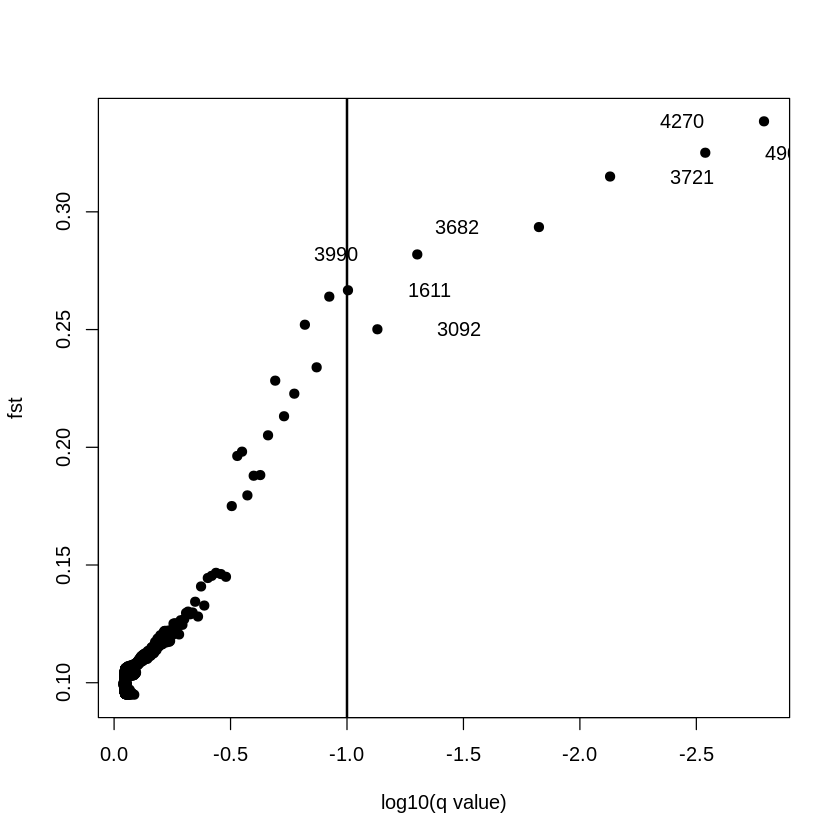

In [43]:
BS<- plot_bayescan("Outlier/HCSS_Afilt32m70_01_pp90_m75-BS-po10_fst.txt",FDR=0.1)

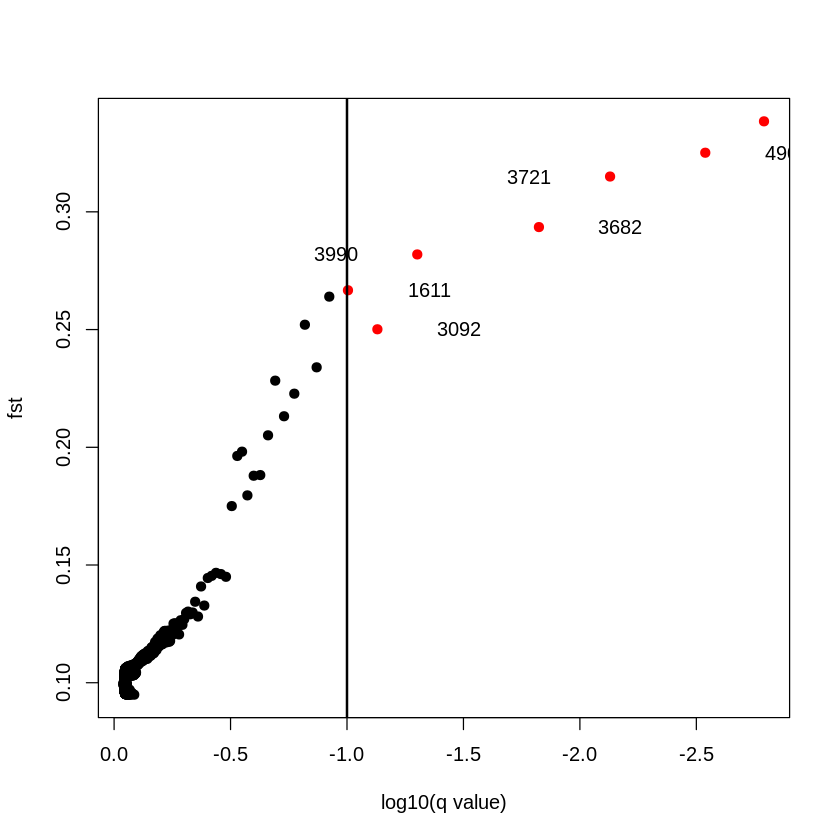

In [44]:
BS<- plot_bayescan("Outlier/HCSS_Afilt32m70_01_pp90_m75-BS-po10_fst.txt",FDR=0.1, highlight = BS$outliers)

In [45]:
BS$nb_outliers

[1] 7

In [41]:
../../../2bRAD_denovo/removeBayescanOutliers.pl bayescan=Outlier/HCSS_Afilt32m70_01_pp90_m75-BS-po10_fst.txt vcf=HCSS_Afilt32m70_01_pp90_m75.recode.vcf FDR=0.1 mode=extract > Outlier/HCSS_Afilt32m70_01_pp90_m75_BSouts.vcf

/scratch/t.cri.ksilliman/CommonG/2019_Mapping/ANGSD_run/HCSS
